### TOP 5 LEAGUES PLAYERS STATS (England, Spain, Italy, Germany, France)

Dataset: Estadísticas de los jugadores de las 5 grandes ligas en la temporada 23/24, obtenido de la web Kaggle.

El dataset se ha obtenido de la web 'Kaggle' en el siguiente enlace: https://www.kaggle.com/datasets/orkunaktas/all-football-players-stats-in-top-5-leagues-2324

Objetivo:  
- Análisis en profundidad de las estadísticas de juego de los futbolistas.
- Modelo de recomendación que identifique el/los mejores reemplazos para un jugador concreto, según sus estadísticas.
- Clasificación del tipo de equipos y jugadores por sus estadísticas (clustering).

Preparación del entorno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Lectura de los datasets

In [3]:
df_top5 = pd.read_csv('data/players.csv', sep = ',', decimal = '.')

In [4]:
df_formations = pd.read_csv('data/Teams_madre.csv', sep = ',')

In [5]:
df_team_stats = pd.read_csv('data/Football teams.csv', sep=',', decimal='.')

Comprobar dataframe

In [6]:
df_top5.head()

Rk             Player   Nation    Pos           Squad                Comp  \
0   1         Max Aarons  eng ENG     DF     Bournemouth  eng Premier League   
1   2   Brenden Aaronson   us USA  MF,FW    Union Berlin       de Bundesliga   
2   3    Paxten Aaronson   us USA     MF  Eint Frankfurt       de Bundesliga   
3   4  Keyliane Abdallah   fr FRA     FW       Marseille          fr Ligue 1   
4   5   Yunis Abdelhamid   ma MAR     DF           Reims          fr Ligue 1   

    age    Born  MP  Starts  ...  Gls_90  Ast_90  G+A_90  G-PK_90  G+A-PK_90  \
0  23.0  2000.0  20      13  ...    0.00    0.07    0.07     0.00       0.07   
1  22.0  2000.0  30      14  ...    0.14    0.14    0.28     0.14       0.28   
2  19.0  2003.0   7       1  ...    0.00    0.89    0.89     0.00       0.89   
3  17.0  2006.0   1       0  ...    0.00    0.00    0.00     0.00       0.00   
4  35.0  1987.0  31      31  ...    0.13    0.00    0.13     0.10       0.10   

   xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  
0   0.00    0.06       0.06     0.00         0.06  
1   0.14    0.13       0.27     0.14         0.27  
2   0.11    0.07       0.19     0.11         0.19  
3   0.00    0.00       0.00     0.00         0.00  
4   0.11    0.01       0.12     0.09         0.09  

[5 rows x 37 columns]

In [7]:
df_formations.head()

Team_ID                 Team Formation
0        1      Manchester City     4-3-3
1        2        Bayern Munich   4-2-3-1
2        3  Paris Saint-Germain     4-3-3
3        4            Barcelona     4-3-3
4        5          Real Madrid     4-3-3

In [8]:
df_team_stats.head()

Team      Tournament  Goals  Shots pg  yellow_cards  \
0      Manchester City  Premier League     83      15.8            46   
1        Bayern Munich      Bundesliga     99      17.1            44   
2  Paris Saint-Germain         Ligue 1     86      15.0            73   
3            Barcelona          LaLiga     85      15.3            68   
4          Real Madrid          LaLiga     67      14.4            57   

   red_cards  Possession%  Pass%  AerialsWon  Rating  
0          2         60.8   89.4        12.8    7.01  
1          3         58.1   85.5        12.9    6.95  
2          7         60.1   89.5         9.5    6.88  
3          2         62.4   89.7        10.6    6.87  
4          2         57.7   87.7        11.8    6.86

Normalización de nombres entre datasets, para trabajar sobre los mismos nombres y poder realizar merges

In [9]:
df_top5['Squad'] = df_top5['Squad'].replace('Eint Frankfurt', 'Eintracht Frankfurt')
df_top5['Squad'] = df_top5['Squad'].replace('Betis', 'Real Betis')
df_top5['Squad'] = df_top5['Squad'].replace('Alavés', 'Deportivo Alaves')
df_top5['Squad'] = df_top5['Squad'].replace('Sheffield Utd', 'Sheffield United')
df_top5['Squad'] = df_top5['Squad'].replace('Köln', 'FC Koln')
df_top5['Squad'] = df_top5['Squad'].replace('Paris S-G', 'Paris Saint-Germain')
df_top5['Squad'] = df_top5['Squad'].replace('Cádiz', 'Cadiz')
df_top5['Squad'] = df_top5['Squad'].replace('Dortmund', 'Borussia Dortmund')
df_top5['Squad'] = df_top5['Squad'].replace('Leverkusen', 'Bayer Leverkusen')
df_top5['Squad'] = df_top5['Squad'].replace('Athletic Club', 'Athletic Bilbao')
df_top5['Squad'] = df_top5['Squad'].replace('Wolves', 'Wolverhampton Wanderers')
df_top5['Squad'] = df_top5['Squad'].replace('Newcastle Utd', 'Newcastle United')
df_top5['Squad'] = df_top5['Squad'].replace('Stuttgart', 'VfB Stuttgart')
df_top5['Squad'] = df_top5['Squad'].replace('Milan', 'AC Milan')
df_top5['Squad'] = df_top5['Squad'].replace('Manchester Utd', 'Manchester United')
df_top5['Squad'] = df_top5['Squad'].replace('Atlético Madrid', 'Atletico Madrid')
df_top5['Squad'] = df_top5['Squad'].replace('Gladbach', 'Borussia M.Gladbach')

Merges entre los datasets que tenemos. Queremos añadir las formaciones en nuestro dataframe 'df_top5'. Lo hacemos con la columna en común de nombres de equipos y un join de tipo 'left' para conservar los datos de df_top5 y juntar los comunes con 'df_formations'

In [10]:
df_players = pd.merge(df_top5, df_formations, left_on='Squad', right_on='Team', how='left')
df_players.drop(columns=['Team', 'Team_ID'], inplace=True)
df_players

Rk             Player   Nation    Pos                Squad  \
0        1         Max Aarons  eng ENG     DF          Bournemouth   
1        2   Brenden Aaronson   us USA  MF,FW         Union Berlin   
2        3    Paxten Aaronson   us USA     MF  Eintracht Frankfurt   
3        4  Keyliane Abdallah   fr FRA     FW            Marseille   
4        5   Yunis Abdelhamid   ma MAR     DF                Reims   
...    ...                ...      ...    ...                  ...   
2847  2848     Lovro Zvonarek   hr CRO  FW,MF        Bayern Munich   
2848  2849    Martin Ødegaard   no NOR     MF              Arsenal   
2849  2850        Milan Đurić   ba BIH     FW        Hellas Verona   
2850  2851        Milan Đurić   ba BIH     FW                Monza   
2851  2852   Mateusz Łęgowski   pl POL     MF          Salernitana   

                    Comp   age    Born  MP  Starts  ...  Ast_90  G+A_90  \
0     eng Premier League  23.0  2000.0  20      13  ...    0.07    0.07   
1          de Bundesliga  22.0  2000.0  30      14  ...    0.14    0.28   
2          de Bundesliga  19.0  2003.0   7       1  ...    0.89    0.89   
3             fr Ligue 1  17.0  2006.0   1       0  ...    0.00    0.00   
4             fr Ligue 1  35.0  1987.0  31      31  ...    0.00    0.13   
...                  ...   ...     ...  ..     ...  ...     ...     ...   
2847       de Bundesliga  18.0  2005.0   5       1  ...    0.00    0.55   
2848  eng Premier League  24.0  1998.0  35      35  ...    0.29    0.52   
2849          it Serie A  33.0  1990.0  20      13  ...    0.07    0.45   
2850          it Serie A  33.0  1990.0  17      13  ...    0.07    0.36   
2851          it Serie A  20.0  2003.0  29      10  ...    0.00    0.00   

      G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  \
0        0.00       0.07   0.00    0.06       0.06     0.00         0.06   
1        0.14       0.28   0.14    0.13       0.27     0.14         0.27   
2        0.00       0.89   0.11    0.07       0.19     0.11         0.19   
3        0.00       0.00   0.00    0.00       0.00     0.00         0.00   
4        0.10       0.10   0.11    0.01       0.12     0.09         0.09   
...       ...        ...    ...     ...        ...      ...          ...   
2847     0.55       0.55   0.04    0.12       0.15     0.04         0.15   
2848     0.17       0.47   0.22    0.28       0.50     0.17         0.45   
2849     0.30       0.37   0.34    0.09       0.43     0.16         0.25   
2850     0.29       0.36   0.21    0.05       0.26     0.21         0.26   
2851     0.00       0.00   0.02    0.02       0.04     0.02         0.04   

      Formation  
0       4-2-3-1  
1         3-5-2  
2       3-4-2-1  
3       4-2-3-1  
4       4-2-3-1  
...         ...  
2847    4-2-3-1  
2848    4-2-3-1  
2849      3-4-3  
2850    3-4-2-1  
2851      3-5-2  

[2852 rows x 38 columns]

Juntamos la columna 'Formation' con la correspondiente al nombre del equipo, ya que es un dato referente al tipo de formación/alineación que usa cada equipo

In [11]:
cols = list(df_players.columns)

cols.remove('Formation')
squad_index = cols.index('Squad')
cols.insert(squad_index + 1, 'Formation')

df_players = df_players[cols]

df_players.head()

Rk             Player   Nation    Pos                Squad Formation  \
0   1         Max Aarons  eng ENG     DF          Bournemouth   4-2-3-1   
1   2   Brenden Aaronson   us USA  MF,FW         Union Berlin     3-5-2   
2   3    Paxten Aaronson   us USA     MF  Eintracht Frankfurt   3-4-2-1   
3   4  Keyliane Abdallah   fr FRA     FW            Marseille   4-2-3-1   
4   5   Yunis Abdelhamid   ma MAR     DF                Reims   4-2-3-1   

                 Comp   age    Born  MP  ...  Gls_90  Ast_90  G+A_90  G-PK_90  \
0  eng Premier League  23.0  2000.0  20  ...    0.00    0.07    0.07     0.00   
1       de Bundesliga  22.0  2000.0  30  ...    0.14    0.14    0.28     0.14   
2       de Bundesliga  19.0  2003.0   7  ...    0.00    0.89    0.89     0.00   
3          fr Ligue 1  17.0  2006.0   1  ...    0.00    0.00    0.00     0.00   
4          fr Ligue 1  35.0  1987.0  31  ...    0.13    0.00    0.13     0.10   

   G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  
0       0.07   0.00    0.06       0.06     0.00         0.06  
1       0.28   0.14    0.13       0.27     0.14         0.27  
2       0.89   0.11    0.07       0.19     0.11         0.19  
3       0.00   0.00    0.00       0.00     0.00         0.00  
4       0.10   0.11    0.01       0.12     0.09         0.09  

[5 rows x 38 columns]

In [12]:
print(df_players.columns)

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Formation', 'Comp', 'age',
       'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90',
       'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')


Realizamos otro merge entre datasets para añadir a 'df_players' los disparos realizados para marcar un gol, el porcentaje de posesión y el porcentaje de pase de cada equipo. Lo hacemos como anteriormente, haciendo merge de tipo left y nuevamente con la columna referente a los equipos como columna en común. Tras ello también juntamos las columnas a las de equipo y formación.

In [13]:
df_team_stats_selected = df_team_stats[['Team', 'Shots pg', 'Possession%', 'Pass%', 'AerialsWon']]

df_players = pd.merge(df_players, df_team_stats_selected, left_on='Squad', right_on='Team', how='left')
df_players = df_players.drop('Team', axis=1)

df_players.head()

Rk             Player   Nation    Pos                Squad Formation  \
0   1         Max Aarons  eng ENG     DF          Bournemouth   4-2-3-1   
1   2   Brenden Aaronson   us USA  MF,FW         Union Berlin     3-5-2   
2   3    Paxten Aaronson   us USA     MF  Eintracht Frankfurt   3-4-2-1   
3   4  Keyliane Abdallah   fr FRA     FW            Marseille   4-2-3-1   
4   5   Yunis Abdelhamid   ma MAR     DF                Reims   4-2-3-1   

                 Comp   age    Born  MP  ...  G+A-PK_90  xG_90  xAG_90  \
0  eng Premier League  23.0  2000.0  20  ...       0.07   0.00    0.06   
1       de Bundesliga  22.0  2000.0  30  ...       0.28   0.14    0.13   
2       de Bundesliga  19.0  2003.0   7  ...       0.89   0.11    0.07   
3          fr Ligue 1  17.0  2006.0   1  ...       0.00   0.00    0.00   
4          fr Ligue 1  35.0  1987.0  31  ...       0.10   0.11    0.01   

   xG+xAG_90  npxG_90  npxG+xAG_90  Shots pg  Possession%  Pass%  AerialsWon  
0       0.06     0.00         0.06      13.0         46.0   79.1        15.6  
1       0.27     0.14         0.27      11.7         45.9   76.2        17.6  
2       0.19     0.11         0.19      13.2         52.4   79.6        17.9  
3       0.00     0.00         0.00      10.0         52.4   82.0        14.9  
4       0.12     0.09         0.09       9.6         46.3   80.7        13.4  

[5 rows x 42 columns]

In [14]:
club_names = df_players['Squad'].unique()
print(club_names)

['Bournemouth' 'Union Berlin' 'Eintracht Frankfurt' 'Marseille' 'Reims'
 'Lens' 'Getafe' 'Lorient' 'Nantes' 'Real Betis' 'Toulouse'
 'Deportivo Alaves' 'Roma' 'Inter' 'Chelsea' 'Sevilla' 'Sheffield United'
 'Montpellier' 'Freiburg' 'FC Koln' 'Fulham' 'Luton Town'
 'Borussia Dortmund' 'Brighton' 'Bayer Leverkusen' 'AC Milan' 'Lyon'
 'Bologna' 'Athletic Bilbao' 'Werder Bremen' 'West Ham' "Nott'ham Forest"
 'Crystal Palace' 'Celta Vigo' 'Wolverhampton Wanderers' 'Brentford'
 'Mainz 05' 'Manchester City' 'Udinese' 'Villarreal' 'Almería' 'Monaco'
 'Monza' 'Genoa' 'Hoffenheim' 'Real Madrid' 'Lazio' 'Liverpool' 'Juventus'
 'Cadiz' 'Strasbourg' 'Real Sociedad' 'Nice' 'Le Havre' 'Clermont Foot'
 'Valencia' 'Newcastle United' 'Lecce' 'Barcelona' 'Metz' 'Mallorca'
 'Fiorentina' 'Brest' 'Burnley' 'Hellas Verona' 'Wolfsburg'
 'Manchester United' 'Lille' 'Granada' 'VfB Stuttgart' 'Bochum'
 'Darmstadt 98' 'Las Palmas' 'Aston Villa' 'Osasuna' 'Cagliari'
 'Paris Saint-Germain' 'Bayern Munich' 'Rennes' 

In [15]:
cols = list(df_players.columns)
formation_index = cols.index('Formation')

columns_to_move = ['Shots pg', 'Possession%', 'Pass%', 'AerialsWon']

for col in columns_to_move:
    cols.remove(col)

for i, col in enumerate(columns_to_move):
    cols.insert(formation_index + 1 + i, col)

df_players = df_players[cols]
df_players.head()

Rk             Player   Nation    Pos                Squad Formation  \
0   1         Max Aarons  eng ENG     DF          Bournemouth   4-2-3-1   
1   2   Brenden Aaronson   us USA  MF,FW         Union Berlin     3-5-2   
2   3    Paxten Aaronson   us USA     MF  Eintracht Frankfurt   3-4-2-1   
3   4  Keyliane Abdallah   fr FRA     FW            Marseille   4-2-3-1   
4   5   Yunis Abdelhamid   ma MAR     DF                Reims   4-2-3-1   

   Shots pg  Possession%  Pass%  AerialsWon  ... Gls_90  Ast_90  G+A_90  \
0      13.0         46.0   79.1        15.6  ...   0.00    0.07    0.07   
1      11.7         45.9   76.2        17.6  ...   0.14    0.14    0.28   
2      13.2         52.4   79.6        17.9  ...   0.00    0.89    0.89   
3      10.0         52.4   82.0        14.9  ...   0.00    0.00    0.00   
4       9.6         46.3   80.7        13.4  ...   0.13    0.00    0.13   

   G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  
0     0.00       0.07   0.00    0.06       0.06     0.00         0.06  
1     0.14       0.28   0.14    0.13       0.27     0.14         0.27  
2     0.00       0.89   0.11    0.07       0.19     0.11         0.19  
3     0.00       0.00   0.00    0.00       0.00     0.00         0.00  
4     0.10       0.10   0.11    0.01       0.12     0.09         0.09  

[5 rows x 42 columns]

___

### LIMPIEZA Y CALIDAD

Reducir base de datos, eliminar columnas que no nos interesan como pueden ser: 

- 'Born' -es muy similar a 'age'-

- '90s' - teniendo las variables Matches (numero de partidos jugados) y Starts (partidos de titular) no nos hace falta

- 'npxG+xAG', 'npxG+xAG_90' - son variables de poca utilidad para nuestro proyecto y parte de ellas están incluídas en parámetros ya existentes en las columnas.

- 'Goals excluding penalties' lo podemos ver con 'Goals' y 'Penalty Goals'. 'Non Penalty Expected Goals' de igual manera-


In [16]:
df_players.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Formation', 'Shots pg',
       'Possession%', 'Pass%', 'AerialsWon', 'Comp', 'age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [17]:
df_players = df_players.drop(columns=['Rk','Born', '90s', 'npxG+xAG', 'npxG+xAG_90', 'G-PK', 'PKatt', 'npxG',
                                       'npxG+xAG', 'npxG', 'xG+xAG_90', 'G-PK_90', 'G+A-PK_90','xG_90', 'xAG_90','npxG_90'])

Renombrar columnas a valores más fáciles e intuitivos

In [18]:
df_players = df_players.rename(columns={
    'Player': 'player', 'Nation': 'nation', 'Pos': 'position', 'Squad': 'team', 'Formation': 'formation',
    'Shots pg': 'team_shots_per_game', 'Possession%': 'team_possession', 
    'Pass%': 'team_pass', 'AerialsWon': 'team_aerials_won','Comp': 'league','age': 'age', 'MP': 'matches', 
    'Starts': 'starts', 'Min': 'minutes', 'Gls': 'goals', 'Ast': 'assists','G+A': 'goals_assists', 
    'PK': 'penalty_goals', 'CrdY': 'yellow_cards', 'CrdR': 'red_cards',
    'xG': 'expected_goals', 'xAG': 'expected_assists', 'PrgC': 'progressive_carries',
    'PrgP': 'progressive_passes', 'PrgR': 'progressive_runs', 'Gls_90': 'goals_90min',
    'Ast_90': 'assists_90min', 'G+A_90': 'goals_assists_90min' })

In [19]:
df_players.head()

player   nation position                 team formation  \
0         Max Aarons  eng ENG       DF          Bournemouth   4-2-3-1   
1   Brenden Aaronson   us USA    MF,FW         Union Berlin     3-5-2   
2    Paxten Aaronson   us USA       MF  Eintracht Frankfurt   3-4-2-1   
3  Keyliane Abdallah   fr FRA       FW            Marseille   4-2-3-1   
4   Yunis Abdelhamid   ma MAR       DF                Reims   4-2-3-1   

   team_shots_per_game  team_possession  team_pass  team_aerials_won  \
0                 13.0             46.0       79.1              15.6   
1                 11.7             45.9       76.2              17.6   
2                 13.2             52.4       79.6              17.9   
3                 10.0             52.4       82.0              14.9   
4                  9.6             46.3       80.7              13.4   

               league  ...  yellow_cards  red_cards  expected_goals  \
0  eng Premier League  ...             1          0             0.0   
1       de Bundesliga  ...             3          1             2.0   
2       de Bundesliga  ...             0          0             0.1   
3          fr Ligue 1  ...             0          0             0.0   
4          fr Ligue 1  ...             5          0             3.4   

   expected_assists  progressive_carries  progressive_passes  \
0               0.8                 22.0                43.0   
1               1.9                 37.0                56.0   
2               0.1                  2.0                 5.0   
3               0.0                  0.0                 0.0   
4               0.3                 36.0               137.0   

   progressive_runs  goals_90min  assists_90min  goals_assists_90min  
0              26.0         0.00           0.07                 0.07  
1              91.0         0.14           0.14                 0.28  
2               7.0         0.00           0.89                 0.89  
3               0.0         0.00           0.00                 0.00  
4               9.0         0.13           0.00                 0.13  

[5 rows x 28 columns]

In [20]:
df_players.shape

(2852, 28)

In [21]:
df_players.dtypes

player                  object
nation                  object
position                object
team                    object
formation               object
team_shots_per_game    float64
team_possession        float64
team_pass              float64
team_aerials_won       float64
league                  object
age                    float64
matches                  int64
starts                   int64
minutes                  int64
goals                    int64
assists                  int64
goals_assists            int64
penalty_goals            int64
yellow_cards             int64
red_cards                int64
expected_goals         float64
expected_assists       float64
progressive_carries    float64
progressive_passes     float64
progressive_runs       float64
goals_90min            float64
assists_90min          float64
goals_assists_90min    float64
dtype: object

___
***Breve análisis de las variables y téminos estadísticos para aplicar al dataset***


__Variables__

Variables cualitativas nominales (string):

- player: Nombre del jugador.  
- nation: País del jugador.  
- position: Posición en la que juega el futbolista.  
- team: Equipo en el que juega el jugador.  
- formation: tipo de alineación del equipo del jugador (aunque sea representado con números es como si fuese una 'etiqueta')  
- league: Liga en la que juega el futbolista  

Variables cuantitativas discretas (int): 

- age: edad de los jugadores (en años).
- matches: partidos jugados en la temporada 23/24.
- minutes: minutos jugados por los jugadores.
- goals: goles marcados por los jugadores.
- assists: asistencias de gol dadas por los jugadores.
- goals_assists: suma de goles y asistencias de los jugadores.
- penalty_goals: goles marcadas de penalti por los jugadores.
- yellow_cards: tarjetas amarillas recibidas por los jugadores.
- red_cards: tarjetas rojas recibidas por los jugadores.
- progressive_carries: conducciones de balón progresivas (que llevan a ocasiones de gol).
- progressive_passes: pases progresivos (que llevan a ocasiones de gol).
- progressive_runs: carreras progresivas de los jugadores (que llevan a ocasiones de gol).

Variables cuantitativas continuas (float): 

- team_shots_per_game: porcentaje de la media de disparos a puerta por partido del equipo.
- team_possession: porcentaje de la media de posesión del balón por partido del equipo (porcentaje de tiempo que tienen el balón).
- team_pass: porcentaje de la media de pases dados por partido del equipo.
- expected_goals: goles que se esperan que marquen los jugadores (basado en temporadas anteriores, juego y equipo)
- expected assists: asistencias que se esperan que den los jugadores (basado en temporadas anteriores, juego y equipo).
- goals_90min: media de goles de los jugadores por partido (90 minutos).
- assists_90min: media de asistencias de los jugadores por partido (90 minutos).
- goals_assists_90min: media de goles y asistencias (sumadas) de los jugadores por partido (90 minutos).


Población: jugadores de fútbol a nivel profesional.

Muestra: jugadores de las 5 grandes ligas de fútbol (Inglaterra, España, Italia, Alemania, Francia) en la temporada 23/24.




In [22]:
df_players.describe()

team_shots_per_game  team_possession    team_pass  team_aerials_won  \
count          2852.000000      2852.000000  2852.000000       2852.000000   
mean             11.470266        49.474334    80.364797         15.896318   
std               2.562591         5.271181     4.757645          2.987777   
min               5.000000        38.500000    66.500000          8.600000   
25%               9.700000        45.800000    77.800000         14.100000   
50%              11.300000        49.100000    80.700000         15.800000   
75%              13.200000        52.750000    83.500000         17.900000   
max              17.100000        62.400000    89.700000         26.800000   

               age      matches       starts      minutes        goals  \
count  2848.000000  2852.000000  2852.000000  2852.000000  2852.000000   
mean     25.060744    18.969846    13.514727  1213.301543     1.720196   
std       4.590521    11.517930    11.251227   961.584066     3.203532   
min      15.000000     1.000000     0.000000     1.000000     0.000000   
25%      22.000000     8.000000     2.000000   296.750000     0.000000   
50%      25.000000    20.000000    12.000000  1113.000000     0.000000   
75%      28.000000    29.000000    23.000000  1987.000000     2.000000   
max      40.000000    38.000000    38.000000  3420.000000    36.000000   

           assists  ...  yellow_cards    red_cards  expected_goals  \
count  2852.000000  ...   2852.000000  2852.000000     2851.000000   
mean      1.221950  ...      2.654979     0.119916        1.746405   
std       1.965371  ...      2.726161     0.354848        2.896131   
min       0.000000  ...      0.000000     0.000000        0.000000   
25%       0.000000  ...      0.000000     0.000000        0.100000   
50%       0.000000  ...      2.000000     0.000000        0.700000   
75%       2.000000  ...      4.000000     0.000000        2.000000   
max      14.000000  ...     17.000000     3.000000       30.600000   

       expected_assists  progressive_carries  progressive_passes  \
count       2851.000000          2851.000000         2851.000000   
mean           1.231533            21.482638           46.889162   
std            1.709574            26.885500           51.814768   
min            0.000000             0.000000            0.000000   
25%            0.100000             2.000000            5.000000   
50%            0.600000            12.000000           31.000000   
75%            1.700000            30.000000           72.500000   
max           11.800000           218.000000          392.000000   

       progressive_runs  goals_90min  assists_90min  goals_assists_90min  
count       2851.000000  2852.000000    2852.000000          2852.000000  
mean          46.425114     0.121778       0.093296             0.214916  
std           60.407205     0.284138       0.366238             0.472989  
min            0.000000     0.000000       0.000000             0.000000  
25%            3.000000     0.000000       0.000000             0.000000  
50%           21.000000     0.000000       0.000000             0.090000  
75%           71.000000     0.150000       0.120000             0.290000  
max          508.000000     6.000000      11.250000            11.250000  

[8 rows x 22 columns]

Cambiamos los valores de la columna Position a valores más fáciles de leer y de mostrar más adelante en gráficas. Los valores principales son Goalkeeper(Portero), Defender(Defensa), Midfielder(Mediocentro) y Forward(Delantero)

In [23]:
df_players['position'] = df_players['position'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
df_players['position'].unique()


array(['DF', 'MF', 'FW', 'GK'], dtype=object)

In [24]:
position_change = {'GK': 'Goalkeeper', 'DF':'Defender', 'MF':'Midfielder', 'FW':'Forward'}
df_players['position'] = df_players['position'].replace(position_change)
df_players

player   nation    position                 team formation  \
0            Max Aarons  eng ENG    Defender          Bournemouth   4-2-3-1   
1      Brenden Aaronson   us USA  Midfielder         Union Berlin     3-5-2   
2       Paxten Aaronson   us USA  Midfielder  Eintracht Frankfurt   3-4-2-1   
3     Keyliane Abdallah   fr FRA     Forward            Marseille   4-2-3-1   
4      Yunis Abdelhamid   ma MAR    Defender                Reims   4-2-3-1   
...                 ...      ...         ...                  ...       ...   
2847     Lovro Zvonarek   hr CRO     Forward        Bayern Munich   4-2-3-1   
2848    Martin Ødegaard   no NOR  Midfielder              Arsenal   4-2-3-1   
2849        Milan Đurić   ba BIH     Forward        Hellas Verona     3-4-3   
2850        Milan Đurić   ba BIH     Forward                Monza   3-4-2-1   
2851   Mateusz Łęgowski   pl POL  Midfielder          Salernitana     3-5-2   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
0                    13.0             46.0       79.1              15.6   
1                    11.7             45.9       76.2              17.6   
2                    13.2             52.4       79.6              17.9   
3                    10.0             52.4       82.0              14.9   
4                     9.6             46.3       80.7              13.4   
...                   ...              ...        ...               ...   
2847                 17.1             58.1       85.5              12.9   
2848                 12.1             52.7       85.0              13.5   
2849                 10.6             49.6       76.3              20.6   
2850                 10.1             47.4       82.4              18.1   
2851                  8.1             47.1       78.3              15.6   

                  league  ...  yellow_cards  red_cards  expected_goals  \
0     eng Premier League  ...             1          0             0.0   
1          de Bundesliga  ...             3          1             2.0   
2          de Bundesliga  ...             0          0             0.1   
3             fr Ligue 1  ...             0          0             0.0   
4             fr Ligue 1  ...             5          0             3.4   
...                  ...  ...           ...        ...             ...   
2847       de Bundesliga  ...             0          0             0.1   
2848  eng Premier League  ...             2          0             7.4   
2849          it Serie A  ...             2          0             4.5   
2850          it Serie A  ...             2          0             3.0   
2851          it Serie A  ...             3          0             0.2   

      expected_assists  progressive_carries  progressive_passes  \
0                  0.8                 22.0                43.0   
1                  1.9                 37.0                56.0   
2                  0.1                  2.0                 5.0   
3                  0.0                  0.0                 0.0   
4                  0.3                 36.0               137.0   
...                ...                  ...                 ...   
2847               0.2                  7.0                 7.0   
2848               9.6                 91.0               344.0   
2849               1.2                  3.0                15.0   
2850               0.7                  2.0                 8.0   
2851               0.2                 16.0                37.0   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
0                 26.0         0.00           0.07                 0.07  
1                 91.0         0.14           0.14                 0.28  
2                  7.0         0.00           0.89                 0.89  
3                  0.0         0.00           0.00                 0.00  
4                  9.0         0.13           0.00                 0.13  
...                ...       

Comprobamos si hay futbolistas duplicados en el dataset

In [25]:
nombres_duplicados = df_players.duplicated().any()

print("Duplicados en la columna 'player':", nombres_duplicados)

df_players.duplicated().sum()

Duplicados en la columna 'player': False


np.int64(0)

Lo que sí observamos es que hay futbolistas con el mismo registro en el nombre. Comprobamos que no son futbolistas con el mismo nombre, sino los mismos futbolistas que en esa temporada han sido traspasados de un equipo a otro, por lo que solo coincide el nombre, pero no las estadísticas ni el equipo.

In [26]:
df_players['player'].duplicated().sum()

np.int64(149)

In [27]:
duplicated_names = df_players[df_players['player'].duplicated(keep=False)]['player']
duplicated_records = df_players[df_players['player'].isin(duplicated_names)]
duplicated_records

player  nation    position              team formation  \
16    Bénie Adama Traore  ci CIV     Forward  Sheffield United   4-2-3-1   
17    Bénie Adama Traore  ci CIV     Forward            Nantes   4-2-3-1   
34         Lucien Agoume  fr FRA  Midfielder             Inter     3-5-2   
35         Lucien Agoume  fr FRA  Midfielder           Sevilla     4-3-3   
52         Sergio Akieme  es ESP    Defender           Almería     4-4-2   
...                  ...     ...         ...               ...       ...   
2828      Alessio Zerbin  it ITA     Forward            Napoli     4-3-3   
2841        Nadir Zortea  it ITA    Defender         Frosinone     3-5-2   
2842        Nadir Zortea  it ITA    Defender          Atalanta   3-4-2-1   
2849         Milan Đurić  ba BIH     Forward     Hellas Verona     3-4-3   
2850         Milan Đurić  ba BIH     Forward             Monza   3-4-2-1   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
16                    8.5             43.0       76.9              19.1   
17                   10.8             45.2       77.0              18.1   
34                   14.5             52.0       87.0              11.8   
35                   12.1             58.7       86.2              16.6   
52                    8.1             44.1       77.1              13.8   
...                   ...              ...        ...               ...   
2828                 17.0             54.1       87.0              11.1   
2841                 11.1             40.0       75.7              14.1   
2842                 16.3             53.5       83.5              16.8   
2849                 10.6             49.6       76.3              20.6   
2850                 10.1             47.4       82.4              18.1   

                  league  ...  yellow_cards  red_cards  expected_goals  \
16    eng Premier League  ...             0          0             0.3   
17            fr Ligue 1  ...             1          1             0.7   
34            it Serie A  ...             0          0             0.0   
35            es La Liga  ...             3          0             0.9   
52            es La Liga  ...             2          0             1.2   
...                  ...  ...           ...        ...             ...   
2828          it Serie A  ...             0          0             0.2   
2841          it Serie A  ...             3          0             0.4   
2842          it Serie A  ...             1          0             0.1   
2849          it Serie A  ...             2          0             4.5   
2850          it Serie A  ...             2          0             3.0   

      expected_assists  progressive_carries  progressive_passes  \
16                 0.5                  7.0                 9.0   
17                 0.9                 23.0                15.0   
34                 0.0                  0.0                 0.0   
35                 0.6                  7.0                35.0   
52                 2.2                 27.0                28.0   
...                ...                  ...                 ...   
2828               0.6                  6.0                 3.0   
2841               2.8                 31.0                42.0   
2842               0.3                  7.0                10.0   
2849               1.2                  3.0                15.0   
2850               0.7                  2.0                 8.0   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
16                14.0         0.00           0.00                 0.00  
17                45.0         0.00           0.18                 0.18  
34                 0.0         0.00           0.00                 0.00  
35                 9.0         0.00           0.00                 0.00  
52                72.0         0.11           0.00                 0.11  
...                ...          ...            ...                

Comprobamos que para casi todos los jugadores son mejores las estadísticas con la segundo equipo en esa temporada.
Pueden ser jugadores que no tenían muchos minutos con su primer equipo y han querido salir a otros equipos para tener más oportunidades, por lo que nos vamos a quedar con los segundos registros

In [28]:
df_players = df_players[df_players['player'].duplicated(keep='first') | ~df_players['player'].duplicated(keep=False)]

In [29]:
second_occurrences = duplicated_records[duplicated_records['player'].duplicated(keep='first')]
second_occurrences.head()

player  nation    position     team formation  \
17  Bénie Adama Traore  ci CIV     Forward   Nantes   4-2-3-1   
35       Lucien Agoume  fr FRA  Midfielder  Sevilla     4-3-3   
53       Sergio Akieme  es ESP    Defender    Reims   4-2-3-1   
57       Paul Akouokou  ci CIV  Midfielder     Lyon     4-3-3   
73     Mohamed Ali Cho  fr FRA     Forward     Nice     4-4-2   

    team_shots_per_game  team_possession  team_pass  team_aerials_won  \
17                 10.8             45.2       77.0              18.1   
35                 12.1             58.7       86.2              16.6   
53                  9.6             46.3       80.7              13.4   
57                 16.1             53.6       84.7              14.3   
73                 10.8             53.4       85.6              10.5   

        league  ...  yellow_cards  red_cards  expected_goals  \
17  fr Ligue 1  ...             1          1             0.7   
35  es La Liga  ...             3          0             0.9   
53  fr Ligue 1  ...             2          0             1.4   
57  fr Ligue 1  ...             1          0             0.1   
73  fr Ligue 1  ...             2          0             1.1   

    expected_assists  progressive_carries  progressive_passes  \
17               0.9                 23.0                15.0   
35               0.6                  7.0                35.0   
53               0.4                 20.0                20.0   
57               0.0                  0.0                13.0   
73               2.0                 48.0                25.0   

    progressive_runs  goals_90min  assists_90min  goals_assists_90min  
17              45.0         0.00           0.18                 0.18  
35               9.0         0.00           0.00                 0.00  
53              34.0         0.22           0.00                 0.22  
57               2.0         0.00           0.00                 0.00  
73              77.0         0.10           0.21                 0.31  

[5 rows x 28 columns]

Vemos que no haya caracteres especiales que se pudieran considerar nulos en las variables tipo 'object'

In [30]:
for col in df_players.select_dtypes(include=['object']).columns:
    print(col)
    print(df_players[col].unique())

player
['Max Aarons' 'Brenden Aaronson' 'Paxten Aaronson' ... 'Martin Ødegaard'
 'Milan Đurić' 'Mateusz Łęgowski']
nation
['eng ENG' 'us USA' 'fr FRA' 'ma MAR' 'gh GHA' 'br BRA' 'it ITA' 'ar ARG'
 'ci CIV' 'ng NGA' 'at AUT' 'am ARM' 'de GER' 'ch SUI' 'es ESP' 'cr CRC'
 'ba BIH' 'dz ALG' 'bj BEN' 'no NOR' 'nl NED' 'py PAR' 'ga GAB' 'pt POR'
 'se SWE' 'mx MEX' 'uy URU' 'sn SEN' 'pa PAN' 'dk DEN' 'sct SCO' 'rs SRB'
 'jm JAM' 've VEN' 'il ISR' 'is ISL' 'jp JPN' 'al ALB' 'tg TOG' 'ir IRN'
 'hr CRO' 'cd COD' 'gn GUI' 'gr GRE' 'cm CMR' 'zm ZAM' 'bf BFA' 'gd GRN'
 'cz CZE' 'lu LUX' 'cv CPV' 'wls WAL' 'sr SUR' 'ao ANG' 'tn TUN' 'pl POL'
 'sk SVK' 'gw GNB' 'si SVN' 'ml MLI' 'gm GAM' 'ro ROU' 'be BEL' 'co COL'
 'nir NIR' 'cl CHI' 'ca CAN' 'nz NZL' 'ec ECU' 'tr TUR' 'ie IRL' 'zw ZIM'
 'gq EQG' 'km COM' 'mq MTQ' 'mk MKD' 'ua UKR' 'ht HAI' 'eg EGY' 'do DOM'
 'za RSA' 'au AUS' 'lt LTU' 'ru RUS' 'bg BUL' 'hu HUN' 'kr KOR' 'ph PHI'
 'fi FIN' 'sl SLE' 'cy CYP' 'uz UZB' 'cf CTA' 'me MNE' nan 'ge GEO'
 'm

Buscamos valores nulos. Son muy pocos valores para variables como 'Nation' o 'age', así que optamos por hacer una pequeña búsqueda online e imputar los valores reales. Para las variables estadísitcas de expected goals por 90 minutos y parecidas hay un jugador que presenta nulos en casi todas las categorías, asi que optamos por eliminarlo.

In [31]:
df_players.isnull().sum()

player                 0
nation                 2
position               0
team                   0
formation              0
team_shots_per_game    0
team_possession        0
team_pass              0
team_aerials_won       0
league                 0
age                    3
matches                0
starts                 0
minutes                0
goals                  0
assists                0
goals_assists          0
penalty_goals          0
yellow_cards           0
red_cards              0
expected_goals         1
expected_assists       1
progressive_carries    1
progressive_passes     1
progressive_runs       1
goals_90min            0
assists_90min          0
goals_assists_90min    0
dtype: int64

In [32]:
nulos_nation = df_players[df_players['nation'].isnull()]
nulos_nation

player nation    position      team formation  \
1395  Mahmut Kücüksahin    NaN  Midfielder  Augsburg     4-4-2   
2075   Marco Pellegrino    NaN    Defender  AC Milan   4-2-3-1   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
1395                  9.9             44.0       73.6              16.8   
2075                 14.7             51.4       84.0              15.2   

             league  ...  yellow_cards  red_cards  expected_goals  \
1395  de Bundesliga  ...             0          0             0.0   
2075     it Serie A  ...             0          0             0.0   

      expected_assists  progressive_carries  progressive_passes  \
1395               0.0                  0.0                 0.0   
2075               0.0                  1.0                 3.0   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
1395               0.0          0.0            0.0                  0.0  
2075               0.0          0.0            0.0                  0.0  

[2 rows x 28 columns]

In [33]:
df_players.loc[1395, 'nation'] = 'Turkey' 
df_players.loc[2075, 'nation'] = 'Argentina'   

In [34]:
nulos_age = df_players[df_players['age'].isnull()]
nulos_age

player     nation  position        team formation  \
1784     Max Moerstedt     de GER  Defender  Hoffenheim     3-5-2   
2075  Marco Pellegrino  Argentina  Defender    AC Milan   4-2-3-1   
2529      Max Svensson     es ESP   Forward     Osasuna     4-4-2   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
1784                 12.6             50.8       80.7              15.7   
2075                 14.7             51.4       84.0              15.2   
2529                  9.8             44.6       70.2              26.8   

             league  ...  yellow_cards  red_cards  expected_goals  \
1784  de Bundesliga  ...             0          0             0.0   
2075     it Serie A  ...             0          0             0.0   
2529     es La Liga  ...             0          0             0.0   

      expected_assists  progressive_carries  progressive_passes  \
1784               0.0                  0.0                 0.0   
2075               0.0                  1.0                 3.0   
2529               0.0                  0.0                 0.0   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
1784               1.0          0.0            0.0                  0.0  
2075               0.0          0.0            0.0                  0.0  
2529               0.0          0.0            0.0                  0.0  

[3 rows x 28 columns]

In [35]:
df_players.loc[1784, 'age'] = 18.0
df_players.loc[2075, 'age'] = 22.0
df_players.loc[2529, 'age'] = 23.0

In [36]:
#Pasamos a entero las variables age y minutes, ya que son variables discretas, no cotinuas
df_players['age'] = df_players['age'].apply(int)
df_players['minutes'] = df_players['minutes'].apply(int)

C:\Users\metal\AppData\Local\Temp\ipykernel_10656\921321067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players['age'] = df_players['age'].apply(int)
C:\Users\metal\AppData\Local\Temp\ipykernel_10656\921321067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players['minutes'] = df_players['minutes'].apply(int)


In [37]:
nulos_expected_goals = df_players[df_players['expected_goals'].isnull()]
nulos_expected_goals

player  nation    position        team formation  \
1638  Tommaso Martinelli  it ITA  Goalkeeper  Fiorentina     4-3-3   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
1638                  9.8             46.8       81.0              14.2   

          league  ...  yellow_cards  red_cards  expected_goals  \
1638  it Serie A  ...             0          0             NaN   

      expected_assists  progressive_carries  progressive_passes  \
1638               NaN                  NaN                 NaN   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
1638               NaN          0.0            0.0                  0.0  

[1 rows x 28 columns]

Para este jugadore vemos que tiene nulos en casi todas las categorías estadísticas, por lo que procedemos a eliminarlo y así no meter un solo valor que puede tener error.

In [38]:
df_players = df_players.drop(index=1638)

In [39]:
df_players.isnull().sum().any()

np.False_

In [40]:
df_players.to_csv('data/players_cleaned.csv')

_____
### ANÁLISIS DE DATOS

EDAD

A continuación filtramos por las edades de los jugadores. Los contamos con un value_counts, los pintamos en gráfica de barras para ver la distribución. También analizamos las medidas estadísticas

In [41]:
df_players['age'].value_counts().count()

np.int64(26)

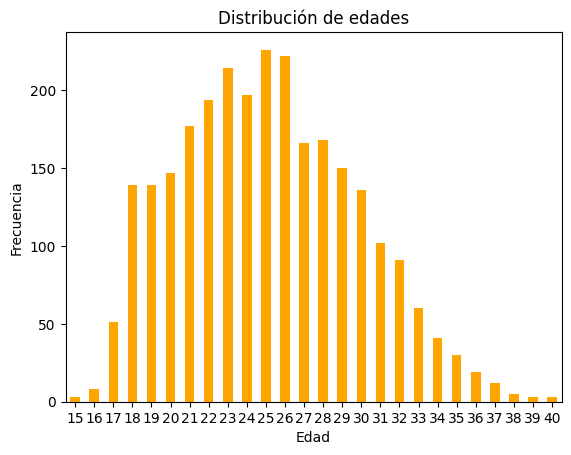

In [42]:
age_counts = df_players['age'].value_counts().sort_index()
age_counts.plot(kind='bar', color='orange')

plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


In [43]:
df_players['age'].describe().to_frame().T

count       mean       std   min   25%   50%   75%   max
age  2703.0  25.101369  4.630309  15.0  22.0  25.0  28.0  40.0

In [44]:
print(f'La media de edad de los jugadores de las 5 grandes ligas en la temporada 23/24 es de{df_players['age'].mean(): .2f} años.')
print(f'La mediana de edad de los jugadores de las 5 grandes ligas en la temporada 23/24 es de{df_players['age'].median(): .2f} años.')
print(f'La edad más habitual de los jugadores de las 5 grandes ligas en la temporada 23/24 es de{df_players['age'].mode()[0]: .2f} años.')

La media de edad de los jugadores de las 5 grandes ligas en la temporada 23/24 es de 25.10 años.
La mediana de edad de los jugadores de las 5 grandes ligas en la temporada 23/24 es de 25.00 años.
La edad más habitual de los jugadores de las 5 grandes ligas en la temporada 23/24 es de 25.00 años.


In [45]:
min_age_players = df_players[df_players['age'] == df_players['age'].min()]
min_age_players[['player','age']]

player  age
352      Ayyoub Bouaddi   15
434   Francesco Camarda   15
1799        Mikey Moore   15

In [46]:
max_age_players = df_players[df_players['age'] == df_players['age'].max()]
max_age_players[['player','age']]

player  age
374     Claudio Bravo   40
1771  Antonio Mirante   40
2211       Pepe Reina   40

In [47]:
print(f'Varianza años jugados:{df_players['age'].var(): .2f} años')
print(f'Desviación típica de años jugados:{df_players['age'].std(): .2f} años')
print(f'Coeficiente de variación de años jugados:{df_players['age'].std()/np.abs(df_players['age'].mean()): .2f} años')

Varianza años jugados: 21.44 años
Desviación típica de años jugados: 4.63 años
Coeficiente de variación de años jugados: 0.18 años


In [48]:
skewness_age = df_players['age'].skew()
skewness_age

np.float64(0.31634599216720904)

Para la variable edad ('age'), la distribución es algo asimétrica a la derecha (asimetría positiva). Tendrá una pequeña cola a la derecha. La media y mediana son extremadamente parecidas (25.10 y 25) que muestra esta pequeña tendencia de distribución. La desviación tipica es un pelín alta, pero se puede considerar moderada, siendo de 4,63 años. La edad más habitual son 25, bastante en relación también con media y mediana

Visualizamos el boxplot para localizar atípicos. En este caso las edades que se considran atípicas son los 37 años y mayores, y se observan 11 jugadores con edades en atípicos

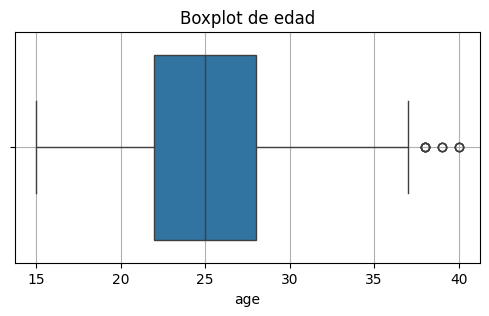

In [49]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_players['age'])
plt.grid(True)
plt.title('Boxplot de edad')
plt.show()

In [50]:
Q1_age = df_players['age'].quantile(0.25)
Q3_age = df_players['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

upper_limit_age = Q3_age + 1.5 * IQR_age
print(f"Años que se consideran outlier: {upper_limit_age} años o más")

outliers_age = df_players[df_players['age'] > upper_limit_age]
print(f"Cantidad de outliers: {len(outliers_age)}")


Años que se consideran outlier: 37.0 años o más
Cantidad de outliers: 11


Rangos de edad: Crear rangos para nueva columna

In [51]:
ranges_age = [
    (15, 20, '< 20 años'),
    (20, 25, 'Entre 20 y 24 años'),
    (25, 30, 'Entre 25 y 29 años'),
    (30, 35, 'Entre 30 y 34 años'),
    (35, 41, 'Mayor de 35 años'),
]


In [52]:
def create_range(x):
    for lower_limit, upper_limit, range_age in ranges_age:
        if x >= lower_limit and x < upper_limit:
            return range_age
    return 'Mayor de 40 años'

In [53]:
df_players['age_range'] = df_players['age'].apply(create_range)
df_players[['age', 'age_range']].head()

age           age_range
0   23  Entre 20 y 24 años
1   22  Entre 20 y 24 años
2   19           < 20 años
3   17           < 20 años
4   35    Mayor de 35 años

Juntar la columna de rango de edad a la de edad

In [54]:
column_order = df_players.columns.tolist()

age_index = column_order.index('age')
age_range_index = column_order.index('age_range')

column_order.remove('age_range')

column_order.insert(age_index + 1, 'age_range')

df_players = df_players[column_order]

Identificamos la frecuencia absoluta de cada rango de edad de los futbolistas

In [55]:
df_players[['age_range', 'player']].groupby(by='age_range').count().rename(columns={'player': 'Frequency'})

Frequency
age_range                    
< 20 años                 340
Entre 20 y 24 años        929
Entre 25 y 29 años        932
Entre 30 y 34 años        430
Mayor de 35 años           72

<Axes: ylabel='age_range'>

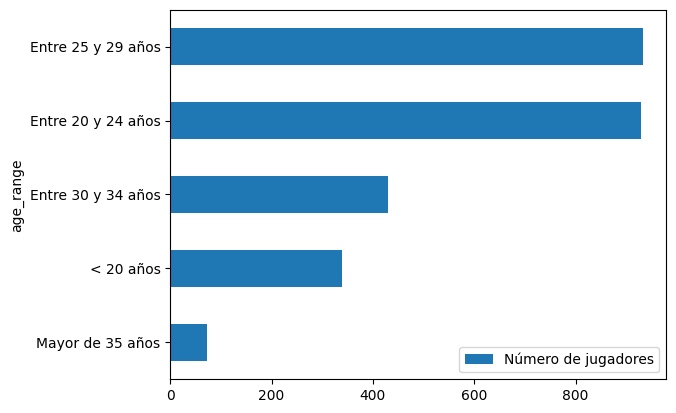

In [56]:
df_players[['age_range', 'player']].groupby(by='age_range').count().rename(columns=
                    {'player': 'Número de jugadores'}).sort_values(by='Número de jugadores', ascending=True).plot.barh()

In [57]:
age_range = df_players['age_range'].unique()
age_range.sort()
age_range

array(['< 20 años', 'Entre 20 y 24 años', 'Entre 25 y 29 años',
       'Entre 30 y 34 años', 'Mayor de 35 años'], dtype=object)

In [58]:
minutes_age_mean = df_players[['age_range', 'minutes']].groupby('age_range').mean()
minutes_age_mean

minutes
age_range                      
< 20 años            402.585294
Entre 20 y 24 años  1249.037675
Entre 25 y 29 años  1443.832618
Entre 30 y 34 años  1466.295349
Mayor de 35 años    1257.694444

In [59]:
age_range_freq = df_players['age_range'].value_counts().sort_index()

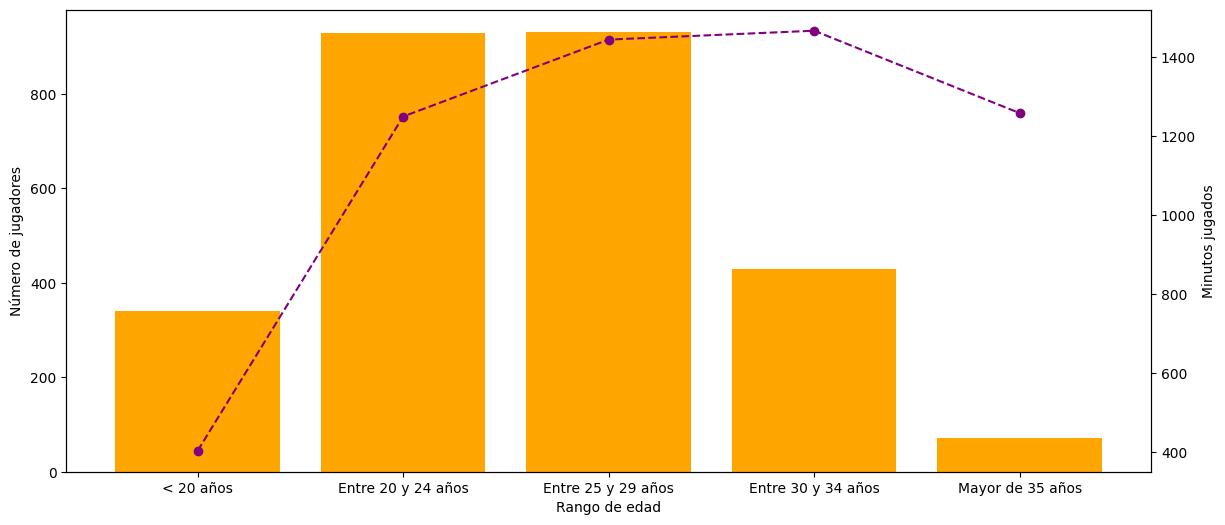

In [60]:
fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()

ax1.bar(age_range, age_range_freq, color='orange')
ax2.plot(age_range, minutes_age_mean, c='purple', linestyle='--', marker='o')

ax1.set_xlabel('Rango de edad')

ax1.set_ylabel('Número de jugadores')
ax2.set_ylabel('Minutos jugados')

plt.show()

Con este gráfico, con dos ejes Y, podemos observar a la vez la cantidad de jugadores en cada rango de edad y los minutos jugados. Aquí podemos observar que los jugadores jóvenes van ganando minutos jugados cuando van cumpliendo años, siendo los que más juegan los jugadores entre 25 y 34 años. Asciende considerablemente entre los menores de 20 hasta los 25 años y a partir de los 34 años la tendencia es descendente. Los jugadores de 35 o más años ya juegan menos según se van aproximando a su retirada profesional

MINUTES:

Vamos a dividirlos en rangos de minutos y así comparar más fácilmente

In [61]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, df_players['minutes'].max()] 
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3000+']
df_players['minutes_interval'] = pd.cut(df_players['minutes'], bins=bins, labels=labels, include_lowest=True)

df_players['minutes_interval'].value_counts().sort_index()

minutes_interval
0-500        847
501-1000     368
1001-1500    416
1501-2000    376
2001-2500    327
2501-3000    272
3000+         97
Name: count, dtype: int64

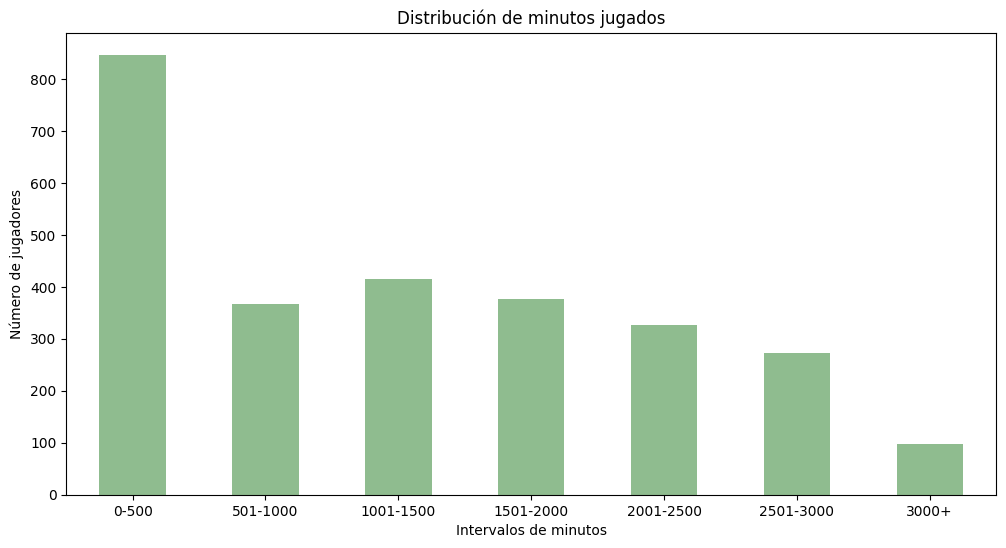

In [62]:
minutes_interval_counts = df_players['minutes_interval'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
minutes_interval_counts.plot(kind='bar', color='darkseagreen')

plt.title('Distribución de minutos jugados')
plt.xlabel('Intervalos de minutos')
plt.ylabel('Número de jugadores')
plt.xticks(rotation=0)
plt.show()

In [63]:
df_players.drop(columns='minutes_interval', inplace=True)

In [64]:
df_players['minutes'].describe().to_frame().T

count         mean         std  min    25%     50%     75%     max
minutes  2703.0  1244.523862  966.382123  1.0  318.0  1153.0  2045.0  3420.0

In [65]:
print(f'La media de minutos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['minutes'].mean(): .2f} minutos jugados.')
print(f'La mediana de minutos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['minutes'].median(): .2f} minutos jugados.')
print(f'El número de minutos jugados más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de {df_players['age'].mode()[0]: .2f} minutos jugados.')

La media de minutos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 1244.52 minutos jugados.
La mediana de minutos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 1153.00 minutos jugados.
El número de minutos jugados más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de  25.00 minutos jugados.


In [66]:
min_minutes = df_players[df_players['minutes'] == df_players['minutes'].min()]
min_minutes[['player','minutes']].head()

player  minutes
132        Simone Aresti        1
148  Jonathan Asp Jensen        1
446        Thomas Cannon        1
478         Kaelan Casey        1
549           Silvi Clúa        1

In [67]:
max_minutes = df_players[df_players['minutes'] == df_players['minutes'].max()]
max_minutes[['player','minutes']]

player  minutes
843   Wladimiro Falcone     3420
960     Paulo Gazzaniga     3420
1337         Max Kilman     3420
1466         Bernd Leno     3420
1941          Jan Oblak     3420
1975        André Onana     3420
2124    Jordan Pickford     3420
2319     William Saliba     3420
2695  Guglielmo Vicario     3420

In [68]:
print(f'Varianza minutos jugados:{df_players['minutes'].var(): .2f} minutos')
print(f'Desviación típica de minutos jugados:{df_players['minutes'].std(): .2f} minutos')
print(f'Coeficiente de variación de minutos jugados:{df_players['minutes'].std()/np.abs(df_players['minutes'].mean()): .2f} minutos')

Varianza minutos jugados: 933894.41 minutos
Desviación típica de minutos jugados: 966.38 minutos
Coeficiente de variación de minutos jugados: 0.78 minutos


In [69]:
skewness_minutes = df_players['minutes'].skew()
skewness_minutes

np.float64(0.3411835357915009)

La distribución de minutos ('minutes') tiene una ligera asimetría positiva (0.314), por lo que la cola de la distribución está más extendida hacia la derecha. Hay algunos valores de datos más altos que sesgan un poco la distribución hacia la derecha, pero no es una asimetría muy pronunciada. Los valores que vemos más a la izquierda en el histograma son la mayoría e indican jugadores suplentes con muy pocos minutos (menos de 500 minutos de los 3420 posibles). La diferencia entre media (1244.52) y mediana (1153.0) no es muy significativa. esto además muestra que, a pesar de que haya muchos jugadres que juegan menos de 500 minutos también hay muchos que juegan muchos minutos y hacen que la media y mediana suban considerablemente. La desviación típica son 966 minutos, bastante alta, y muestra una gran variabilidad en los minutos jugados

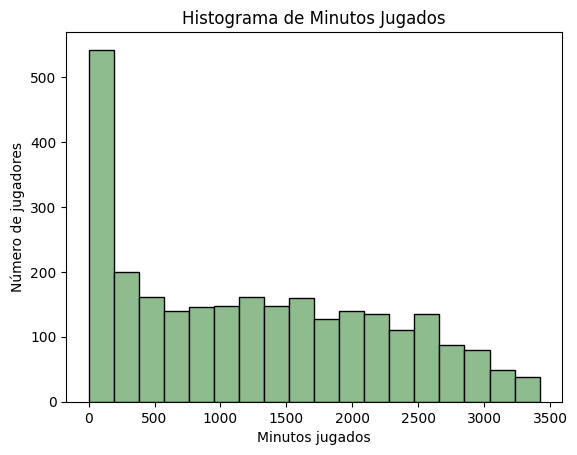

In [70]:
plt.hist(df_players['minutes'], bins=18, color='darkseagreen', edgecolor='black')
plt.xlabel('Minutos jugados')
plt.ylabel('Número de jugadores')
plt.title('Histograma de Minutos Jugados')
plt.show()

Con el boxplot comprobamos que no hay outliers para los minutos jugados

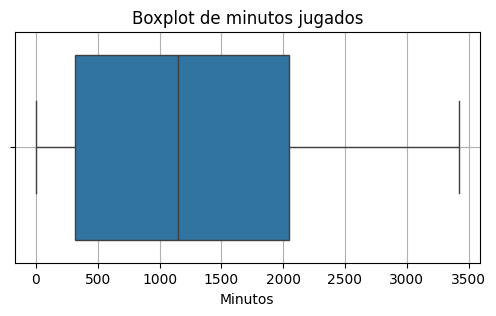

In [71]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_players['minutes'])
plt.grid(True)
plt.title('Boxplot de minutos jugados')
plt.xlabel('Minutos')
plt.show()

MATCHES

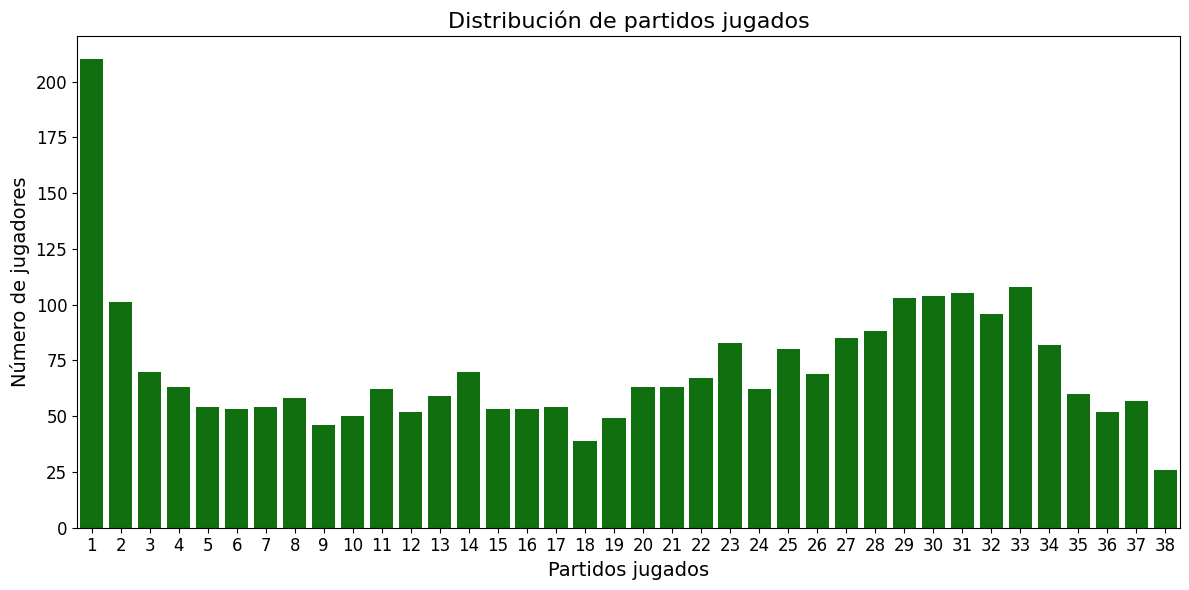

In [72]:
matches_counts = df_players['matches'].value_counts().sort_index()

matches_df = matches_counts.reset_index()
matches_df.columns = ['matches', 'Frequency']

plt.figure(figsize=(12, 6))
sns.barplot(data=matches_df, x='matches', y='Frequency', color='green')

plt.title('Distribución de partidos jugados', fontsize=16)
plt.xlabel('Partidos jugados', fontsize=14)
plt.ylabel('Número de jugadores', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [73]:
df_players['matches'].describe().to_frame().T

count       mean       std  min  25%   50%   75%   max
matches  2703.0  19.358861  11.52097  1.0  9.0  21.0  30.0  38.0

In [74]:
print(f'La media de partidos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['matches'].mean(): .2f} partidos.')
print(f'La mediana de partidos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['matches'].median(): .2f} partidos.')
print(f'El número de partidos jugados más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de {df_players['matches'].mode()[0]: .2f} partidos.')

La media de partidos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 19.36 partidos.
La mediana de partidos jugados de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 21.00 partidos.
El número de partidos jugados más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de  1.00 partidos.


In [75]:
df_players[['minutes','matches']].describe()

minutes      matches
count  2703.000000  2703.000000
mean   1244.523862    19.358861
std     966.382123    11.520970
min       1.000000     1.000000
25%     318.000000     9.000000
50%    1153.000000    21.000000
75%    2045.000000    30.000000
max    3420.000000    38.000000

In [76]:
skewness_matches = df_players['matches'].skew()
skewness_matches

np.float64(-0.19800299849403338)

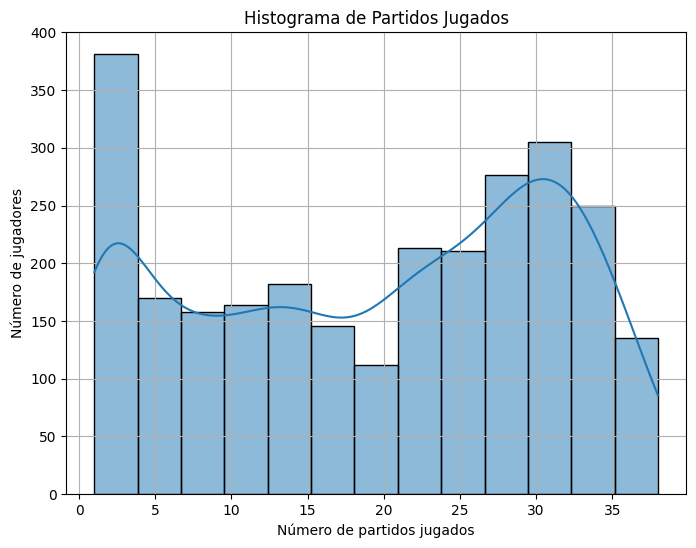

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(df_players['matches'], kde=True)
plt.title('Histograma de Partidos Jugados')
plt.xlabel('Número de partidos jugados')
plt.ylabel('Número de jugadores')
plt.grid(True)
plt.show()


Para la variable 'matches' (Partidos jugados), la distribución es ligeramente asimétrica a la izquierda (asimetría negativa), pero no es mucha, como en el caso de age. La media y mediana son parecidas (19 y 21), pero la moda es de 1 partido, lo que hace que la distribución solo sea un poco asimétrica. Esos jugadores que juegan pocos partidos hacen que la distribución sea así, sino prevalecerían los valores en torno a 25 y 35 partidos. La desviación tipica es alta e indica gran variabilidad en los minutos jugados por los jugadores. en gran parte debido a lo explicado anteriormente con los jugadores que han jugado muy pocos partidos o no han jugado ninguno.

En este caso, tampoco se observan atípicos

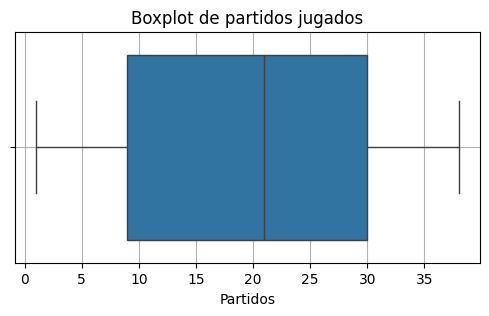

In [78]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_players['matches'])
plt.grid(True)
plt.title('Boxplot de partidos jugados')
plt.xlabel('Partidos')
plt.show()

PAISES

A continuación filtramos por nacionalidad de los jugadores. Primero hacemos un recuento y después hacemos una gráfica con los países con más de 30 jugadores en las 5 grandes ligas. Lo hacemos con un gráfico de porciones, adaptando el tamaño del gráfico para que se vea bien y no haya solapes

In [79]:
nationality_count = df_players['nation'].value_counts()
nationality_count

nation
es ESP       388
fr FRA       310
de GER       250
it ITA       227
eng ENG      211
            ... 
sy SYR         1
Argentina      1
gf GUF         1
jo JOR         1
mt MLT         1
Name: count, Length: 109, dtype: int64

Lo graficamos para observarlo mejor. Vemos que la mayoría de jugadores son de los mismo países que las ligas que analizamos (españoles, italianos, ingleses, alemanes y franceses), pero hay que tener en cuenta que aunque tengan una nacionalidad concreta pueden jugar en uno de los otros países que mencionamos. Tras estas nacionalidades los jugadores extranjeros que más juegan en las 5 ligas europeas son: Brasil, Argentina, Portugal, Países Bajos y Bélgica

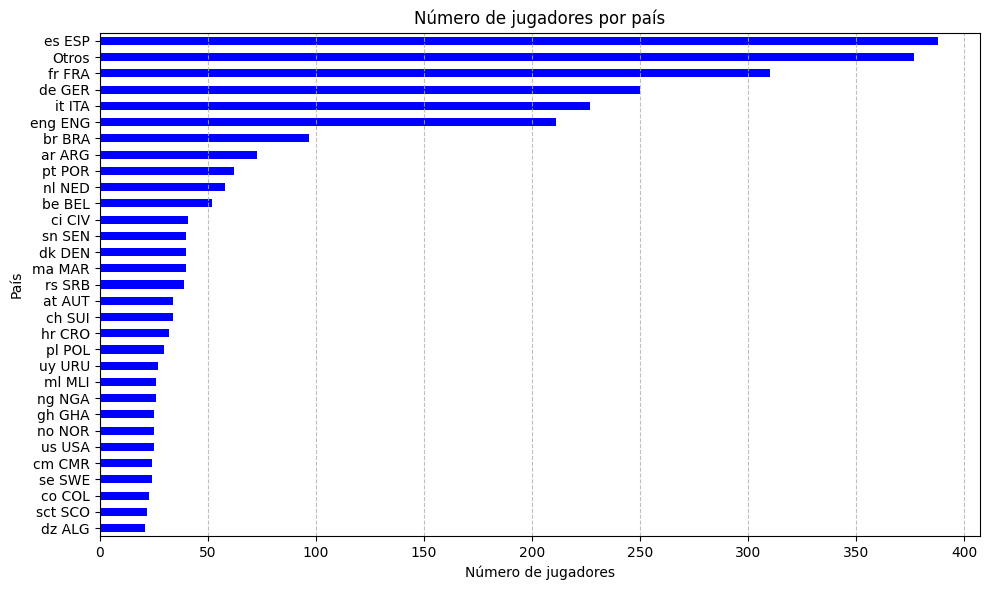

In [80]:
nationality = df_players['nation'].value_counts()

filtered_nationality = nationality[nationality > 20]
filtered_nationality['Otros'] = nationality[nationality <= 20].sum()

plt.figure(figsize=(10, 6))
filtered_nationality.sort_values().plot(kind='barh', color='blue')
plt.title('Número de jugadores por país')
plt.xlabel('Número de jugadores')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

FORMACION

In [81]:
df_players['formation'].unique()

array(['4-2-3-1', '3-5-2', '3-4-2-1', '5-3-2', '4-3-3', '4-4-2', '3-4-3'],
      dtype=object)

In [82]:
df_players['formation'].value_counts()

formation
4-2-3-1    670
4-4-2      552
4-3-3      548
3-5-2      438
3-4-2-1    223
3-4-3      216
5-3-2       56
Name: count, dtype: int64

In [83]:
df_players['formation'].describe().to_frame().T

count unique      top freq
formation  2703      7  4-2-3-1  670

Las 4 formaciones más habituales son: "4-2-3-1", "4-3-3", "4-4-2" y "3-5-2"

C:\Users\metal\AppData\Local\Temp\ipykernel_10656\490820311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_players, x='formation', order=df_players['formation'].value_counts().index, palette='PuBuGn')


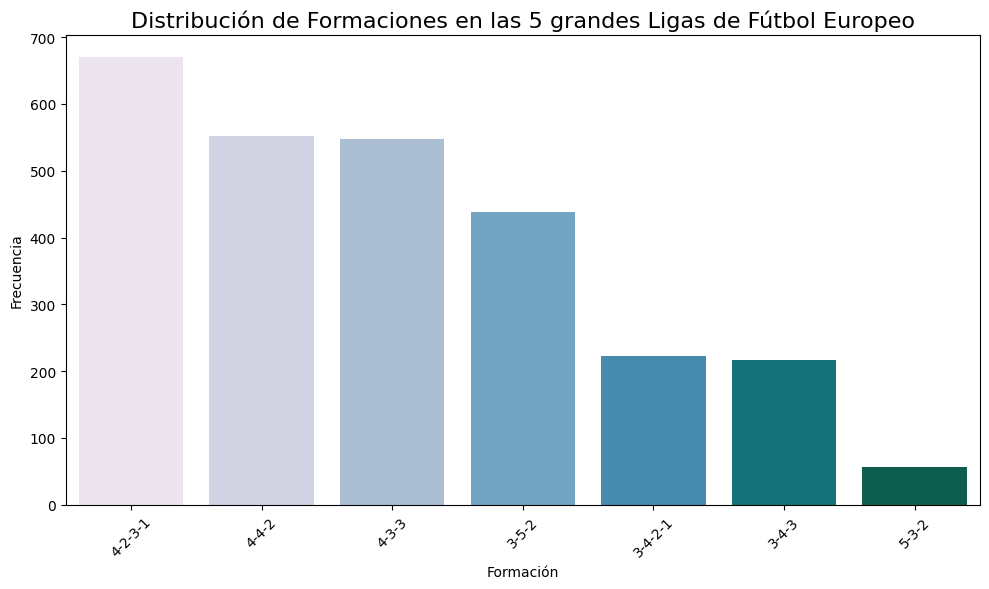

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_players, x='formation', order=df_players['formation'].value_counts().index, palette='PuBuGn')

plt.title('Distribución de Formaciones en las 5 grandes Ligas de Fútbol Europeo', fontsize=16)
plt.xlabel('Formación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.yticks()

plt.tight_layout()
plt.show()

POSICION

In [85]:
df_players['position'].unique()

array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper'], dtype=object)

In [86]:
df_players['position'].value_counts()

position
Defender      961
Midfielder    849
Forward       693
Goalkeeper    200
Name: count, dtype: int64

In [87]:
df_players['position'].describe().to_frame().T

count unique       top freq
position  2703      4  Defender  961

La posición más habitual es la de denfesa, seguida de los centrocampistas y los delanteros. Con mucha diferencia la posición con menos jugadores es la de portero.

C:\Users\metal\AppData\Local\Temp\ipykernel_10656\3047556670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_players, x='position', order=df_players['position'].value_counts().index, palette='Reds')


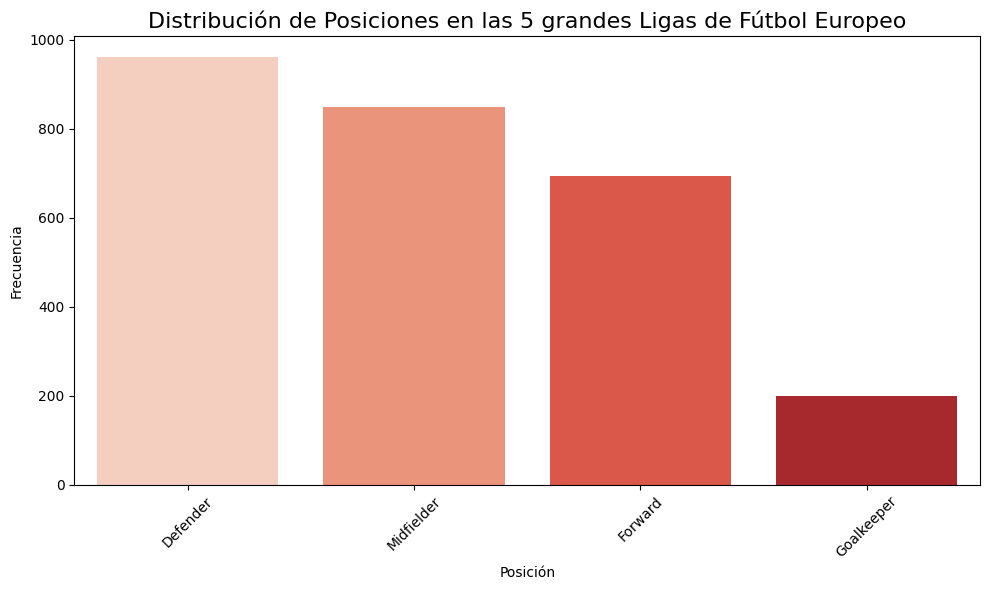

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_players, x='position', order=df_players['position'].value_counts().index, palette='Reds')

plt.title('Distribución de Posiciones en las 5 grandes Ligas de Fútbol Europeo', fontsize=16)
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.yticks()

plt.tight_layout()
plt.show()

___

GOLES

In [89]:
df_players['goals'].unique()

array([ 0,  2,  4,  5,  3,  1,  8, 10,  6,  7, 11,  9, 17, 16, 19, 14, 13,
       12, 15, 24, 28, 27, 21, 36, 18, 23])

In [90]:
df_players['goals'].value_counts().count()

np.int64(26)

In [91]:
df_players['goals'].value_counts().to_frame().T

goals    0    1    2    3    4   5   6   7   8   9   ...  19  15  17  24  27  \
count  1373  497  245  162  106  73  53  44  32  20  ...   7   7   3   3   2   

goals  18  28  21  36  23  
count   2   1   1   1   1  

[1 rows x 26 columns]

In [92]:
df_players['goals'].describe().to_frame().T

count      mean       std  min  25%  50%  75%   max
goals  2703.0  1.749168  3.231732  0.0  0.0  0.0  2.0  36.0

In [93]:
df_players[df_players['goals'] == df_players['goals'].min()].value_counts().count()

np.int64(1373)

In [94]:
max_goals = df_players[df_players['goals'] == df_players['goals'].max()]
max_goals[['player','goals', 'nation', 'team', 'league']]

player  goals   nation           team         league
1297  Harry Kane     36  eng ENG  Bayern Munich  de Bundesliga

In [95]:
print(f'La media de goles de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['goals'].mean(): .2f} goles.')
print(f'La mediana de goles de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['goals'].median(): .2f} goles.')
print(f'El número de goles más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de {df_players['goals'].mode()[0]: .2f} goles.')


La media de goles de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 1.75 goles.
La mediana de goles de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 0.00 goles.
El número de goles más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de  0.00 goles.


In [96]:
print(f'Varianza goles:{df_players['goals'].var(): .2f} goles')
print(f'Desviación típica de goles marcados:{df_players['goals'].std(): .2f} goles')
print(f'Coeficiente de variación de goles marcados:{df_players['goals'].std()/np.abs(df_players['goals'].mean()): .2f} goles')

Varianza goles: 10.44 goles
Desviación típica de goles marcados: 3.23 goles
Coeficiente de variación de goles marcados: 1.85 goles


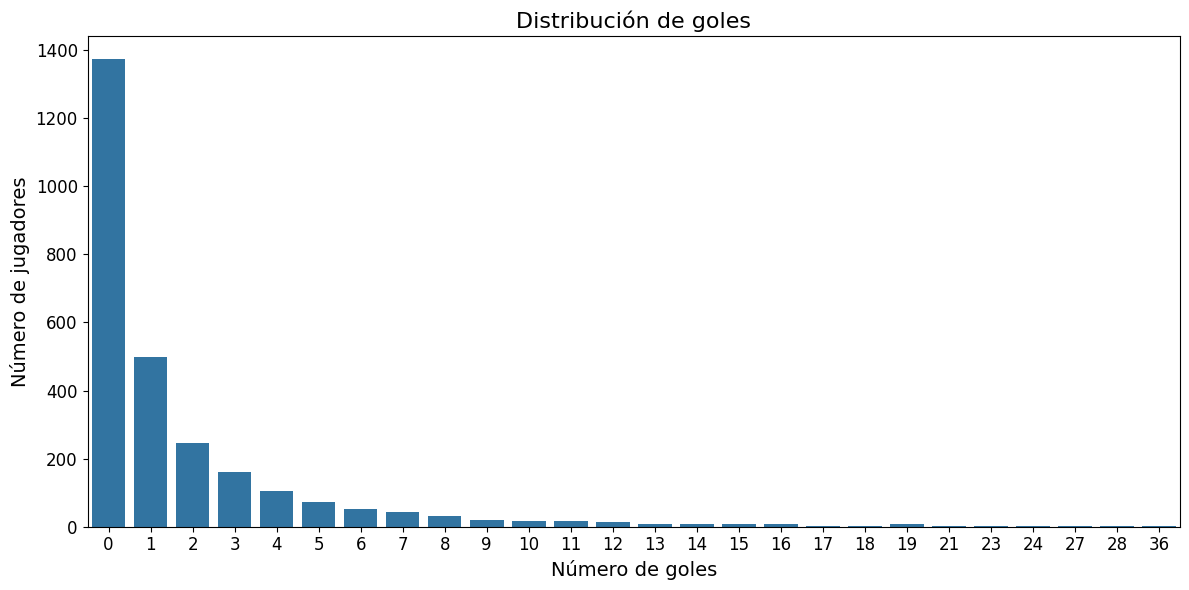

In [97]:
goals_counts = df_players['goals'].value_counts().sort_index()

goals_df = goals_counts.reset_index()
goals_df.columns = ['goals', 'frequency']

plt.figure(figsize=(12, 6))
sns.barplot(data=goals_df, x='goals', y='frequency')

plt.title('Distribución de goles', fontsize=16)
plt.xlabel('Número de goles', fontsize=14)
plt.ylabel('Número de jugadores', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [98]:
skewness_goals = df_players['goals'].skew()
skewness_goals

np.float64(3.5017208117918543)

En el caso de los goles la skewness (asimetría) es muy diferente a los otros casos (3.50). La distribución de las métricas es muy asimétrica hacia la derecha (asimetría positiva). Tiene una gran cola a la derecha.

Su media es de 1.74 goles, superior a la mediana (0 goles), lo que muestra que habrá algunos valores atípicos altos que subirán esa media con respecto a la mediana. La distribución muestra una tendencia a no marcar goles (Q1(25%) y Q2(50%)), aunque la desviación tipica de 3.23 indica variabilidad de número de goles y dispersión. 

Esta dispersión de la que hablo y la diferencia entre la media y la mediana indican que existen valores atípicos en forma de outliers que transforman la medida (mayores a 5 goles). Esto se debe a los jugadores que son más goleadores y que son un porcentaje muy pequeño con respecto al total, ya que el maximo de goles es de 36 goles (con una media de 1.74).

Text(0.5, 0, 'Goles')

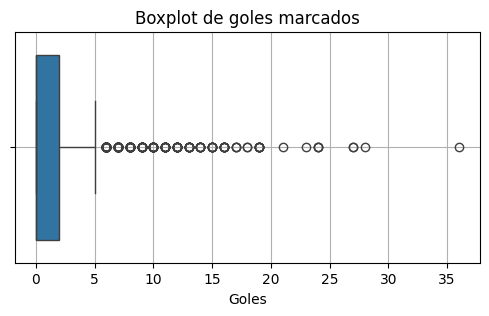

In [99]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_players['goals'])
plt.grid(True)
plt.title('Boxplot de goles marcados')
plt.xlabel('Goles')

In [100]:
Q1_goals = df_players['goals'].quantile(0.25)
Q3_goals = df_players['goals'].quantile(0.75)
IQR_goals = Q3_goals - Q1_goals

upper_limit_goals = Q3_goals + 1.5 * IQR_goals
print(f"Goles marcados que se consideran outlier: {upper_limit_goals} goles o más")

outliers_goals = df_players[df_players['goals'] > upper_limit_goals]
print(f"Cantidad de outliers: {len(outliers_goals)}")

Goles marcados que se consideran outlier: 5.0 goles o más
Cantidad de outliers: 247


Como vemos, hay muchos outliers (247 jugadores), que han marcado más de 5 goles, por lo que nos queda una distribución muy poco balanceada, debido a los jugadores que no marcan goles, que son muchos. Por ello vamos a filtrar los jugadores con más de 5 goles, pero como nos da muchos resultados para graficar (247), filtraremos también por jugadores con más de 15 goles.

In [101]:
goleadores = df_players[df_players['goals'] > 5]
goleadores

player   nation    position             team formation  \
18           Akor Adams   ng NGA     Forward      Montpellier     4-3-3   
23       Elijah Adebayo  eng ENG     Forward       Luton Town   4-2-3-1   
25        Simon Adingra   ci CIV     Forward         Brighton     3-4-3   
55    Maghnes Akliouche   fr FRA  Midfielder           Monaco     4-4-2   
88       Julián Álvarez   ar ARG  Midfielder  Manchester City     4-3-3   
...                 ...      ...         ...              ...       ...   
2784         Chris Wood   nz NZL     Forward  Nott'ham Forest   4-2-3-1   
2804    Mattia Zaccagni   it ITA     Forward            Lazio     4-3-3   
2833      Edon Zhegrova   xk KVX     Forward            Lille     4-4-2   
2838     Joshua Zirkzee   nl NED     Forward          Bologna   4-2-3-1   
2848    Martin Ødegaard   no NOR  Midfielder          Arsenal   4-2-3-1   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
18                   12.2             46.4       78.8              17.9   
23                   11.4             45.6       78.1              15.6   
25                   12.8             50.7       81.3              14.2   
55                   12.8             54.2       82.7              16.5   
88                   15.8             60.8       89.4              12.8   
...                   ...              ...        ...               ...   
2784                 11.1             41.6       78.3              15.2   
2804                 13.8             52.2       83.8              14.6   
2833                 12.8             52.6       83.5              15.8   
2838                 13.1             50.7       81.5              15.1   
2848                 12.1             52.7       85.0              13.5   

                  league  ...  yellow_cards red_cards  expected_goals  \
18            fr Ligue 1  ...             2         0            12.4   
23    eng Premier League  ...             1         0             5.9   
25    eng Premier League  ...             3         0             4.3   
55            fr Ligue 1  ...             5         0             5.4   
88    eng Premier League  ...             2         0            13.0   
...                  ...  ...           ...       ...             ...   
2784  eng Premier League  ...             0         0            11.9   
2804          it Serie A  ...             8         0             4.7   
2833          fr Ligue 1  ...             3         1             6.2   
2838          it Serie A  ...             8         0             9.0   
2848  eng Premier League  ...             2         0             7.4   

      expected_assists  progressive_carries  progressive_passes  \
18                 1.9                 40.0                17.0   
23                 0.7                 16.0                23.0   
25                 3.7                111.0                50.0   
55                 3.5                 46.0                93.0   
88                 6.4                 64.0               103.0   
...                ...                  ...                 ...   
2784               2.1                 16.0                30.0   
2804               2.9                 88.0                55.0   
2833               6.2                110.0                90.0   
2838               5.2                 53.0                86.0   
2848               9.6                 91.0               344.0   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
18               127.0         0.32           0.04                 0.36  
23               110.0         0.63           0.00                 0.63  
25               278.0         0.24           0.04                 0.28  
55               135.0         0.39           0.22                 0.61  
88               180.0         0.37           0.27                 0.65  
...                ...          ...            ...                  ...  
2784           

In [102]:
max_goleadores = df_players[df_players['goals'] > 15]
max_goleadores

player   nation    position                 team  \
156   Pierre-Emerick Aubameyang   ga GAB     Forward            Marseille   
254            Maximilian Beier   de GER     Forward           Hoffenheim   
265             Jude Bellingham  eng ENG  Midfielder          Real Madrid   
273           Wissam Ben Yedder   fr FRA     Forward               Monaco   
363                Jarrod Bowen  eng ENG     Forward             West Ham   
398                Ante Budimir   hr CRO     Forward              Osasuna   
647              Jonathan David   ca CAN     Forward                Lille   
765                Artem Dovbyk   ua UKR     Forward               Girona   
817           Youssef En-Nesyri   ma MAR     Forward              Sevilla   
885                  Phil Foden  eng ENG     Forward      Manchester City   
1035          Antoine Griezmann   fr FRA     Forward      Atletico Madrid   
1064            Serhou Guirassy   gn GUI     Forward        VfB Stuttgart   
1081             Erling Haaland   no NOR     Forward      Manchester City   
1138              Son Heung-min   kr KOR     Forward            Tottenham   
1192             Alexander Isak   se SWE     Forward     Newcastle United   
1297                 Harry Kane  eng ENG     Forward        Bayern Munich   
1412        Alexandre Lacazette   fr FRA     Forward                 Lyon   
1472         Robert Lewandowski   pl POL     Forward            Barcelona   
1643           Lautaro Martínez   ar ARG     Forward                Inter   
1659       Jean-Philippe Mateta   fr FRA     Forward       Crystal Palace   
1690              Kylian Mbappé   fr FRA     Forward  Paris Saint-Germain   
1982                Loïs Openda   be BEL     Forward           RB Leipzig   
2313                Bukayo Saka  eng ENG     Forward              Arsenal   
2316              Mohamed Salah   eg EGY     Forward            Liverpool   
2469            Dominic Solanke  eng ENG     Forward          Bournemouth   
2542          Alexander Sørloth   no NOR     Forward           Villarreal   
2657                Deniz Undav   de GER     Forward        VfB Stuttgart   
2724             Dušan Vlahović   rs SRB     Forward             Juventus   
2746              Ollie Watkins  eng ENG     Forward          Aston Villa   

     formation  team_shots_per_game  team_possession  team_pass  \
156    4-2-3-1                 10.0             52.4       82.0   
254      3-5-2                 12.6             50.8       80.7   
265      4-3-3                 14.4             57.7       87.7   
273      4-4-2                 12.8             54.2       82.7   
363    4-2-3-1                 12.3             44.5       77.8   
398      4-4-2                  9.8             44.6       70.2   
647      4-4-2                 12.8             52.6       83.5   
765      3-5-2                  6.8             58.9       88.7   
817      4-3-3                 12.1             58.7       86.2   
885      4-3-3                 15.8             60.8       89.4   
1035     5-3-2                 12.1             51.8       83.1   
1064   3-4-2-1                 13.4             51.5       81.1   
1081     4-3-3                 15.8             60.8       89.4   
1138   3-4-2-1                 11.7             51.3       81.8   
1192     4-3-3                 10.4             41.6       76.0   
1297   4-2-3-1                 17.1             58.1       85.5   
1412     4-3-3                 16.1             53.6       84.7   
1472     4-3-3                 15.3             62.4       89.7   
1643     3-5-2                 14.5             52.0       87.0   
1659     4-3-3                  9.2             42.9       76.1   
1690     4-3-3                 15.0             60.1       89.5   
1982     3-4-3                 16.0             57.3       83.2   
2313   4-2-3-1                 12.1             52.7       85.0   
2316     4-3-3                 16.0             59.0       85.7   
2469   4-2-3-1                 13.0    

<Axes: xlabel='player'>

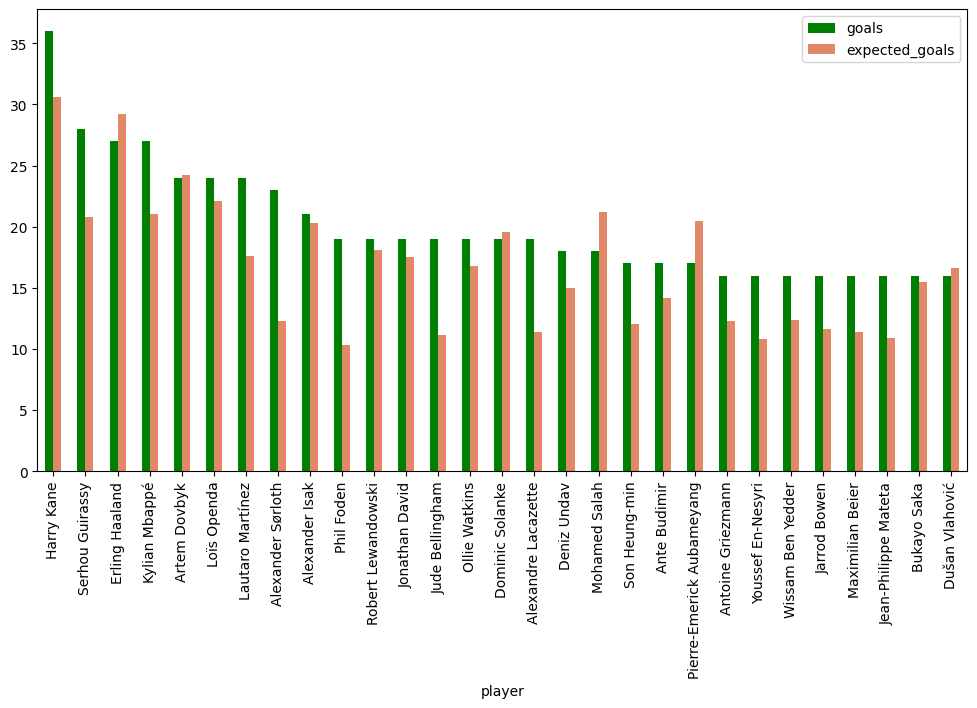

In [103]:
goleadores_ordered = max_goleadores.sort_values(by='goals', ascending=False)
goleadores_ordered.set_index('player')[['goals', 'expected_goals']].plot.bar(
    color=['green', '#e18868'], figsize=(12, 6))

Como vemos hay jugadores que han superado las expectativas de goles y han marcado bastantes más de los esperados, como: Jude Bellingham, Jarrod Bowen, , Ante Budimir, Phil Foden, Guirassy, Son Heung Min, Harry Kane, Alexander Lacazzete, Lautaro Martçinez, Kylian Mbappé, Cole Palmer o Sorloth.

Otros jugadores están por debajo de los expected goals: Aubameyang, Dobvyk, Erling Haaland y Mohamed Salah.Esto no quiere decir que estén marcando pocos goles o jugando mal, ya que todos tienen cifras goleadoras bastante buenas, pero puede ser que la/s temporada/s anteriores fueran aún más goleadoras. Algunos casos están muy cerca los goles y los expected goals, por lo que se puede considerar normal

ASSISTS

In [104]:
df_players['assists'].value_counts().count()

np.int64(14)

In [105]:
df_players['assists'].describe().to_frame().T

count      mean       std  min  25%  50%  75%   max
assists  2703.0  1.243803  1.972266  0.0  0.0  0.0  2.0  14.0

In [106]:
print(f'La media de asistencias de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['assists'].mean(): .2f} asistencias.')
print(f'La mediana de asistencias de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['assists'].median(): .2f} asistencias.')
print(f'El número de asistencias más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de {df_players["assists"].mode()[0]: .2f} asistencias.')

La media de asistencias de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 1.24 asistencias.
La mediana de asistencias de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 0.00 asistencias.
El número de asistencias más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de  0.00 asistencias.


In [107]:
min_assists = df_players[df_players['assists'] == df_players['assists'].min()]
min_assists[['player','assists', 'nation', 'team', 'league']]

player  assists  nation           team              league
3     Keyliane Abdallah        0  fr FRA      Marseille          fr Ligue 1
4      Yunis Abdelhamid        0  ma MAR          Reims          fr Ligue 1
5     Salis Abdul Samed        0  gh GHA           Lens          fr Ligue 1
6         Nabil Aberdin        0  fr FRA         Getafe          es La Liga
8        Matthis Abline        0  fr FRA         Nantes          fr Ligue 1
...                 ...      ...     ...            ...                 ...
2842       Nadir Zortea        0  it ITA       Atalanta          it Serie A
2843         Kurt Zouma        0  fr FRA       West Ham  eng Premier League
2846   Szymon Żurkowski        0  pl POL         Empoli          it Serie A
2847     Lovro Zvonarek        0  hr CRO  Bayern Munich       de Bundesliga
2851   Mateusz Łęgowski        0  pl POL    Salernitana          it Serie A

[1428 rows x 5 columns]

In [108]:
max_assists = df_players[df_players['assists'] == df_players['assists'].max()]
max_assists[['player','assists', 'nation', 'team', 'league']]

player  assists  nation        team      league
180  Alex Baena       14  es ESP  Villarreal  es La Liga

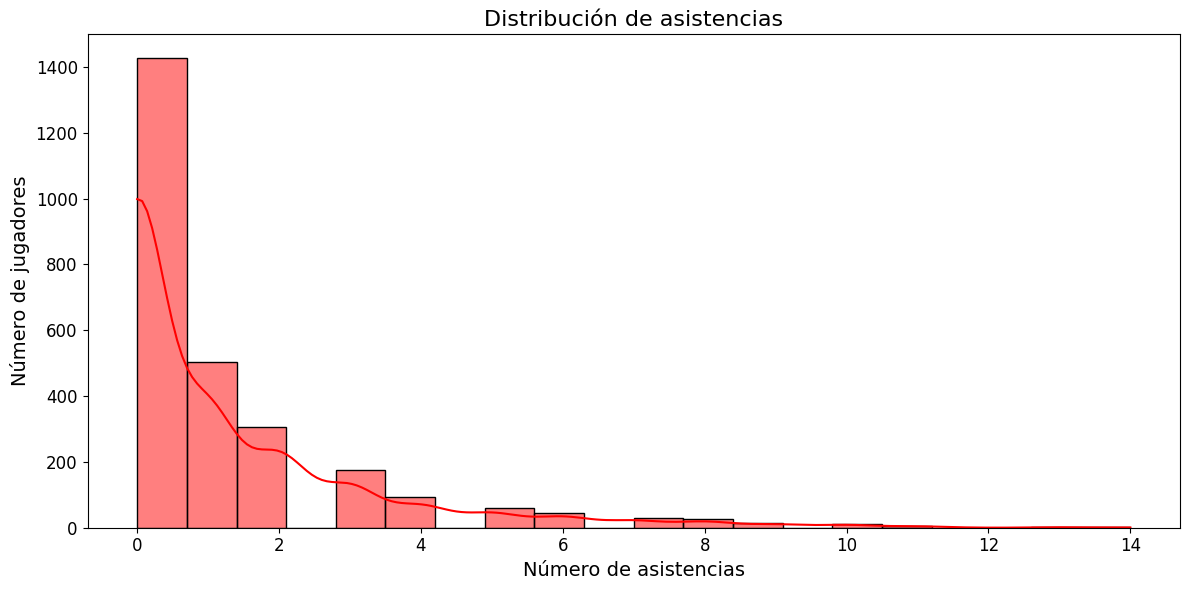

In [109]:
plt.figure(figsize=(12, 6))
sns.histplot(df_players['assists'], kde=True, color='red', bins=20)

plt.title('Distribución de asistencias', fontsize=16)
plt.xlabel('Número de asistencias', fontsize=14)
plt.ylabel('Número de jugadores', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [110]:
skewness_assists = df_players['assists'].skew()
skewness_assists

np.float64(2.3010928896251075)

Con Assists nos pasa un poco como con goles, pero quizás no tan marcado. Aún así sigue siendo una distribución muy asimétrica hacia la derecha (asimetría positiva), de 2.30. Sigue teniendo mucha cola a la derecha.

Su media es de 1.24 asistencias de gol, y la mediana y moda siguen siendo 0. La distribución muestra una tendencia a no dar asistencias (Q1(25%) y Q2(50%), primer y segundo cuartil). La desviación tipica de 1.93, lo cual tampoco indica una variablidad tan grande como la que existe debido a los valores de 0 asistencias.

La dispersión y la diferencia entre la media y la mediana indican también valores atípicos en forma de outliers que transforman la medida. Esto se debe a la gran diferencia entre muchos jugadores sin asistencias y el máximo asistente, con 14 asistencias.

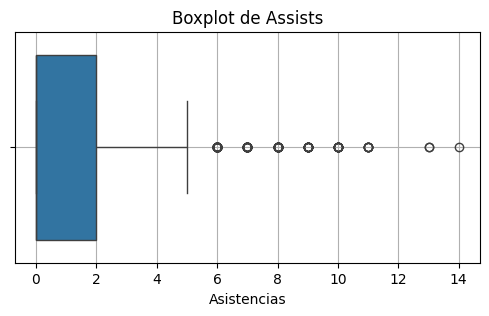

In [111]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_players['assists'])
plt.grid(True)
plt.title('Boxplot de Assists')
plt.xlabel('Asistencias')
plt.show()

In [112]:
Q1_assists = df_players['assists'].quantile(0.25)
Q3_assists = df_players['assists'].quantile(0.75)
IQR_assists = Q3_assists - Q1_assists

upper_limit_assists = Q3_assists + 1.5 * IQR_assists
print(f"Asistencias de gol que se consideran outlier: {upper_limit_assists} asistencias o más")

outliers_assists = df_players[df_players['assists'] > upper_limit_assists]
print(f"Cantidad de outliers: {len(outliers_assists)}")

Asistencias de gol que se consideran outlier: 5.0 asistencias o más
Cantidad de outliers: 137


In [113]:
max_GA = df_players[df_players['goals_assists'] == df_players['goals_assists'].max()]
max_GA

player   nation position           team formation  \
1297  Harry Kane  eng ENG  Forward  Bayern Munich   4-2-3-1   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
1297                 17.1             58.1       85.5              12.9   

             league  ...  yellow_cards red_cards  expected_goals  \
1297  de Bundesliga  ...             2         0            30.6   

      expected_assists  progressive_carries  progressive_passes  \
1297               6.4                 36.0               102.0   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
1297             164.0         1.14           0.25                 1.39  

[1 rows x 29 columns]

In [114]:
print(f'El jugador de las 5 grandes ligas más goleador es {max_goals['player'].iloc[0]}')
print(f'El jugador de las 5 grandes ligas más asistente es {max_assists['player'].iloc[0]}')
print(f'El jugador de las 5 grandes ligas más goleador y asistente (sumados) es {max_GA['player'].iloc[0]}')

El jugador de las 5 grandes ligas más goleador es Harry Kane
El jugador de las 5 grandes ligas más asistente es Alex Baena
El jugador de las 5 grandes ligas más goleador y asistente (sumados) es Harry Kane


CARDS

In [115]:
df_players[['yellow_cards', 'red_cards']].describe().T

count      mean       std  min  25%  50%  75%   max
yellow_cards  2703.0  2.713651  2.753127  0.0  0.0  2.0  4.0  17.0
red_cards     2703.0  0.121347  0.356912  0.0  0.0  0.0  0.0   3.0

In [116]:
print(f'La media de tarjetas amarillas de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['yellow_cards'].mean(): .2f} tarjetas amarillas.')
print(f'La mediana de tarjetas amarillas de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de{df_players['yellow_cards'].median(): .2f} tarjetas amarillas.')
print(f'El número de tarjetas amarillas más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de {df_players["yellow_cards"].mode()[0]: .2f} tarjetas amarillas .')

La media de tarjetas amarillas de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 2.71 tarjetas amarillas.
La mediana de tarjetas amarillas de los jugadores de las 5 grandes ligas europeas en la temporada 23/24 es de 2.00 tarjetas amarillas.
El número de tarjetas amarillas más habitual entre los jugadores de las 5 grandes ligas en la temporada 23/24 es de  0.00 tarjetas amarillas .


In [117]:
max_yellow_cards = df_players[df_players['yellow_cards'] == df_players['yellow_cards'].max()]
max_yellow_cards[['player','yellow_cards', 'nation', 'team', 'league']]

player  yellow_cards  nation   team      league
68  Iván Alejo            17  es ESP  Cadiz  es La Liga

Para las tarjetas amarillas observamos que el máximo es Iván Alejo con 17. Esta variable tiene outliers a partir de 10 tarjetas amarillas y el total de esos outliers son 36 jugadores. Estos pueden representar jugadores más agresivos o de tipo de juego de contención y defensivos.

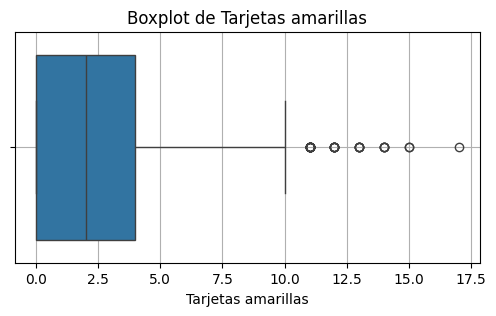

In [118]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_players['yellow_cards'])
plt.grid(True)
plt.title('Boxplot de Tarjetas amarillas')
plt.xlabel('Tarjetas amarillas')
plt.show()

In [119]:
Q1_yellow_cards = df_players['yellow_cards'].quantile(0.25)
Q3_yellow_cards = df_players['yellow_cards'].quantile(0.75)
IQR_yellow_cards = Q3_yellow_cards - Q1_yellow_cards

upper_limit_yellow_cards = Q3_yellow_cards + 1.5 * IQR_yellow_cards
print(f"Tarjetas amarillas que se consideran outlier: {upper_limit_yellow_cards} tarjetas o más")

outliers_yellow_cards = df_players[df_players['yellow_cards'] > upper_limit_yellow_cards]
print(f"Cantidad de outliers: {len(outliers_yellow_cards)}")

Tarjetas amarillas que se consideran outlier: 10.0 tarjetas o más
Cantidad de outliers: 36


In [120]:
max_red_cards = df_players[df_players['red_cards'] == df_players['red_cards'].max()]
max_red_cards[['player','red_cards', 'nation', 'team', 'league']]


player  red_cards  nation           team         league
493   Maximiliano Caufriez          3  be BEL  Clermont Foot     fr Ligue 1
1413       Maxence Lacroix          3  fr FRA      Wolfsburg  de Bundesliga

Para las tarjetas rojas, los máximos apercibidos son Maximiliano Caufriez y Maxence Lacroix, con 3 tarjetas rojas cada uno. Observamos que con ver una tarjeta roja ya se consideraría atípico, siendo los valores atípicos de 1, 2 y 3 tarjetas rojas.

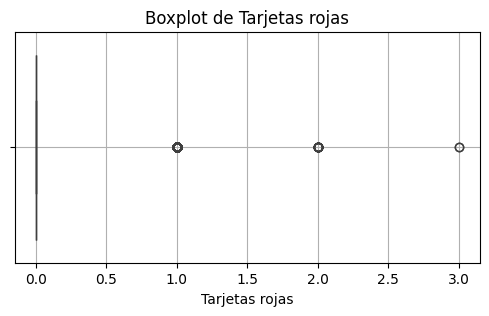

In [121]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_players['red_cards'])
plt.grid(True)
plt.title('Boxplot de Tarjetas rojas')
plt.xlabel('Tarjetas rojas')
plt.show()

Text(0, 0.5, 'Número de tarjetas')

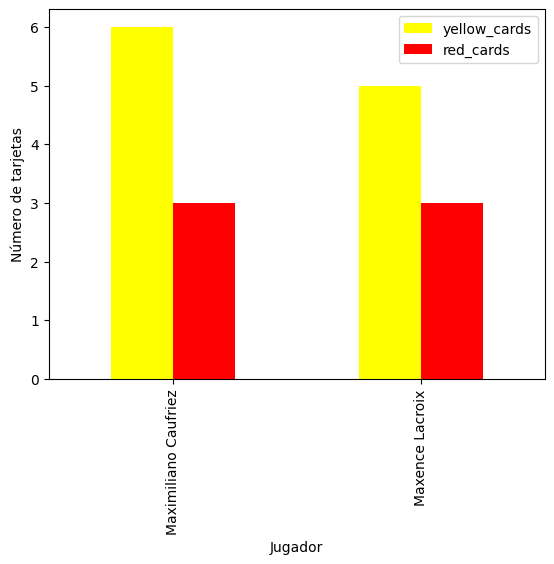

In [122]:
max_red_cards.set_index('player')[['yellow_cards', 'red_cards']].plot.bar(color=['yellow', 'red'])
plt.xlabel('Jugador')
plt.ylabel('Número de tarjetas')

Jugadores con más tarjetas (amarillas y rojas en conjunto. Sumadas)

In [123]:
max_cards = df_players[(df_players['yellow_cards'] + df_players['red_cards']) == (df_players['yellow_cards'] + df_players['red_cards']).max()]
max_cards[['player','yellow_cards', 'red_cards', 'nation', 'team', 'league']]

player  yellow_cards  red_cards  nation   team      league
68  Iván Alejo            17          0  es ESP  Cadiz  es La Liga

También calculamos los jugadores con más tarjetas amarillas y rojas en conjunto, pero filtrando que las tarjetas rojas sean mayor que 0, ya que el caso de Iván Alejo es el que más tarjetas totales tiene, pero no tiene tarjetas rojas.

In [124]:
max_cards_2 = df_players[(df_players['red_cards'] > 0) & 
                       ((df_players['yellow_cards'] + df_players['red_cards']) == 
                        (df_players.loc[df_players['red_cards'] > 0, 'yellow_cards'] + 
                         df_players.loc[df_players['red_cards'] > 0, 'red_cards']).max())]

max_cards_2[['player', 'yellow_cards', 'red_cards', 'nation', 'team', 'league']]

player  yellow_cards  red_cards  nation           team  \
777       Ondrej Duda            14          2  sk SVK  Hellas Verona   
1351     Dominik Kohr            15          1  de GER       Mainz 05   
2040  Leandro Paredes            15          1  ar ARG           Roma   

             league  
777      it Serie A  
1351  de Bundesliga  
2040     it Serie A

### RELACIONES ENTRE VARIABLES

In [125]:
df_players[['matches', 'minutes', 'goals', 'assists']].cov()

matches        minutes        goals     assists
matches    132.732755   10197.873003    16.370580   11.414697
minutes  10197.873003  933894.407184  1246.729156  892.462907
goals       16.370580    1246.729156    10.444092    3.599296
assists     11.414697     892.462907     3.599296    3.889835

La covarianza entre partidos y minutos es muy alta y positiva, lo que nos muestra que hay una relación directa entre las dos variables (relación fuerte). Esta es más lógica, ya que cuantos más partidos más minutos se suelen jugar.

Entre partidos y goles hay una covarianza pequeña y positiva, por lo hay una relación entre jugar partidos y marcar goles, aunque sea pequeña. Es el mismo caso que con las asistencias, que es algo más baja.

Entre minutos y goles observamos una fuerte relación de covarianza, por lo que cuanto más tiempo juegue un jugador, más probabilidades tiene de marcar un gol. También pasa parecido con las asistencias.

Por último, la relación de covarianza entre goles y asistencias, auqnue es positiva, vemos que es bastante baja, por lo que hay muy poca relación entre ambas (relación débil). Poe ello, no siemrpe los goloes tendrá una relación directa con las asistencias para un mismo jugador 



In [126]:
df_cuantitativo = df_players[['age','matches', 'minutes', 'goals', 'assists', 'yellow_cards', 'red_cards',
                            'progressive_carries', 'progressive_passes', 'progressive_runs']]
df_cuantitativo.corr()

age   matches   minutes     goals   assists  \
age                  1.000000  0.242727  0.257339  0.066747  0.081791   
matches              0.242727  1.000000  0.915950  0.439683  0.502354   
minutes              0.257339  0.915950  1.000000  0.399198  0.468248   
goals                0.066747  0.439683  0.399198  1.000000  0.564699   
assists              0.081791  0.502354  0.468248  0.564699  1.000000   
yellow_cards         0.179374  0.628300  0.644766  0.214006  0.297903   
red_cards            0.078101  0.161314  0.172126  0.040195  0.068892   
progressive_carries  0.007055  0.587479  0.538710  0.494113  0.685912   
progressive_passes   0.176975  0.675285  0.712289  0.296744  0.541589   
progressive_runs     0.036812  0.563438  0.469846  0.654012  0.727708   

                     yellow_cards  red_cards  progressive_carries  \
age                      0.179374   0.078101             0.007055   
matches                  0.628300   0.161314             0.587479   
minutes                  0.644766   0.172126             0.538710   
goals                    0.214006   0.040195             0.494113   
assists                  0.297903   0.068892             0.685912   
yellow_cards             1.000000   0.262112             0.359660   
red_cards                0.262112   1.000000             0.080171   
progressive_carries      0.359660   0.080171             1.000000   
progressive_passes       0.598073   0.154732             0.599229   
progressive_runs         0.268434   0.049124             0.866797   

                     progressive_passes  progressive_runs  
age                            0.176975          0.036812  
matches                        0.675285          0.563438  
minutes                        0.712289          0.469846  
goals                          0.296744          0.654012  
assists                        0.541589          0.727708  
yellow_cards                   0.598073          0.268434  
red_cards                      0.154732          0.049124  
progressive_carries            0.599229          0.866797  
progressive_passes             1.000000          0.442726  
progressive_runs               0.442726          1.000000

<Axes: >

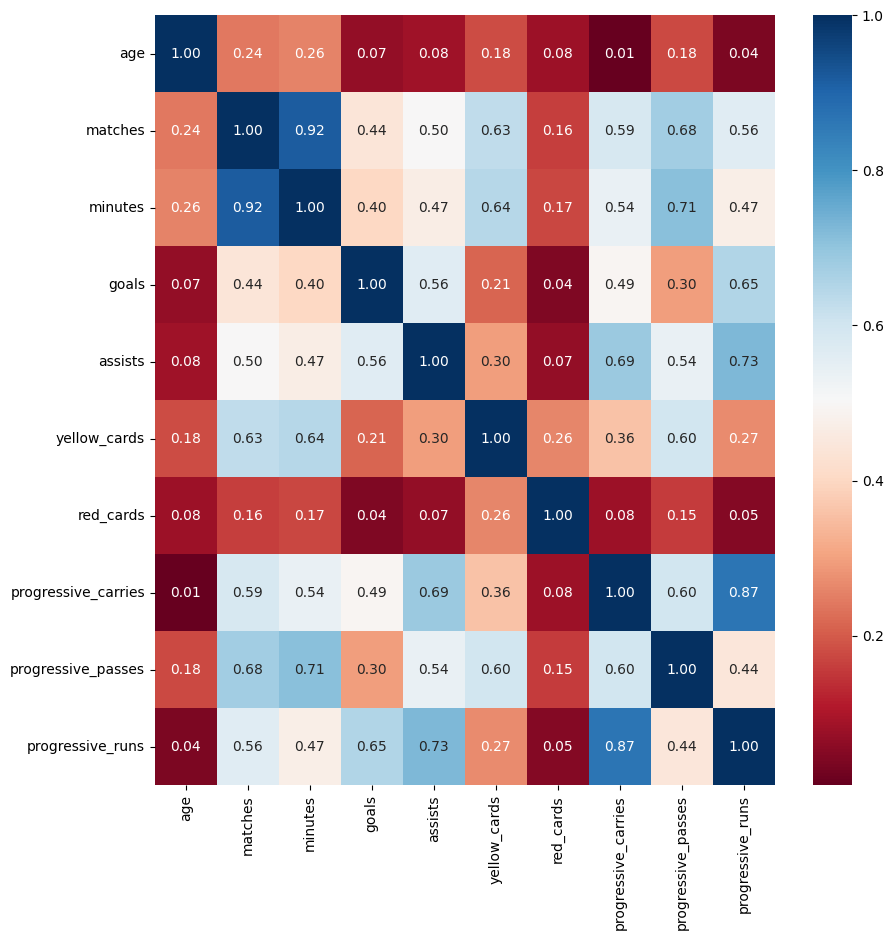

In [127]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cuantitativo.corr(),annot=True,fmt='.2f',cmap='RdBu')

Observamos poca correlación entre la variable 'edad' con el resto de variables. Vemos que la edad tiene una relación muy baja (menor a 0.1) con los goles, asistencias, tarjetas rojas y variables progresivas del juego. Parece que la edad no influye tanto en las estadísticas y rendimiento de los jugadores a nivel general, anque luego analizaremos esto por tramos de edad, para observar los rendimientos de jóvemes y veteranos.

 En el caso de matches y minutes, al estar muy correlacionadas entre ellas, vemos que tienen unas correlaciones muy parecidas con respecto al resto. Se observa una correlación importante con las tarjetas amarillas (0.63), los pases progresivos, conducciones progresivas y carreras progresivas, indicando que cuantos más minutos y partidos disputa un jugador, más suben la posibilidad de recibir tarjetas amarillas y de crear acciones progresivas del juego. el resto son moderadas, lo que indica que los partidos y minutos jugados influyen muchos en todas las estadísitcas de tipo cuantitiativo del juego de los futbolistas.

Goles y asistencias también presentan correlaciones similares con el resto de variables, si bien hay que puntualizar que para asistencias son ligeramente más altas. Las variables con las que más correlación tienen es entre ellas (goles y asistencias) con un valor considerable (0.56) y con carreras y conducciones progresivas (0.65 y 0.49). Tienen una correlación positiva moderada con los minutos y partidos jugados. Todo esto nos indica una tendencia a marcar más goles cuando se dan más asistencias (y viceversa) y también se observa que los jugadores que aportan más al equipo con goles y asistencias, también tienen a aportar al juego porgresivo del equipo (conducciones y carreras progresivas). Goles y asistencias tienen una correlación muy baja con la edad y las tarjetas rojas, indicando que no son parámetros que influyan mucho.

Las tarjetas amarillas y rojas están moderadamente relacionas entre sí y con el resto de variable sí tienen  diferencias. Las tarjetas amarillas están bastante correlacionadas con minutos y partidos, a más partidos jugados más amarillas. Se observa una alta correlación con los pases progresivos, por lo que los jugadores más implicados en pases que llevan a jugadas importantes también tienden a recibir más tarjetas amarillas. Las tarjetas rojas tienen muy poca correlació con el resto, solamente con tarjetas amarillas, por lo que si un jugador ha recibido tarjetas amarillas puede tender a recibir rojas también.

Las acciones progresivas del juego tienen mucha relación entre ellas, sobre todo las conducciones progresivas y las carreras progresivas. están bastantes relacionadas con los partidos, minutos, goles, asistencias, como ya hemos comentado anteriormente.



___
Hemos quitado del heatmap de correlaciones las variables "expected", ya que lo hemos comprobado anteriormente y están completamente correlacionadas con sus pares (ej: expected goals con goals o expected assists con assists). Esto indica que estas variables expected son muy buenas métricas y predicen bien los rendimientos reales correspondientes a su par. A su vez, los goles y asistencias están inversamente correlacionadas (negativamente)

In [128]:
df_expected = df_players[['goals', 'expected_goals', 'assists', 'expected_assists']].corr()

<Axes: >

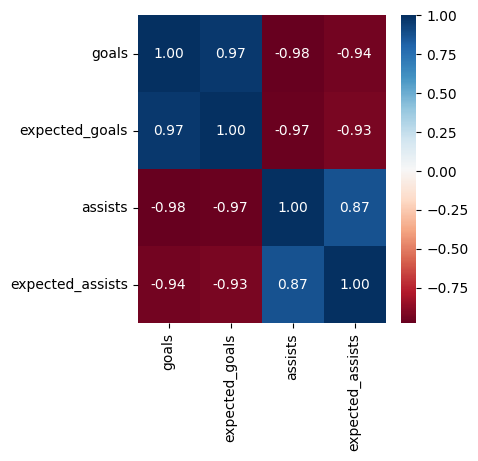

In [129]:
plt.figure(figsize=(4,4))
sns.heatmap(df_expected.corr(),annot=True,fmt='.2f',cmap='RdBu')

In [130]:
df_correlaciones = df_cuantitativo.corr()
df_correlaciones = df_correlaciones.where(np.triu(np.ones(df_correlaciones.shape)).astype(bool))
df_correlaciones = df_correlaciones.stack().reset_index()
df_correlaciones.columns = ['Row','Column','Value']
df_correlaciones = df_correlaciones[df_correlaciones['Row']!=df_correlaciones['Column']]
df_correlaciones.head()

Row        Column     Value
1  age       matches  0.242727
2  age       minutes  0.257339
3  age         goals  0.066747
4  age       assists  0.081791
5  age  yellow_cards  0.179374

Comprobamos que existe colinealidad entre las variables 'Minutes y Matches' y entre progressive carrries y progressive runs. Minutes y matches van muy de la mano, ya que cuando sube uno, normalmente sube el otro en proporción. Con las variables de 'juego progresivo', tenemos dos variables distintas, pero que se  muestran muy correlacionadas. Si se aplicasen modelos más adelante habría que plantear la eliminación de alguna de las variables para ambos casos

In [131]:
df_colinealidad = df_correlaciones[abs(df_correlaciones['Value'])>0.85]
df_colinealidad

Row            Column     Value
11              matches           minutes  0.915950
51  progressive_carries  progressive_runs  0.866797

___
RELACIONES POR POSICIONES

Vemos como las posiciones de delantero (Forward) son las que más goles marcan: los mediocentros también tienen estadísticas con bastantes goles, ya que puede ser centrocampistas ofensivos, mientras que todas las relativas a defensores (las que contienen DF) son las que menos marcan. Aparte los porteros (GK) promedian 0 goles.

Goles por posición en el campo

In [132]:
goals_by_position = df_players[['goals', 'position']].groupby(by='position').mean().sort_values(by='goals', ascending=False)
goals_by_position

goals
position            
Forward     3.861472
Midfielder  1.557126
Defender    0.759625
Goalkeeper  0.000000

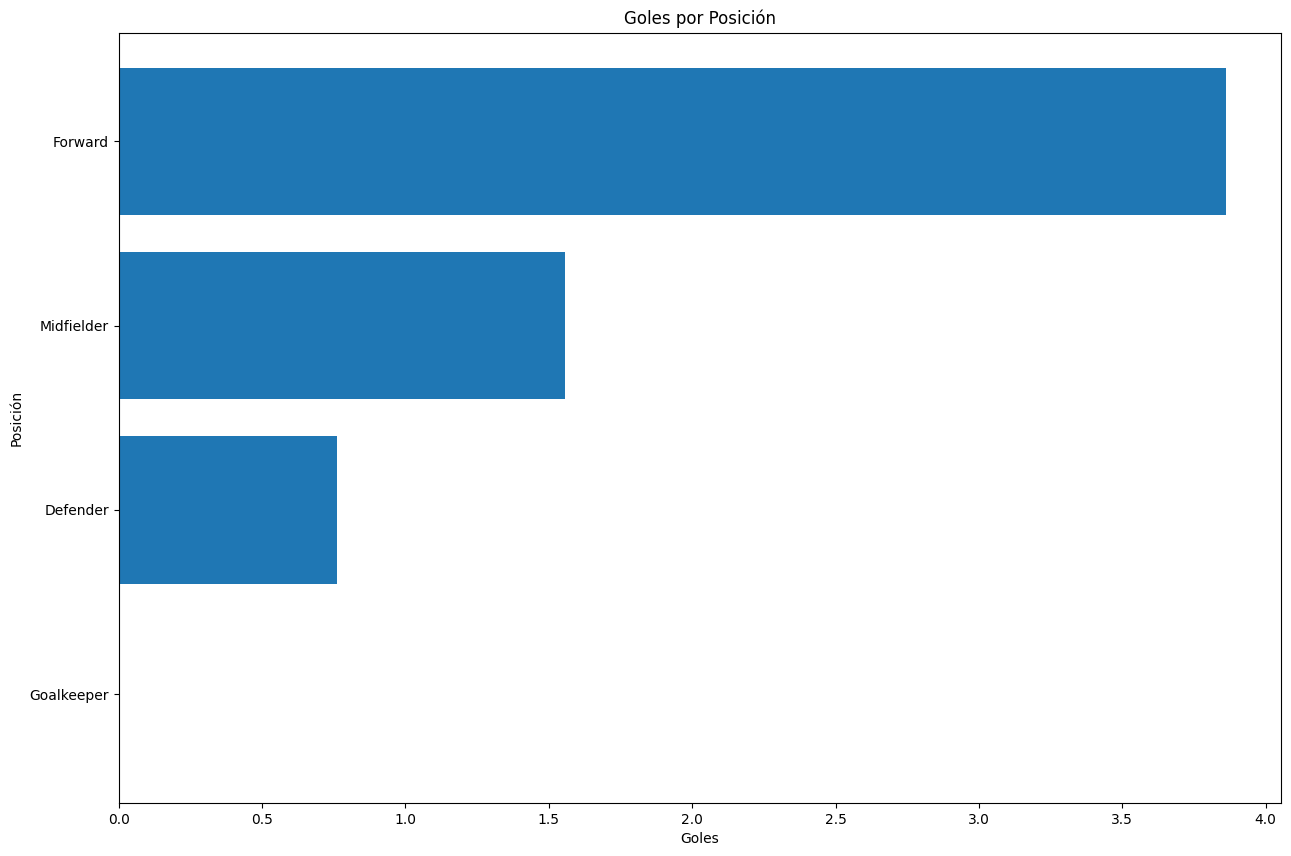

In [133]:
plt.figure(figsize=(15,10))
goals_by_position = goals_by_position.sort_values(by='goals', ascending=True)
plt.barh(goals_by_position.index, goals_by_position['goals'])
plt.xlabel('Goles')
plt.ylabel('Posición')
plt.title('Goles por Posición')
plt.show()

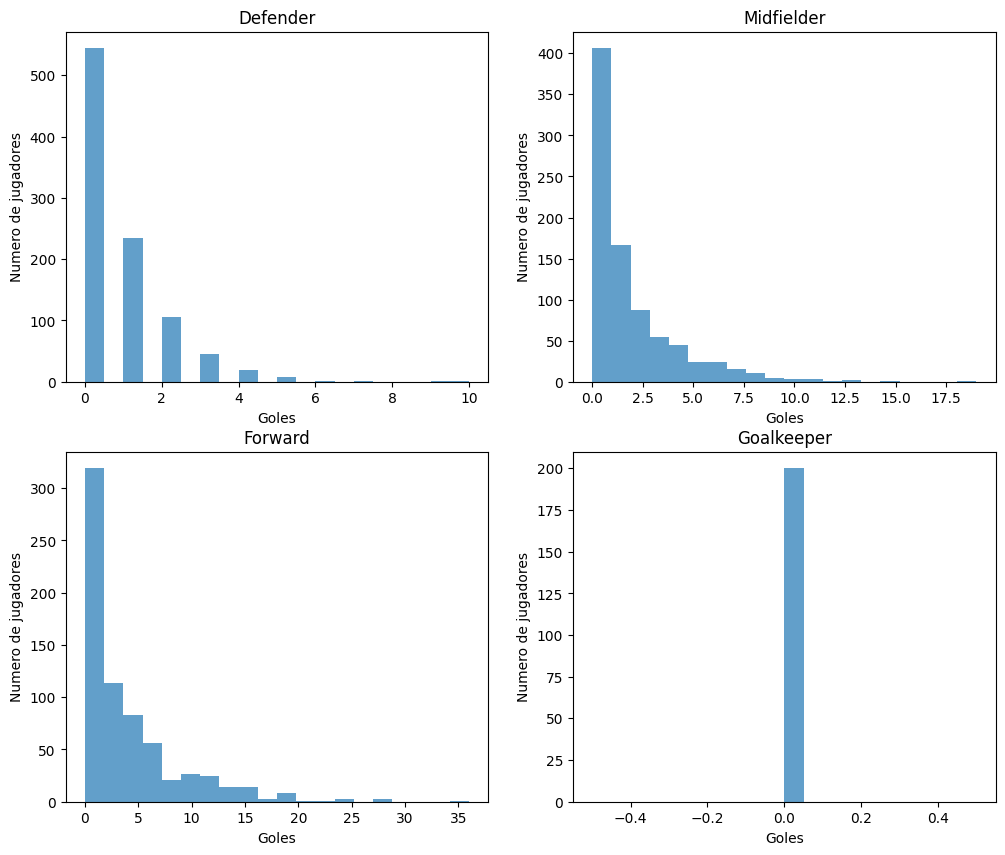

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axes = axes.flatten()

for i, position in enumerate(df_players['position'].unique()):
    ax = axes[i]

    df_players.loc[df_players['position'] == position, 'goals'].plot.hist(ax=ax, bins=20, alpha=0.7)
    
    ax.set_title(position)
    ax.set_xlabel('Goles')
    ax.set_ylabel('Numero de jugadores')

plt.show()


In [135]:
df_forwards = df_players[df_players['position'] == 'Forward']
df_forwards

player   nation position           team formation  \
3      Keyliane Abdallah   fr FRA  Forward      Marseille   4-2-3-1   
8         Matthis Abline   fr FRA  Forward         Nantes   4-2-3-1   
12         Tammy Abraham  eng ENG  Forward           Roma   3-4-2-1   
17    Bénie Adama Traore   ci CIV  Forward         Nantes   4-2-3-1   
18            Akor Adams   ng NGA  Forward    Montpellier     4-3-3   
...                  ...      ...      ...            ...       ...   
2833       Edon Zhegrova   xk KVX  Forward          Lille     4-4-2   
2838      Joshua Zirkzee   nl NED  Forward        Bologna   4-2-3-1   
2840        Simon Zoller   de GER  Forward         Bochum     4-4-2   
2847      Lovro Zvonarek   hr CRO  Forward  Bayern Munich   4-2-3-1   
2850         Milan Đurić   ba BIH  Forward          Monza   3-4-2-1   

      team_shots_per_game  team_possession  team_pass  team_aerials_won  \
3                    10.0             52.4       82.0              14.9   
8                    10.8             45.2       77.0              18.1   
12                   14.3             51.5       84.5              12.1   
17                   10.8             45.2       77.0              18.1   
18                   12.2             46.4       78.8              17.9   
...                   ...              ...        ...               ...   
2833                 12.8             52.6       83.5              15.8   
2838                 13.1             50.7       81.5              15.1   
2840                  7.0             41.8       73.4              20.4   
2847                 17.1             58.1       85.5              12.9   
2850                 10.1             47.4       82.4              18.1   

             league  ...  yellow_cards red_cards  expected_goals  \
3        fr Ligue 1  ...             0         0             0.0   
8        fr Ligue 1  ...             1         0             3.8   
12       it Serie A  ...             1         0             0.6   
17       fr Ligue 1  ...             1         1             0.7   
18       fr Ligue 1  ...             2         0            12.4   
...             ...  ...           ...       ...             ...   
2833     fr Ligue 1  ...             3         1             6.2   
2838     it Serie A  ...             8         0             9.0   
2840  de Bundesliga  ...             0         0             0.0   
2847  de Bundesliga  ...             0         0             0.1   
2850     it Serie A  ...             2         0             3.0   

      expected_assists  progressive_carries  progressive_passes  \
3                  0.0                  0.0                 0.0   
8                  2.0                 28.0                20.0   
12                 0.1                  6.0                 4.0   
17                 0.9                 23.0                15.0   
18                 1.9                 40.0                17.0   
...                ...                  ...                 ...   
2833               6.2                110.0                90.0   
2838               5.2                 53.0                86.0   
2840               0.0                  0.0                 0.0   
2847               0.2                  7.0                 7.0   
2850               0.7                  2.0                 8.0   

      progressive_runs  goals_90min  assists_90min  goals_assists_90min  
3                  0.0         0.00           0.00                 0.00  
8                 87.0         0.43           0.00                 0.43  
12                15.0         0.37           0.00                 0.37  
17                45.0         0.00           0.18                 0.18  
18               127.0         0.32           0.04                 0.36  
...                ...          ...            ...                  ...  
2833             322.0         0.24           0.24                 0.47  
2838             182.0         0.36           0.13

Posición y asistencias: los que más asisten también son los delanteros, pero casi igual que los mediocentros. Son las dos pocisiones más importantes para las asistencias. Tras ellos, los defensas promedian menos asistencias y los porteros suelen ser 0, pero hay un valor que ha subido la media. De ello inferimos, que aunque es raro, los porteros también pueden llegar a marcar algún gol

In [136]:
assists_by_position = df_players[['assists', 'position']].groupby(by='position').mean().sort_values(by='assists', ascending=False)
assists_by_position


assists
position            
Forward     1.692641
Midfielder  1.505300
Defender    0.938606
Goalkeeper  0.045000

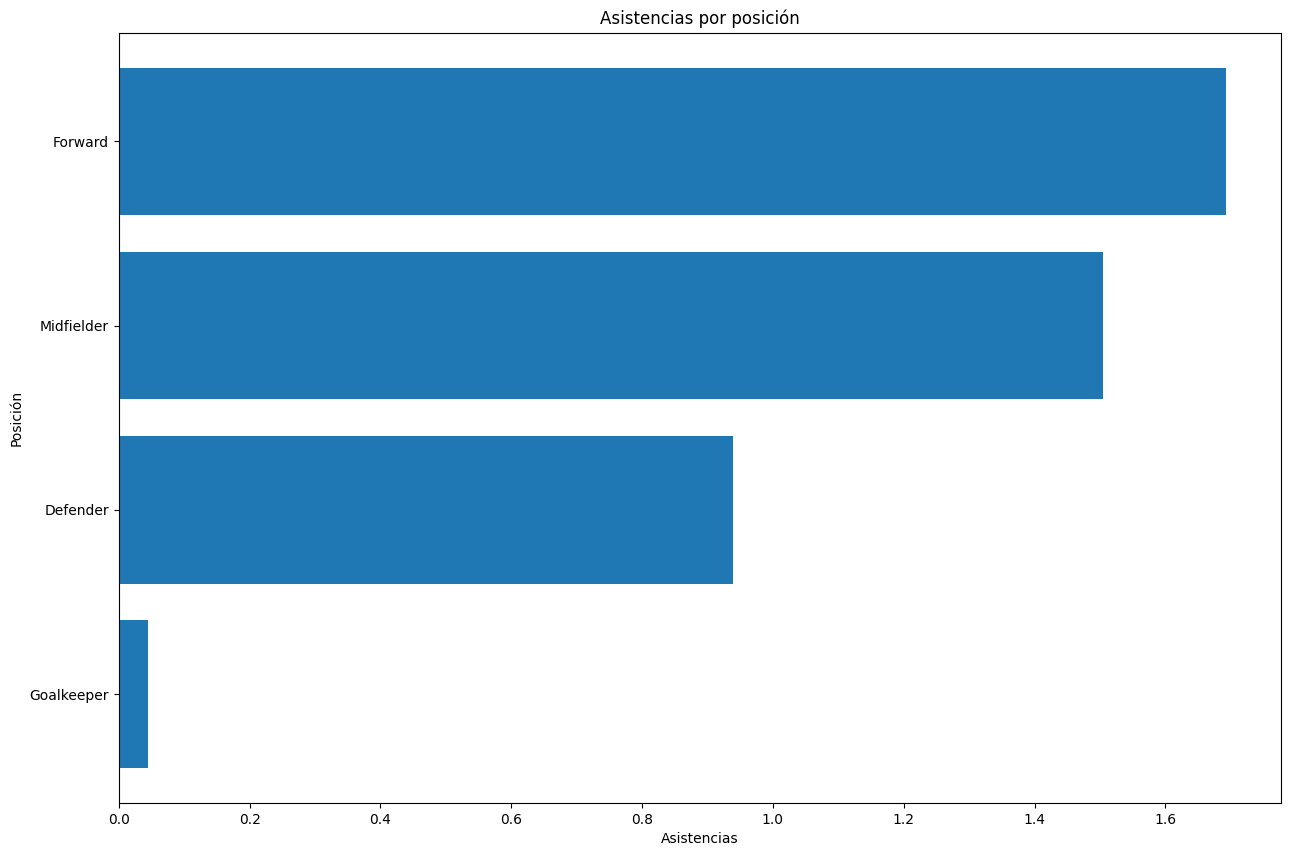

In [137]:
plt.figure(figsize=(15,10))
assists_by_position = assists_by_position.sort_values(by='assists', ascending=True)
plt.barh(assists_by_position.index, assists_by_position['assists'])
plt.xlabel('Asistencias')
plt.ylabel('Posición')
plt.title('Asistencias por posición')
plt.show()

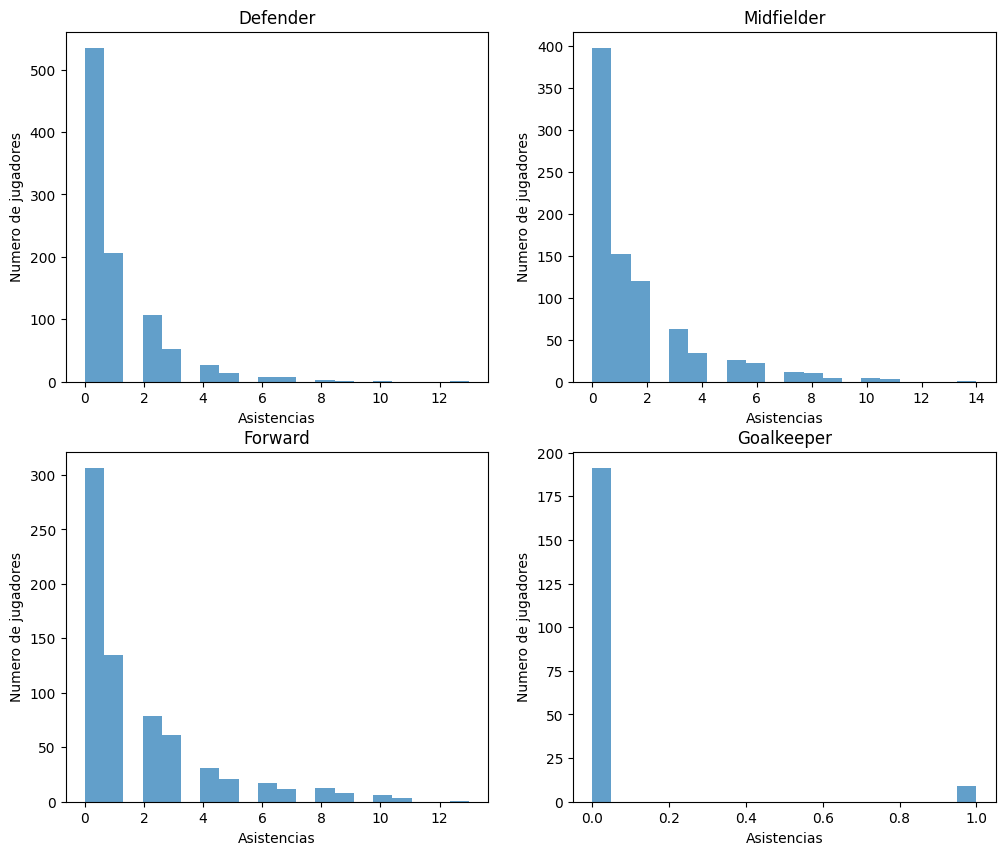

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axes = axes.flatten()

for i, position in enumerate(df_players['position'].unique()):
    ax = axes[i]

    df_players.loc[df_players['position'] == position, 'assists'].plot.hist(ax=ax, bins=20, alpha=0.7)
    
    ax.set_title(position)
    ax.set_xlabel('Asistencias')
    ax.set_ylabel('Numero de jugadores')

plt.show()

Gráfica comparativa de goles y asistencias por posición:

Los defensas, centrocampistas y porterors promedian unos valores de goles y asistencias muy parecidos entre cada estadistica, mientras que los delanteros marcan muchos más goles que asistencias, aunque sus estadísiticas de asistencias son muy altas también

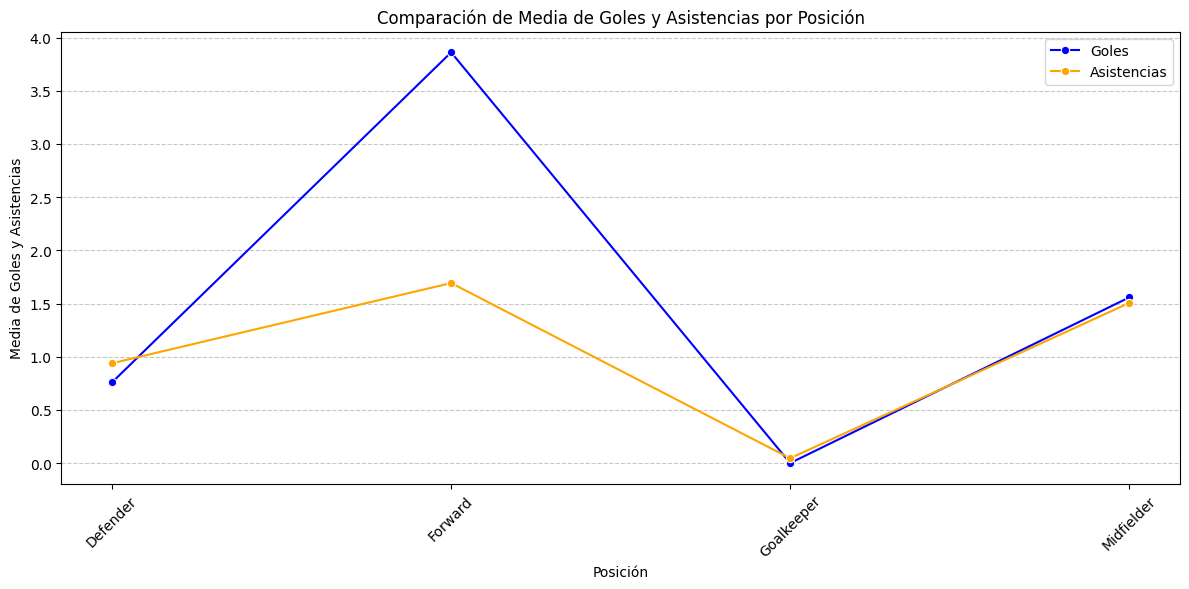

In [139]:
mean_goals_position = df_players.groupby('position')['goals'].mean()
mean_assists_position = df_players.groupby('position')['assists'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_goals_position.index, y=mean_goals_position.values, marker='o', label='Goles', color='blue')
sns.lineplot(x=mean_assists_position.index, y=mean_assists_position.values, marker='o', label='Asistencias', color='orange')
plt.title('Comparación de Media de Goles y Asistencias por Posición')
plt.xlabel('Posición')
plt.ylabel('Media de Goles y Asistencias')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


En el caso de las tarjetas, los defensas son los que más reciben, seguido de los mediocentros. Esto puede indicar que una de sus tareas principales es distribuir o contener el juego en el mediocentro. Los delanteros tienen menos, pero también entran en situaciones de juego más agresivas, promediando 1,97 tarjetas. Los porteros, en este caso, promedian más alto, ya que en una situación de mano a mano quizás tengan que recurrir a hacer falta para no encjaar un gol.

In [140]:
yellowcards_by_position = df_players[['yellow_cards', 'position']].groupby(by='position').mean()
yellowcards_by_position

yellow_cards
position                
Defender        3.262227
Forward         1.969697
Goalkeeper      1.050000
Midfielder      3.091873

In [141]:
for position in df_players['position'].unique():
    print(f'{position}: {df_players.loc[df_players['position'] == position, 'yellow_cards'].mean(): .2f} tarjetas amarillas')

Defender:  3.26 tarjetas amarillas
Midfielder:  3.09 tarjetas amarillas
Forward:  1.97 tarjetas amarillas
Goalkeeper:  1.05 tarjetas amarillas


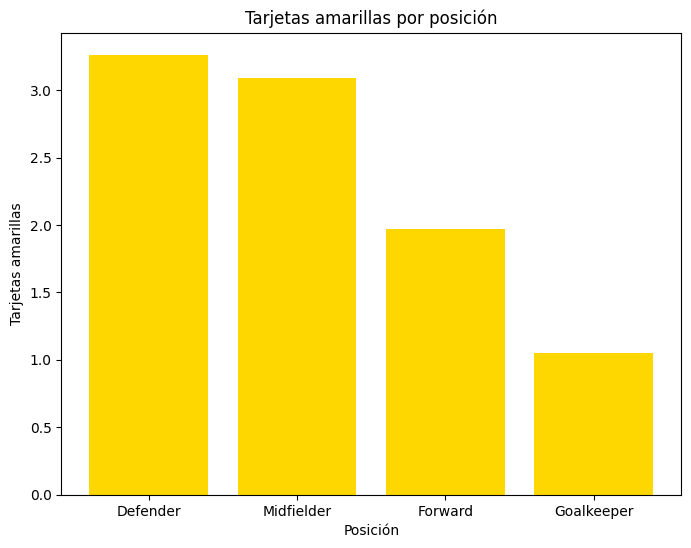

In [142]:
plt.figure(figsize=(8,6))
yellowcards_by_position = yellowcards_by_position.sort_values(by='yellow_cards', ascending=False)
plt.bar(yellowcards_by_position.index, yellowcards_by_position['yellow_cards'], color='gold')
plt.xlabel('Posición')
plt.ylabel('Tarjetas amarillas')
plt.title('Tarjetas amarillas por posición')
plt.show()

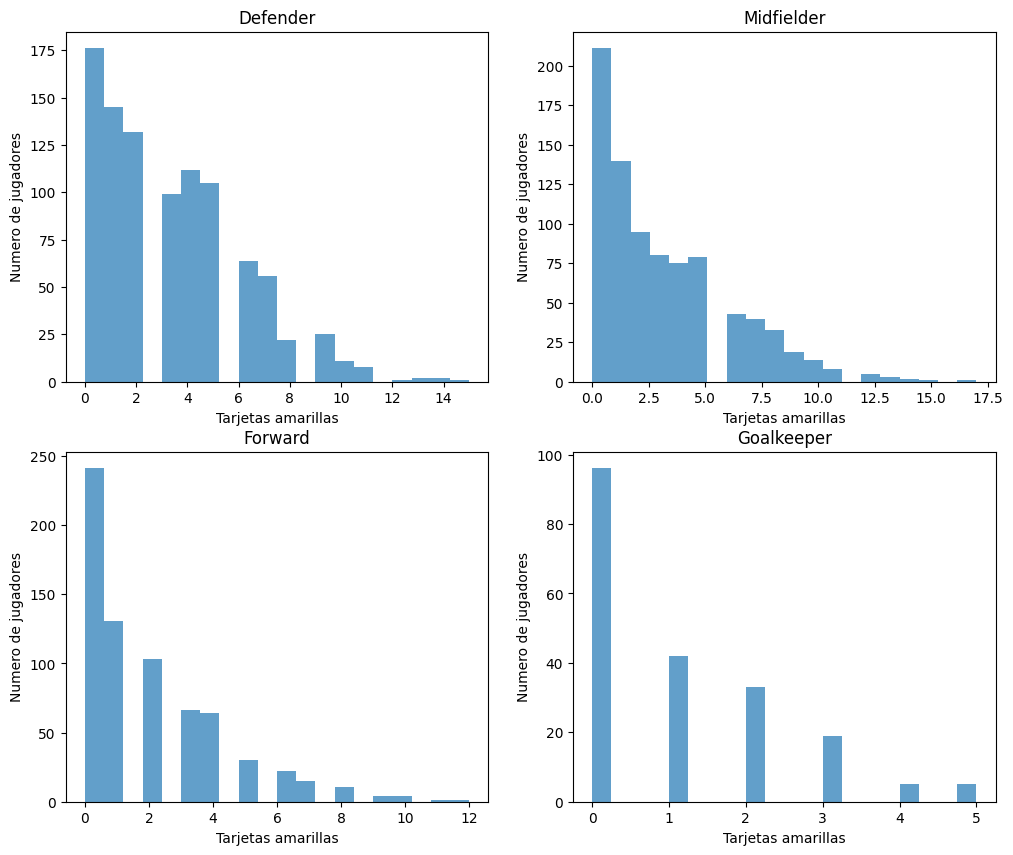

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axes = axes.flatten()

for i, position in enumerate(df_players['position'].unique()):
    ax = axes[i]

    df_players.loc[df_players['position'] == position, 'yellow_cards'].plot.hist(ax=ax, bins=20, alpha=0.7)
    
    ax.set_title(position)
    ax.set_xlabel('Tarjetas amarillas')
    ax.set_ylabel('Numero de jugadores')

plt.show()

In [144]:
redcards_by_position = df_players[['red_cards', 'position']].groupby(by='position').mean()
redcards_by_position.T

position   Defender  Forward  Goalkeeper  Midfielder
red_cards  0.168574  0.08658        0.06    0.110718

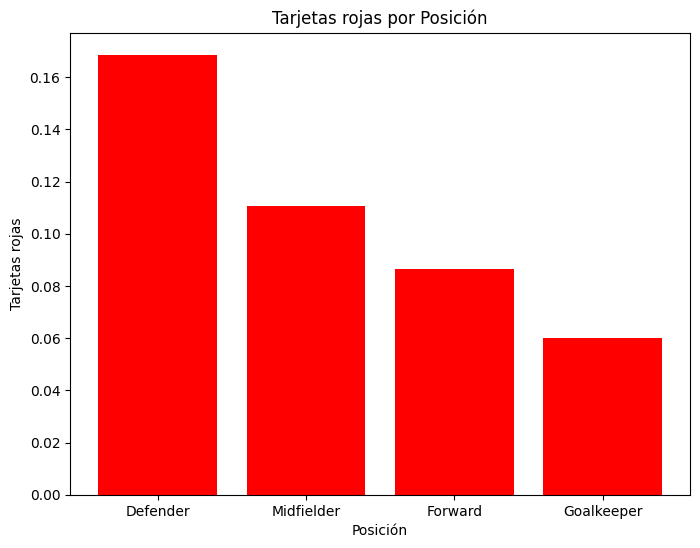

In [145]:
plt.figure(figsize=(8,6))
redcards_by_position = redcards_by_position.sort_values(by='red_cards', ascending=False)
plt.bar(redcards_by_position.index, redcards_by_position['red_cards'], color='red')
plt.xlabel('Posición')
plt.ylabel('Tarjetas rojas')
plt.title('Tarjetas rojas por Posición')
plt.show()

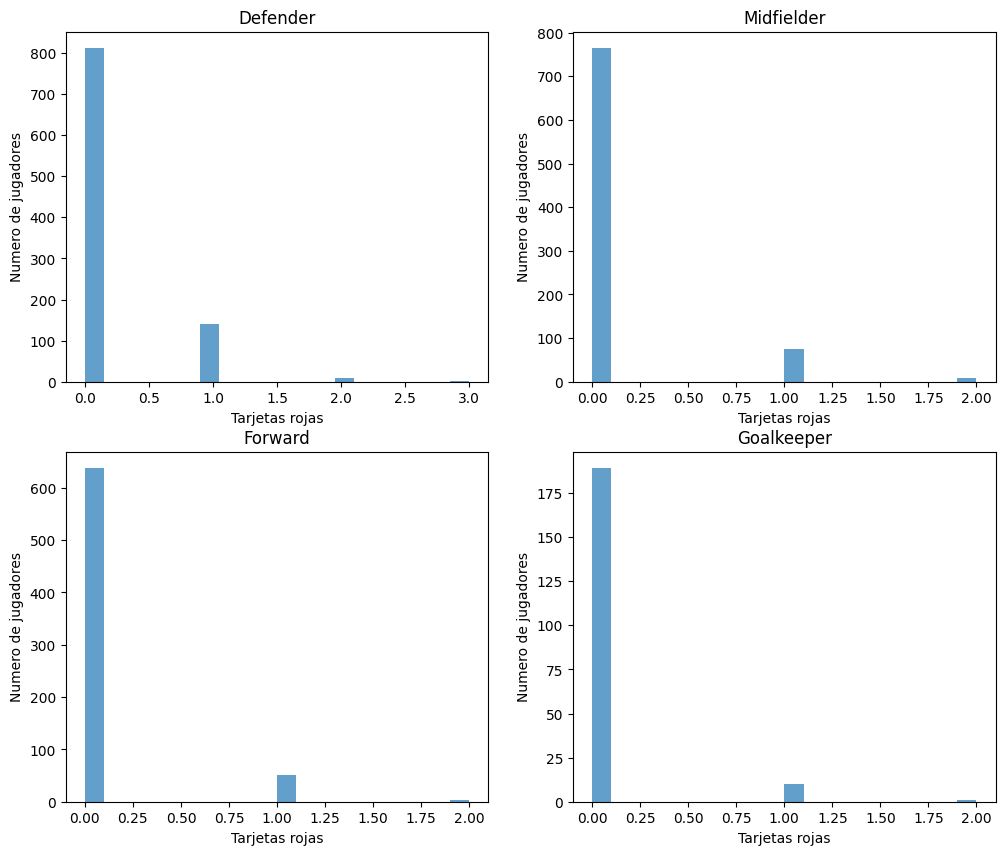

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axes = axes.flatten()

for i, position in enumerate(df_players['position'].unique()):
    ax = axes[i]

    df_players.loc[df_players['position'] == position, 'red_cards'].plot.hist(ax=ax, bins=20, alpha=0.7)
    
    ax.set_title(position)
    ax.set_xlabel('Tarjetas rojas')
    ax.set_ylabel('Numero de jugadores')

plt.show()

Gráfica comparativa de la media de tarjetas amarillas y rojas por posición

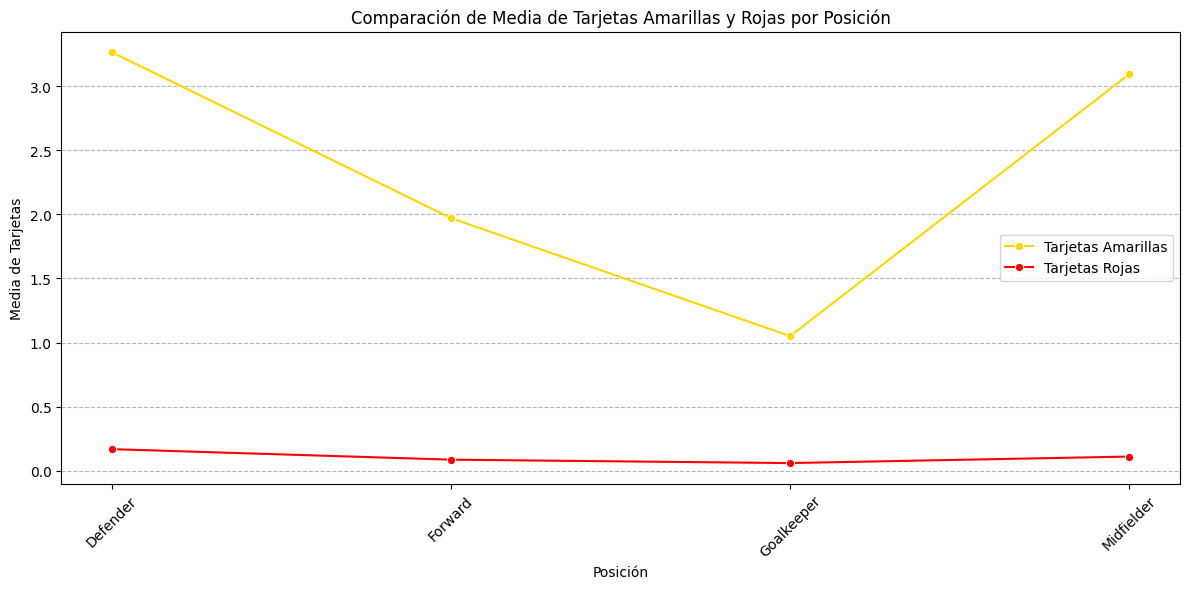

In [147]:
mean_yellow_cards_position = df_players.groupby('position')['yellow_cards'].mean()
mean_red_cards_position = df_players.groupby('position')['red_cards'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_yellow_cards_position.index, y=mean_yellow_cards_position.values, marker='o', label='Tarjetas Amarillas', color='gold')
sns.lineplot(x=mean_red_cards_position.index, y=mean_red_cards_position.values, marker='o', label='Tarjetas Rojas', color='red')
plt.title('Comparación de Media de Tarjetas Amarillas y Rojas por Posición')
plt.xlabel('Posición')
plt.ylabel('Media de Tarjetas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.legend()
plt.tight_layout()
plt.show()


ESTADISTICA POR LIGA

In [148]:
df_players.groupby('league').agg({'age': ['mean', 'std', 'min', 'max'], 
                           'matches': ['mean', 'std', 'min', 'max'], 
                           'minutes': ['mean', 'std', 'min', 'max'],
                           'goals': ['mean', 'std', 'min', 'max'],
                           'assists': ['mean', 'std', 'min', 'max'],
                           'yellow_cards': ['mean', 'std', 'min', 'max'],
                           'red_cards': ['mean', 'std', 'min', 'max'],
                           'progressive_passes': ['mean', 'std', 'min', 'max']
                           })

age                      matches                     \
                         mean       std min max       mean        std min max   
league                                                                          
de Bundesliga       25.257085  4.405038  16  39  18.993927  10.664816   1  34   
eng Premier League  25.015009  4.551270  15  38  20.058161  11.882665   1  38   
es La Liga          25.819728  4.862486  16  40  19.841837  12.020021   1  38   
fr Ligue 1          23.967118  4.616377  15  39  17.779497  10.722257   1  34   
it Serie A          25.334501  4.482541  15  40  19.954466  11.947606   1  38   

                        minutes               ... yellow_cards     red_cards  \
                           mean          std  ...          min max      mean   
league                                        ...                              
de Bundesliga       1204.781377   918.996578  ...            0  15  0.109312   
eng Premier League  1340.585366  1033.745091  ...            0  13  0.097561   
es La Liga          1256.292517   973.112731  ...            0  17  0.151361   
fr Ligue 1          1146.802708   904.239547  ...            0  13  0.139265   
it Serie A          1265.598949   982.094235  ...            0  15  0.106830   

                                     progressive_passes                         
                         std min max               mean        std  min    max  
league                                                                          
de Bundesliga       0.349143   0   3          47.287449  49.782879  0.0  392.0  
eng Premier League  0.315415   0   2          52.018762  56.431671  0.0  344.0  
es La Liga          0.394875   0   2          47.243197  52.021130  0.0  296.0  
fr Ligue 1          0.383711   0   3          47.715667  51.394794  0.0  286.0  
it Serie A          0.331089   0   2          46.028021  50.231806  0.0  304.0  

[5 rows x 32 columns]

<Figure size 1200x800 with 0 Axes>

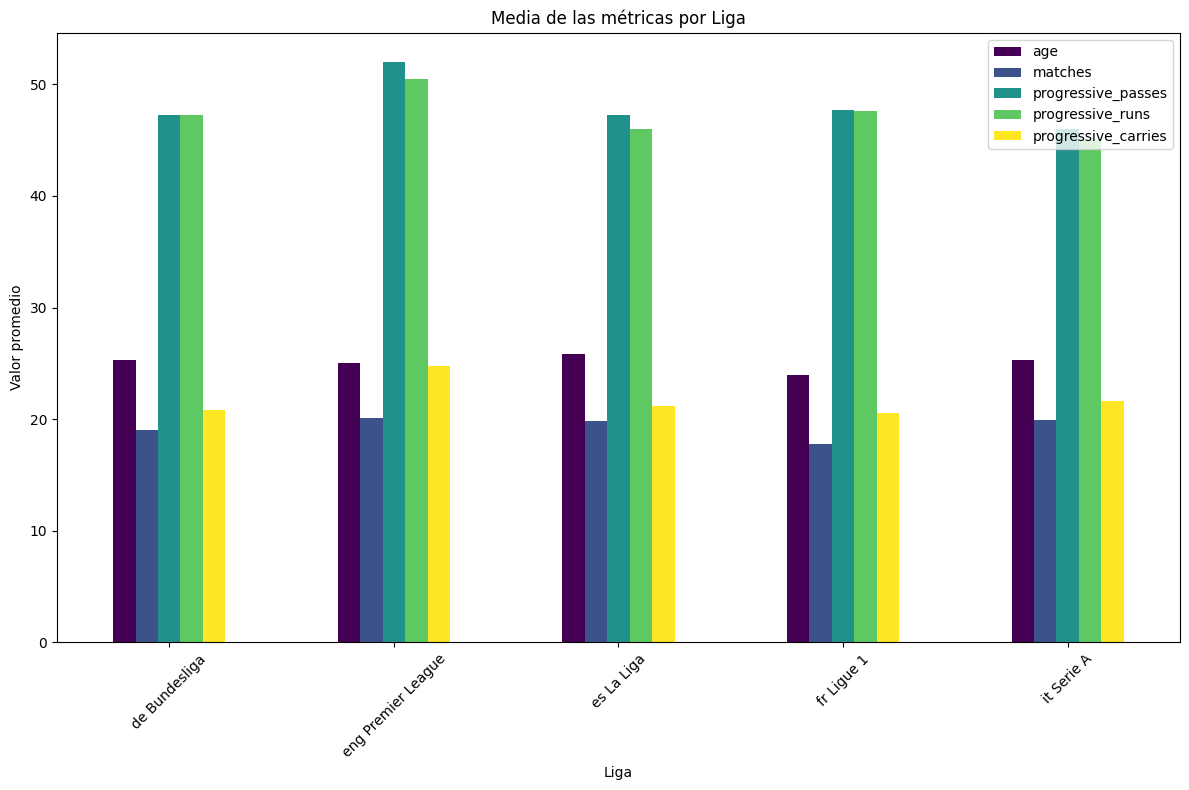

In [149]:
agg_df = df_players.groupby('league').agg({'age': 'mean',
                                            'matches': 'mean',
                                            'progressive_passes': 'mean',
                                            'progressive_runs': 'mean',
                                            'progressive_carries': 'mean',}).reset_index()

plt.figure(figsize=(12, 8))
agg_df.set_index('league').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Media de las métricas por Liga')
plt.ylabel('Valor promedio')
plt.xlabel('Liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

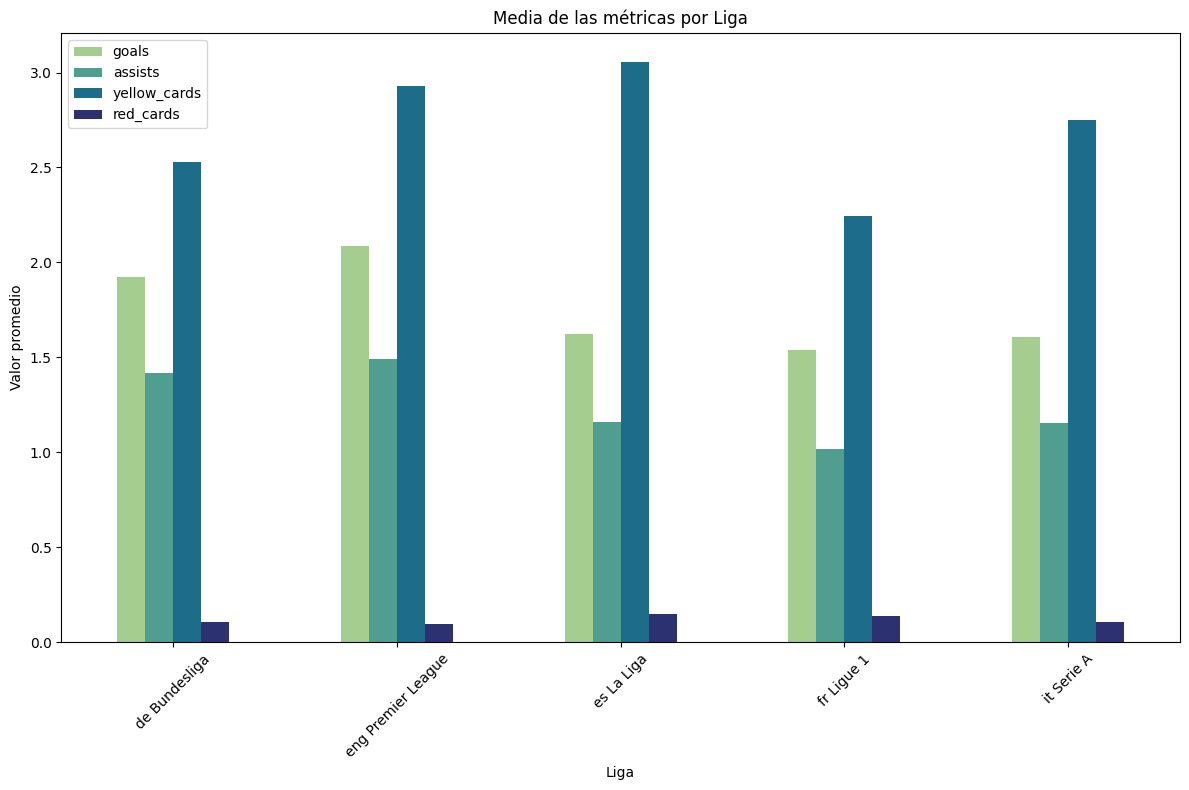

In [150]:
agg_df2 = df_players.groupby('league').agg({'goals': 'mean',
                                            'assists': 'mean',
                                            'yellow_cards': 'mean',
                                            'red_cards': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))
agg_df2.set_index('league').plot(kind='bar', figsize=(12, 8), colormap='crest')
plt.title('Media de las métricas por Liga')
plt.ylabel('Valor promedio')
plt.xlabel('Liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La Premier League (Inglaterra) es la liga con mejores estadísiticas progresivas (pases, conducciones y carreras progresivas), más goles y más asistencias en promedio. La Liga (España) tiene el promedio de edad más alto y la mayor cantidad de tarjetas amarillas y rojas. La Ligue 1 (Francia) es la liga con el promedio de edad más baja, menos goles, menos asistencias y menos tarjetas amarillas.

ESTADISTICAS POR EQUIPO

In [151]:
variables = ['assists', 'goals', 'matches', 'minutes', 'yellow_cards', 'red_cards',
              'progressive_passes', 'team_shots_per_game', 'team_possession','team_pass']

In [152]:
for team in df_players['team'].unique():
    print(f'{team}:')
    for var in variables:
        mean_value = df_players.loc[df_players['team'] == team, var].mean()
        print(f'  {var}: {mean_value: .2f}')

Bournemouth:
  assists:  1.37
  goals:  1.85
  matches:  20.89
  minutes:  1375.85
  yellow_cards:  2.85
  red_cards:  0.11
  progressive_passes:  48.11
  team_shots_per_game:  13.00
  team_possession:  46.00
  team_pass:  79.10
Union Berlin:
  assists:  0.77
  goals:  1.10
  matches:  18.03
  minutes:  1113.33
  yellow_cards:  2.23
  red_cards:  0.23
  progressive_passes:  38.20
  team_shots_per_game:  11.70
  team_possession:  45.90
  team_pass:  76.20
Eintracht Frankfurt:
  assists:  1.06
  goals:  1.41
  matches:  15.82
  minutes:  987.12
  yellow_cards:  2.06
  red_cards:  0.15
  progressive_passes:  38.38
  team_shots_per_game:  13.20
  team_possession:  52.40
  team_pass:  79.60
Marseille:
  assists:  1.00
  goals:  1.61
  matches:  15.65
  minutes:  1037.58
  yellow_cards:  1.90
  red_cards:  0.16
  progressive_passes:  49.61
  team_shots_per_game:  10.00
  team_possession:  52.40
  team_pass:  82.00
Reims:
  assists:  1.00
  goals:  1.39
  matches:  18.32
  minutes:  1149.64
 

In [153]:
arsenal_stats = df_players[df_players['team'] == 'Arsenal'][variables].mean()

print(f"Estadísticas de Arsenal:")
for var in arsenal_stats.index:
    print(f"{var}: {arsenal_stats[var]:.2f}")

Estadísticas de Arsenal:
assists: 2.48
goals: 3.44
matches: 22.88
minutes: 1503.52
yellow_cards: 2.56
red_cards: 0.08
progressive_passes: 84.24
team_shots_per_game: 12.10
team_possession: 52.70
team_pass: 85.00


In [154]:
inter_stats = df_players[df_players['team'] == 'Inter'][variables].mean()

print(f"Estadísticas de Inter de Milán:")
for var in inter_stats.index:
    print(f"{var}: {inter_stats[var]:.2f}")

Estadísticas de Inter de Milán:
assists: 2.31
goals: 3.35
matches: 23.35
minutes: 1446.69
yellow_cards: 1.77
red_cards: 0.04
progressive_passes: 62.31
team_shots_per_game: 14.50
team_possession: 52.00
team_pass: 87.00


In [155]:
realmadrid_stats = df_players[df_players['team'] == 'Real Madrid'][variables].mean()

print(f"Estadísticas del Real Madrid:")
for var in realmadrid_stats.index:
    print(f"{var}: {realmadrid_stats[var]:.2f}")

Estadísticas del Real Madrid:
assists: 2.44
goals: 3.15
matches: 21.56
minutes: 1391.85
yellow_cards: 2.56
red_cards: 0.15
progressive_passes: 71.67
team_shots_per_game: 14.40
team_possession: 57.70
team_pass: 87.70


Creamos un dataframe para tener todas las estadísitcas por equipo y qeu así sea más fácil de ver y filtrar

In [156]:
team_stats = df_players.groupby('team')[variables].agg(['mean', 'std', 'min', 'max'])
team_stats

assists                       goals                \
                             mean       std min max      mean       std min   
team                                                                          
AC Milan                 1.666667  2.483277   0   9  2.242424  3.758576   0   
Almería                  0.781250  1.518369   0   5  1.250000  2.184993   0   
Arsenal                  2.480000  3.070288   0  10  3.440000  4.592385   0   
Aston Villa              1.896552  3.298753   0  13  2.448276  4.213806   0   
Atalanta                 1.965517  2.542254   0   8  2.482759  3.915361   0   
...                           ...       ...  ..  ..       ...       ...  ..   
Villarreal               1.468750  2.862261   0  14  2.000000  4.406740   0   
Werder Bremen            1.137931  2.310290   0   9  1.551724  2.543707   0   
West Ham                 1.772727  2.671397   0   7  2.636364  3.982646   0   
Wolfsburg                0.962963  1.720498   0   7  1.481481  2.391819   0   
Wolverhampton Wanderers  1.458333  2.570386   0   9  1.791667  3.374832   0   

                               matches             ... team_shots_per_game  \
                        max       mean        std  ...                 min   
team                                               ...                       
AC Milan                 15  17.333333  12.861441  ...                14.7   
Almería                   9  17.562500  11.376086  ...                 8.1   
Arsenal                  16  22.880000  13.080902  ...                12.1   
Aston Villa              19  19.275862  13.807080  ...                13.7   
Atalanta                 12  20.896552  12.407788  ...                16.3   
...                      ..        ...        ...  ...                 ...   
Villarreal               23  18.625000  10.903536  ...                10.7   
Werder Bremen            12  18.103448  11.824142  ...                10.6   
West Ham                 16  22.136364  12.472047  ...                12.3   
Wolfsburg                11  19.111111  10.437850  ...                14.1   
Wolverhampton Wanderers  12  22.041667  12.824837  ...                12.2   

                              team_possession                  team_pass       \
                          max            mean  std   min   max      mean  std   
team                                                                            
AC Milan                 14.7            51.4  0.0  51.4  51.4      84.0  0.0   
Almería                   8.1            44.1  0.0  44.1  44.1      77.1  0.0   
Arsenal                  12.1            52.7  0.0  52.7  52.7      85.0  0.0   
Aston Villa              13.7            49.1  0.0  49.1  49.1      78.6  0.0   
Atalanta                 16.3            53.5  0.0  53.5  53.5      83.5  0.0   
...                       ...             ...  ...   ...   ...       ...  ...   
Villarreal               10.7            54.3  0.0  54.3  54.3      84.4  0.0   
Werder Bremen            10.6            45.2  0.0  45.2  45.2      76.2  0.0   
West Ham                 12.3            44.5  0.0  44.5  44.5      77.8  0.0   
Wolfsburg                14.1            51.0  0.0  51.0  51.0      78.0  0.0   
Wolverhampton Wanderers  12.2            49.7  0.0  49.7  49.7      83.2  0.0   

                                     
                          min   max  
team                                 
AC Milan                 84.0  84.0  
Almería                  77.1  77.1  
Arsenal                  85.0  85.0  
Aston Villa              78.6  78.6  
Atalanta                 83.5  83.5  
...                       ...   ...  
Villarreal               84.4  84.4  
Werder Bremen            76.2  76.2  
West Ham                 77.8  77.8  
Wolfsburg                78.0  78.0  
Wolverhampton Wanderers  83.2  83.2  

[96 rows x 40 columns]

In [157]:
top_possession_teams = df_players.groupby('team')['team_possession'].mean().sort_values(ascending=False).head(10)
print("Top 5 equipos con mayor posesión:")
print(top_possession_teams)

Top 5 equipos con mayor posesión:
team
Barcelona              62.4
Manchester City        60.8
Paris Saint-Germain    60.1
Liverpool              59.0
Girona                 58.9
Sevilla                58.7
Chelsea                58.6
Sassuolo               58.2
Bayern Munich          58.1
Real Madrid            57.7
Name: team_possession, dtype: float64


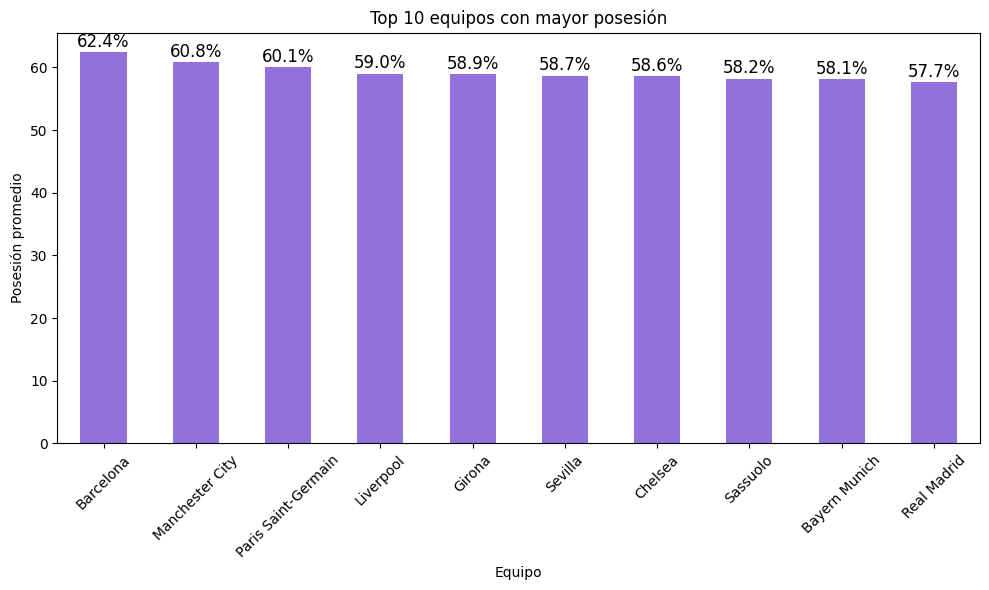

In [158]:
top_possession_teams = df_players.groupby('team')['team_possession'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = top_possession_teams.plot(kind='bar', color='mediumpurple')

for i, v in enumerate(top_possession_teams):
    ax.text(i, v + 0.2, f'{v:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Top 10 equipos con mayor posesión')
plt.xlabel('Equipo')
plt.ylabel('Posesión promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [159]:
top_shotspg_teams = df_players.groupby('team')['team_shots_per_game'].mean().sort_values(ascending=False).head(10)
print("Top 5 equipos con mayor posesión:")
print(top_shotspg_teams)

Top 5 equipos con mayor posesión:
team
Bayern Munich          17.1
Napoli                 17.0
Atalanta               16.3
Lyon                   16.1
Liverpool              16.0
RB Leipzig             16.0
Manchester City        15.8
Juventus               15.7
Barcelona              15.3
Paris Saint-Germain    15.0
Name: team_shots_per_game, dtype: float64


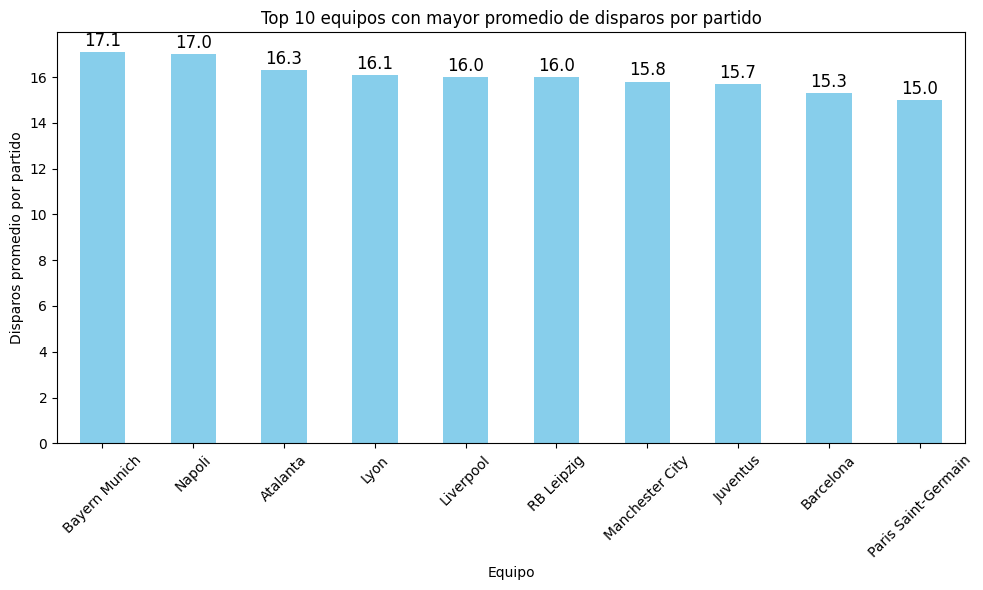

In [160]:
top_possession_teams = df_players.groupby('team')['team_shots_per_game'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = top_possession_teams.plot(kind='bar', color='skyblue')

for i, v in enumerate(top_possession_teams):
    ax.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=12)

plt.title('Top 10 equipos con mayor promedio de disparos por partido')
plt.xlabel('Equipo')
plt.ylabel('Disparos promedio por partido')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
top_pass_teams = df_players.groupby('team')['team_pass'].mean().sort_values(ascending=False).head(10)
print("Top 5 equipos con mayor posesión:")
print(top_pass_teams)

Top 5 equipos con mayor posesión:
team
Barcelona              89.7
Paris Saint-Germain    89.5
Manchester City        89.4
Girona                 88.7
Juventus               88.3
Sassuolo               87.8
Real Madrid            87.7
Chelsea                87.0
Inter                  87.0
Napoli                 87.0
Name: team_pass, dtype: float64


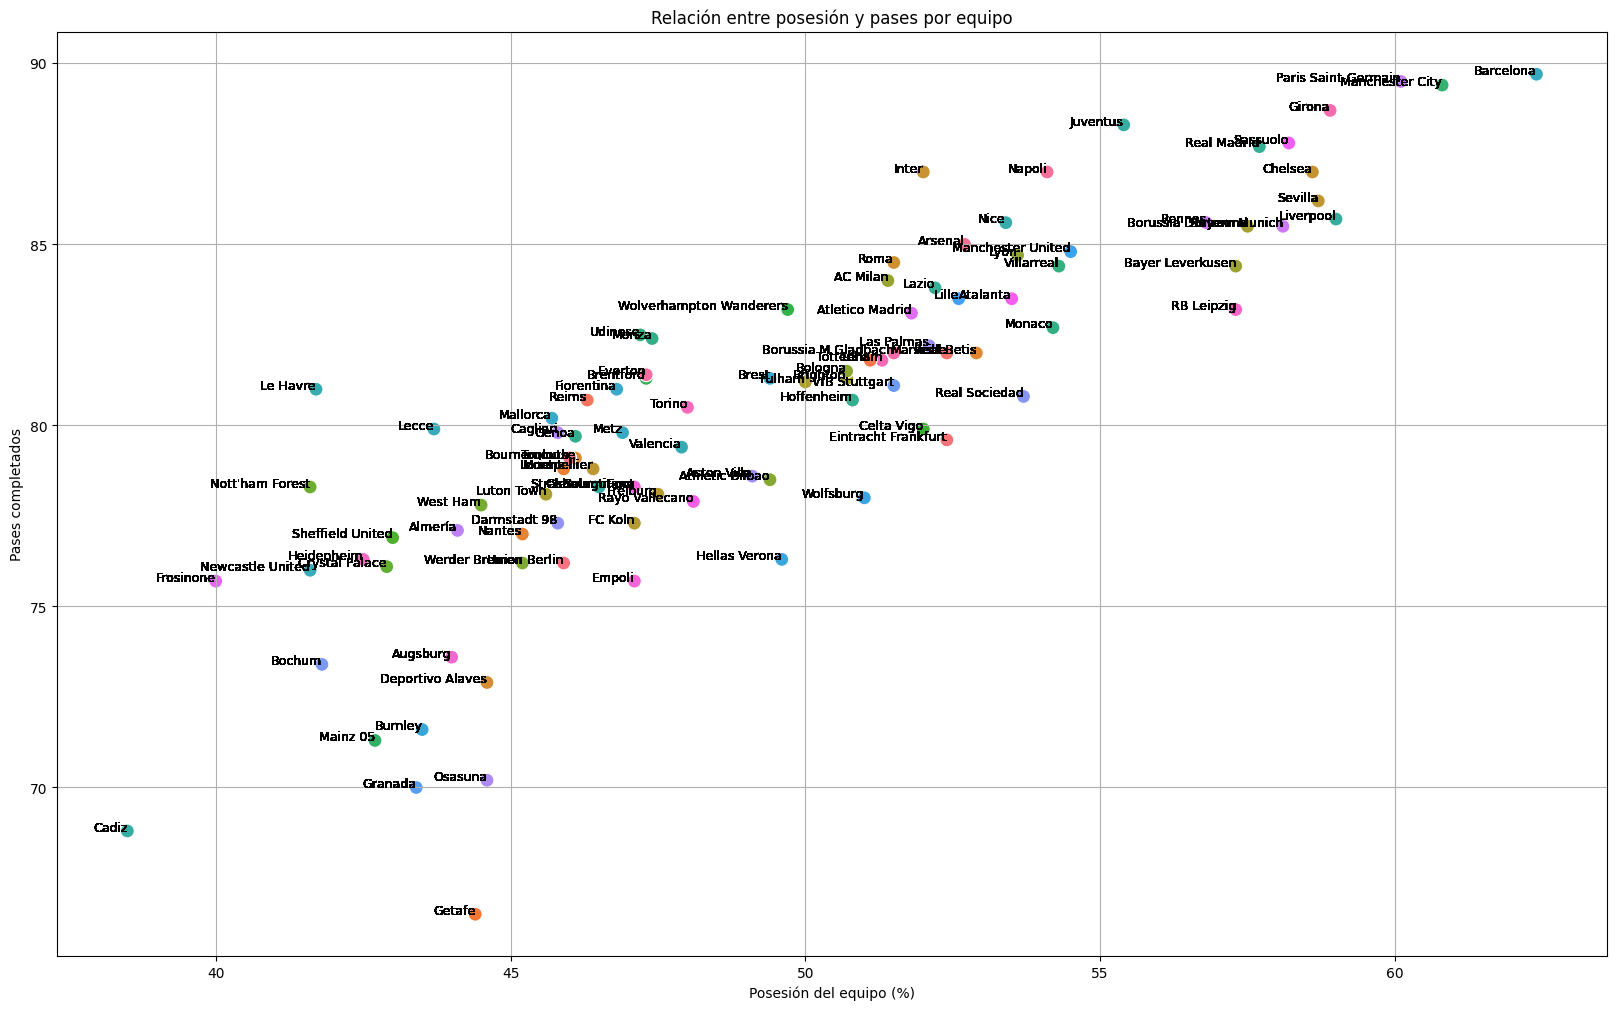

In [162]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=df_players['team_possession'], y=df_players['team_pass'], hue=df_players['team'], s=100, legend=False)  

for i, row in df_players.iterrows():
    plt.text(row['team_possession'], row['team_pass'], row['team'], fontsize=9, ha='right')

plt.xlabel('Posesión del equipo (%)')
plt.ylabel('Pases completados')
plt.title('Relación entre posesión y pases por equipo')

plt.grid(True)
plt.show()

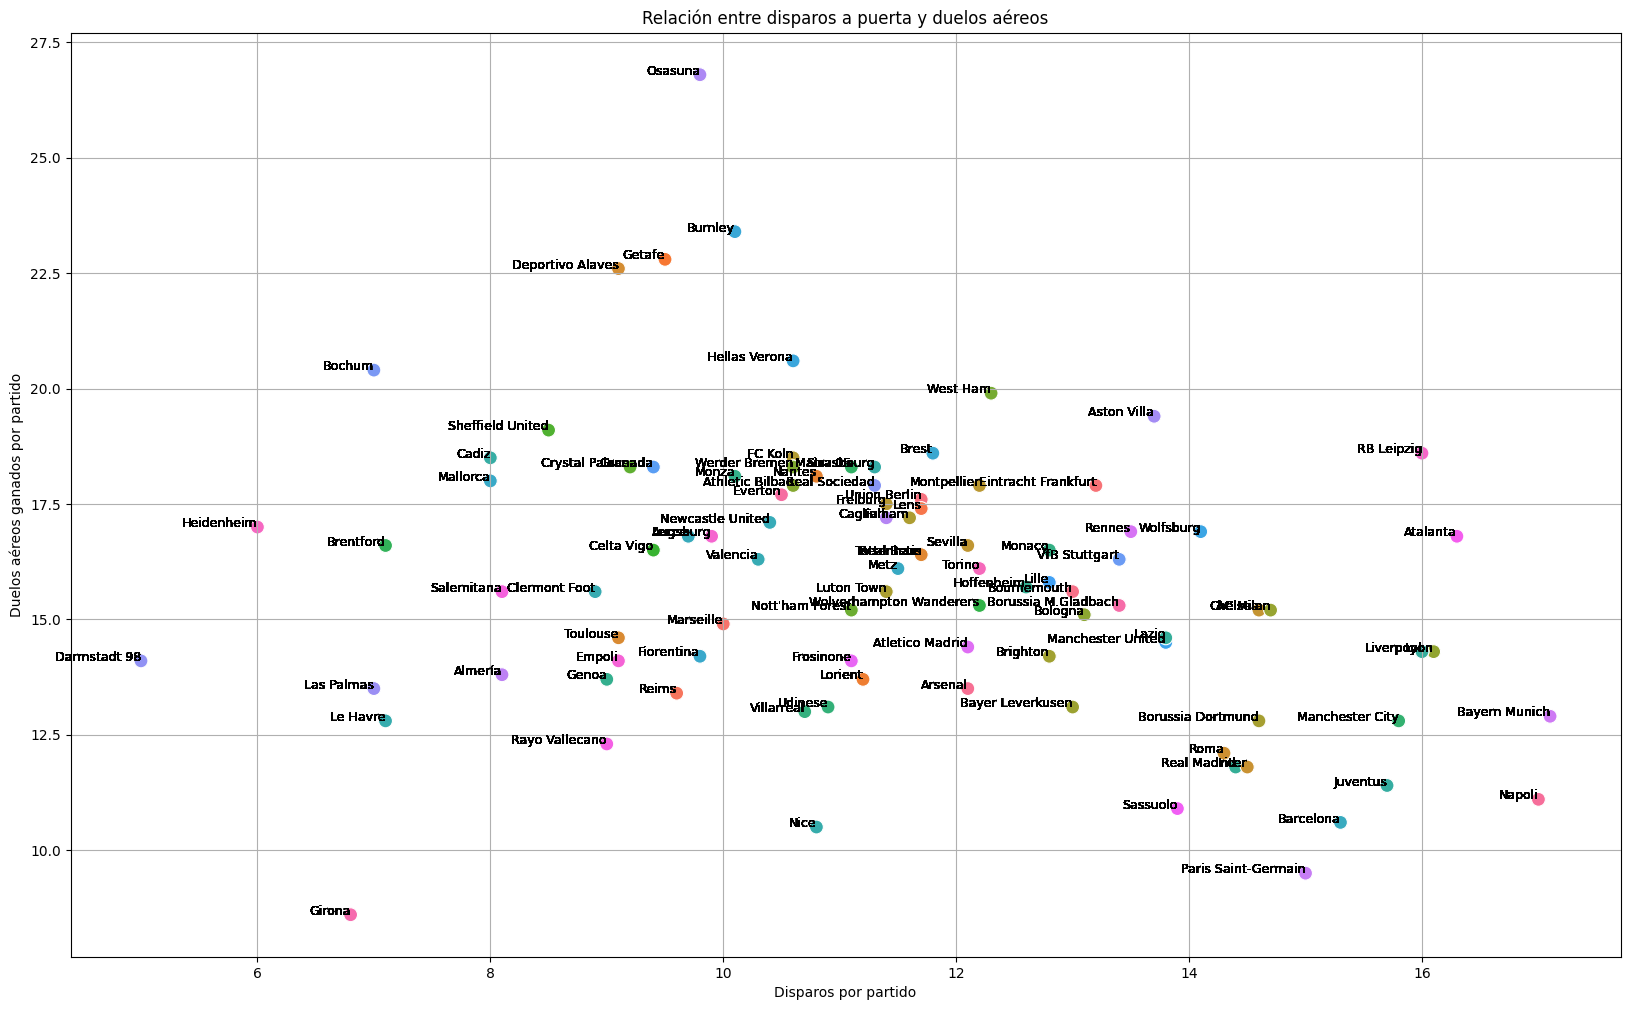

In [163]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=df_players['team_shots_per_game'], y=df_players['team_aerials_won'], hue=df_players['team'], s=100, legend=False)  

for i, row in df_players.iterrows():
    plt.text(row['team_shots_per_game'], row['team_aerials_won'], row['team'], fontsize=9, ha='right')

plt.xlabel('Disparos por partido')
plt.ylabel('Duelos aéreos ganados por partido')
plt.title('Relación entre disparos a puerta y duelos aéreos')

plt.grid(True)
plt.show()

___ 
Minutos jugados por edad:

El rango de edad entre 21 años y 37 años es el más estable y con más minutos jugados en promedio. Antes de los 20 años la media de minutos es bastante más baja, y tras los 38 años también

In [164]:
minutes_by_age = df_players[['age', 'minutes']].groupby(by='age').mean()
minutes_by_age.T

age             15       16          17          18          19          20  \
minutes  49.666667  520.125  224.882353  317.482014  553.741007  868.380952   

age               21           22           23           24  ...           31  \
minutes  1223.288136  1236.984536  1334.985981  1474.720812  ...  1432.627451   

age               32           33           34           35           36  \
minutes  1382.835165  1365.083333  1352.317073  1212.533333  1313.105263   

age           37      38           39     40  
minutes  1217.75  2095.6  1050.333333  329.0  

[1 rows x 26 columns]

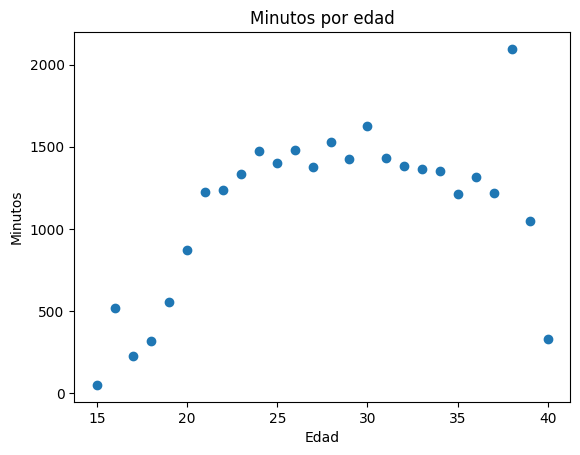

In [165]:
plt.scatter(minutes_by_age.index, minutes_by_age['minutes'])
plt.xlabel('Edad')
plt.ylabel('Minutos')
plt.title('Minutos por edad')
plt.show()

Minutos jugados por media de goles

In [166]:
minutes_goals = df_players[['minutes', 'goals']].groupby(by='goals').mean()
minutes_goals.T

goals            0            1            2            3            4   \
minutes  844.067735  1353.716298  1627.763265  1699.654321  1837.641509   

goals             5            6            7          8       9   ...  \
minutes  1826.383562  1868.471698  1998.204545  2233.0625  2074.2  ...   

goals          16           17      18           19      21      23  \
minutes  2559.625  2663.666667  2311.5  2769.428571  2255.0  2489.0   

goals             24      27      28      36  
minutes  2646.666667  2355.0  2208.0  2839.0  

[1 rows x 26 columns]

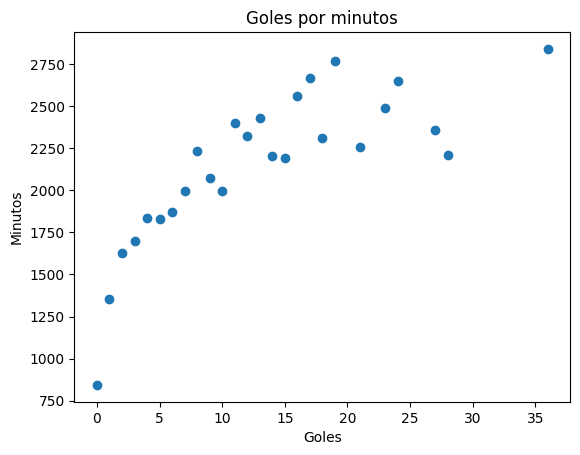

In [167]:
plt.scatter(minutes_goals.index, minutes_goals['minutes'])
plt.xlabel('Goles')
plt.ylabel('Minutos')
plt.title('Goles por minutos')
plt.show()

Asistencias medias por goles

In [168]:
goals_assists = df_players[['goals', 'assists']].groupby(by='goals').mean()
goals_assists.T

goals          0         1         2        3         4         5         6   \
assists  0.446468  1.072435  1.546939  2.08642  2.462264  2.849315  2.830189   

goals          7       8     9   ...     16        17    18        19   21  \
assists  3.159091  4.8125  4.55  ...  4.375  6.666667  10.0  6.285714  2.0   

goals     23   24   27   28   36  
assists  6.0  6.0  6.0  3.0  8.0  

[1 rows x 26 columns]

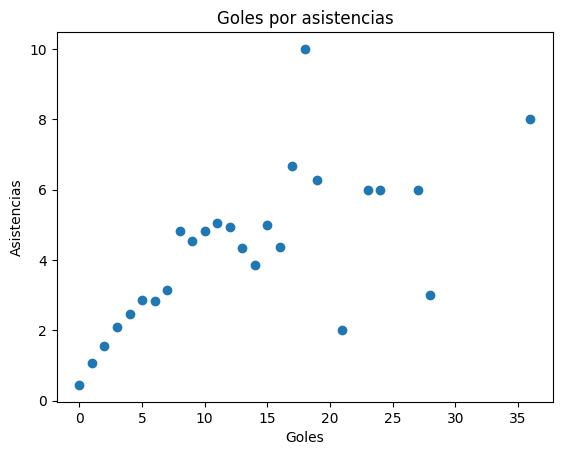

In [169]:
plt.scatter(goals_assists.index, goals_assists['assists'])
plt.xlabel('Goles')
plt.ylabel('Asistencias')
plt.title('Goles por asistencias')
plt.show()

Goles por edad:

Los goles por edad presentan una forma parecida a los minutos (y de hecho tendrían relación "a más minutos, más goles de promedio") y entre los 20 años y los 35 años es cuando más promedian. Los más jóvenes promedian menos goles y los más veteranos, aunque algunos promedian más, tenemos pocos registros y pueden cambiar la media, ya que sabemos que son outliers.

In [170]:
goals_age = df_players[['age', 'goals']].groupby(by='age').mean()
goals_age.T

age     15     16        17        18        19       20        21        22  \
goals  0.0  0.625  0.333333  0.546763  0.676259  1.44898  1.485876  1.984536   

age          23        24  ...        31        32    33       34   35  \
goals  2.280374  2.238579  ...  1.892157  1.846154  1.45  2.04878  0.9   

age          36        37   38        39   40  
goals  2.421053  0.666667  0.6  0.333333  0.0  

[1 rows x 26 columns]

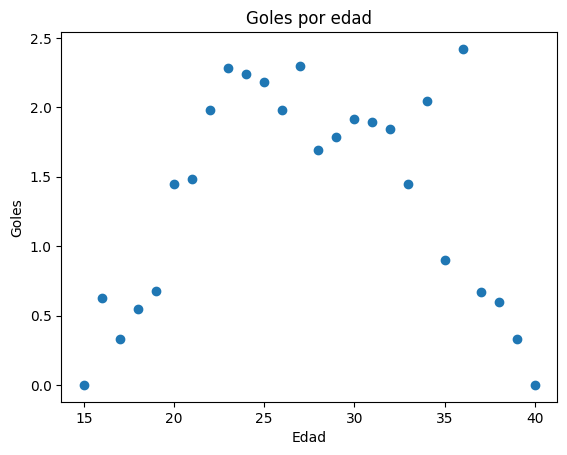

In [171]:
plt.scatter(goals_age.index, goals_age['goals'])
plt.xlabel('Edad')
plt.ylabel('Goles')
plt.title('Goles por edad')
plt.show()

In [172]:
assists_age = df_players[['age', 'assists']].groupby(by='age').mean()
assists_age.T

age       15     16       17        18        19        20        21  \
assists  0.0  0.875  0.27451  0.294964  0.546763  1.061224  1.237288   

age            22        23        24  ...        31        32        33  \
assists  1.469072  1.401869  1.609137  ...  1.421569  1.340659  1.083333   

age            34        35        36        37   38        39   40  
assists  1.634146  0.833333  1.263158  1.083333  0.2  0.333333  0.0  

[1 rows x 26 columns]

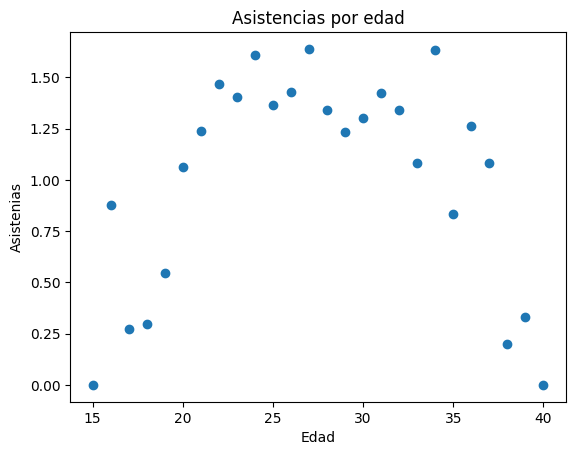

In [173]:
plt.scatter(assists_age.index, assists_age['assists'])
plt.xlabel('Edad')
plt.ylabel('Asistenias')
plt.title('Asistencias por edad')
plt.show()

Comparativa de goles y asistencias por edad

En casi todas las edades, los jugadores tiene más promedio de goles que de asistencias

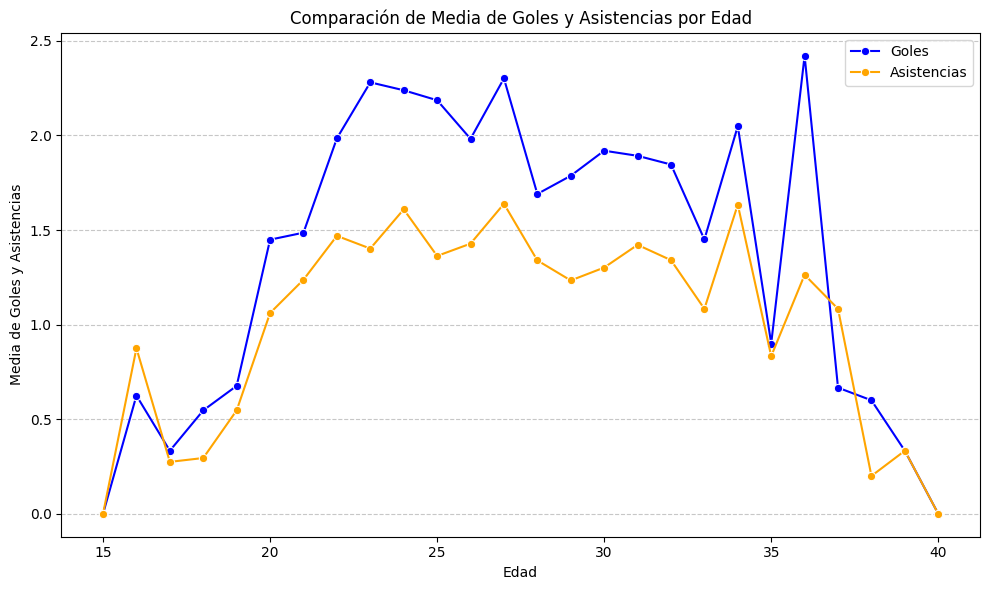

In [174]:
mean_goals_age = df_players.groupby('age')['goals'].mean()
mean_assists_age = df_players.groupby('age')['assists'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_goals_age.index, y=mean_goals_age.values, marker='o', label='Goles', color='blue')
sns.lineplot(x=mean_assists_age.index, y=mean_assists_age.values, marker='o', label='Asistencias', color='orange')
plt.title('Comparación de Media de Goles y Asistencias por Edad')
plt.xlabel('Edad')
plt.ylabel('Media de Goles y Asistencias')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Relación Goals y Expected Goals

Encontramos los 20 mejores jugadores por estadística entre goles y goles esperados, teniendo en cuanta la distancia en valor absoluto entre las dos métricas. Les llamamos goals_overperformers

In [175]:
goals_overperformers = df_players.loc[(df_players['goals'] - df_players['expected_goals']).abs().nlargest(20).index]
goals_overperformers[['player', 'goals', 'expected_goals']]

player  goals  expected_goals
2542      Alexander Sørloth     23            12.3
885              Phil Foden     19            10.3
265         Jude Bellingham     19            11.1
1412    Alexandre Lacazette     19            11.4
1064        Serhou Guirassy     28            20.8
1643       Lautaro Martínez     24            17.6
2414         Benjamin Šeško     14             7.7
1084             Robin Hack     10             3.9
1430             Cyle Larin      3             9.0
1690          Kylian Mbappé     27            21.0
180              Alex Baena      2             7.9
430   Dominic Calvert-Lewin      7            12.9
719             Eren Dinkçi     10             4.3
1367       Teun Koopmeiners     12             6.5
2373      Gianluca Scamacca     12             6.5
1297             Harry Kane     36            30.6
1925           Darwin Núñez     11            16.3
1164     Callum Hudson-Odoi      8             2.7
817       Youssef En-Nesyri     16            10.8
1659   Jean-Philippe Mateta     16            10.9

Encontrar los 20 peores jugadores por estadística entre goles y goles esperados. Les llamamos goals_underperformers

In [176]:
goals_underperformers = df_players.loc[df_players['goals'] < df_players['expected_goals']]
goals_underperformers = goals_underperformers.loc[(goals_underperformers['expected_goals'] - goals_underperformers['goals']).nlargest(20).index]

goals_underperformers[['player', 'goals', 'expected_goals']]

player  goals  expected_goals
1430                  Cyle Larin      3             9.0
180                   Alex Baena      2             7.9
430        Dominic Calvert-Lewin      7            12.9
1925                Darwin Núñez     11            16.3
2184                 Chris Ramos      5            10.1
2321               Roland Sallai      3             7.9
1335                        Kiké      3             7.7
1206             Nicolas Jackson     14            18.6
1391             Nikola Krstović      7            11.6
18                    Akor Adams      8            12.4
2332            Antonio Sanabria      5             9.3
519                 Rayan Cherki      1             5.2
202              Folarin Balogun      7            11.0
706                    Luis Díaz      8            11.9
1881                   Dan Ndoye      1             4.9
2114               Luca Pfeiffer      1             4.6
156    Pierre-Emerick Aubameyang     17            20.5
1843                Vedat Muriqi      7            10.4
2812  Andre-Frank Zambo Anguissa      0             3.4
47               Ludovic Ajorque      2             5.3

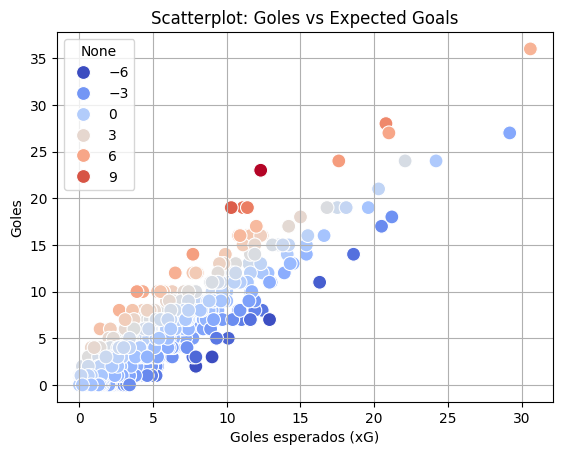

In [177]:
sns.scatterplot(
    x=df_players['expected_goals'],
    y=df_players['goals'],
    hue=df_players['goals'] - df_players['expected_goals'],
    palette='coolwarm',
    s=100
)

plt.xlabel('Goles esperados (xG)')
plt.ylabel('Goles')
plt.title('Scatterplot: Goles vs Expected Goals')
plt.grid(True)
plt.show()

Comparativa Goles y Goles esperados por Edad

Observamos como, por lo general, los goles y goles esperados son bastante parecidos en todas las edades

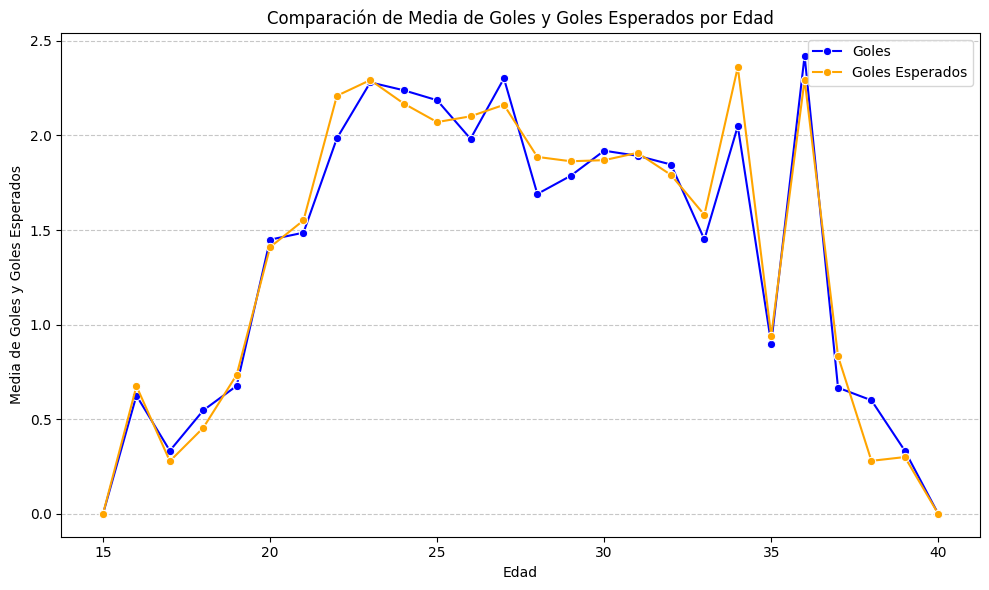

In [178]:
mean_goals_age = df_players.groupby('age')['goals'].mean()
mean_expected_goals_age = df_players.groupby('age')['expected_goals'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_goals_age.index, y=mean_goals_age.values, marker='o', label='Goles', color='blue')
sns.lineplot(x=mean_expected_goals_age.index, y=mean_expected_goals_age.values, marker='o', label='Goles Esperados', color='orange')
plt.title('Comparación de Media de Goles y Goles Esperados por Edad')
plt.xlabel('Edad')
plt.ylabel('Media de Goles y Goles Esperados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Relación Assists y Expected assists

In [179]:
overperformers_assists = df_players.loc[(df_players['assists'] - df_players['expected_assists']).abs().nlargest(10).index]
overperformers_assists[['player', 'assists', 'expected_assists']]

player  assists  expected_assists
2746      Ollie Watkins       13               7.3
298    Jan-Niklas Beste       11               5.7
2768      Nico Williams       11               5.7
672   Ermedin Demirović        9               3.9
918     Niclas Füllkrug        8               3.1
180          Alex Baena       14               9.2
786        Paulo Dybala        9               4.3
1398   Dejan Kulusevski        3               7.7
1888         Pedro Neto        9               4.4
1201          Junya Ito        7              11.5

In [180]:
underperformers_assists = df_players.loc[(df_players['assists'] - df_players['expected_assists']).nsmallest(10).index]
underperformers_assists[['player', 'assists', 'expected_assists']]

player  assists  expected_assists
1398    Dejan Kulusevski        3               7.7
1201           Junya Ito        7              11.5
523      Federico Chiesa        2               6.2
861      Bruno Fernandes        8              11.8
2540  Dominik Szoboszlai        2               5.8
2004          Remi Oudin        2               5.7
1064     Serhou Guirassy        3               6.6
2485        Matìas Soulé        3               6.6
2324     Lazar Samardzic        2               5.5
2245    Andrew Robertson        2               5.4

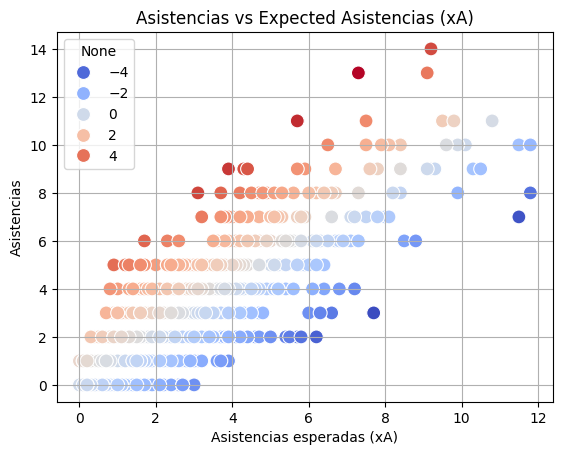

In [181]:
sns.scatterplot(
    x=df_players['expected_assists'],
    y=df_players['assists'],
    hue=df_players['assists'] - df_players['expected_assists'],
    palette='coolwarm',
    s=100
)

plt.xlabel('Asistencias esperadas (xA)')
plt.ylabel('Asistencias')
plt.title('Asistencias vs Expected Asistencias (xA)')
plt.grid(True)
plt.show()


Comparativa de Asistencias y asistencias esperadas por edad

Sigue habiendo una relación muy alta entre asistencias y asistencias esperadas por edades, sólo desctacan los 34 años donde hay un rendimiento más bajo en asistencias de lo esperado. Quizás aquí empiece atener que ver la edad de los jugadores y su bajada de rendimiento, ya que los siguientes años tienen muy pocos registros para tomarlos tan en cuenta como el resto de edades.

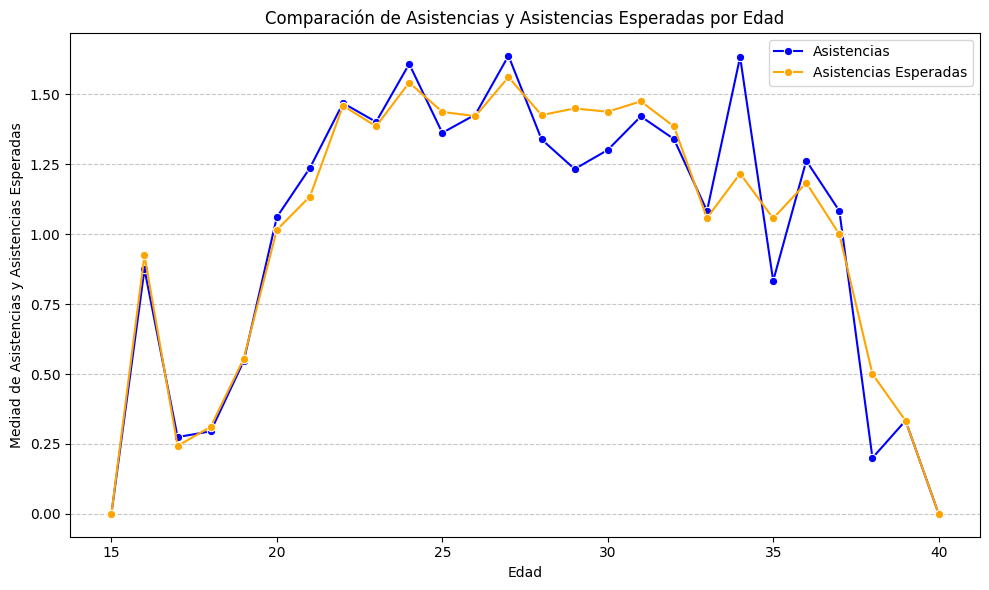

In [182]:
mean_assists_age = df_players.groupby('age')['assists'].mean()
mean_expected_assists_age = df_players.groupby('age')['expected_assists'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_assists_age.index, y=mean_assists_age.values, marker='o', label='Asistencias', color='blue')
sns.lineplot(x=mean_expected_assists_age.index, y=mean_expected_assists_age.values, marker='o', label='Asistencias Esperadas', color='orange')
plt.title('Comparación de Asistencias y Asistencias Esperadas por Edad')
plt.xlabel('Edad')
plt.ylabel('Mediad de Asistencias y Asistencias Esperadas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


#### CONCLUSIONES DEL ANÁLISIS:

Los futbolistas entre 20 y 30 años acumulan la mayor cantidad de minutos jugados, con un declive progresivo después de los 34-35 años. La distribución de minutos jugados nos indica que hay una alta concentración de jugadores suplentes que tienen poca participación en el equipo y por tanto poco aporte al mismo. A su vez, el tiempo de juego está directamente relacionado con el rendimiento ofensivo, mientras que, como hemos visto, la edad no es un factor tan determinante.

Ofensivamente, vemos que tanto los goles como las asistencias presentan una distribución desigual, con un pequeño grupo de jugadores que contribuye de manera sobresaliente y una mayoría con registros bajos o incluso sin aporte. La relación entre goles y asistencias nos muestra que no siempre los jugadores que marcan goles son los mismos que generan asistencias, sino que hay otras variables como la posición más importantes.

En cuanto a las posiciones de los jugadores, los delanteros lideran en goles y asistencias, mientras que los mediocampistas tienen una contribución más equilibrada, tanto a estas dos estadísticas como a las acciones progresivas, que aportan más a la construcción y dominio del juego y la posesión. Los defensores y porteros destacan en aspectos defensivos y en el número de tarjetas recibidas.

En las ligas vemos cambios significativos. La Premier League muestra mayor dinamismo ofensivo, mientras que La Liga tiene jugadores de mayor edad y más sancionados con tarjetas amarillas y rojas. La Ligue 1 de Francia es la liga con menor promedio de goles, asistencias y tarjetas.

Gracias a este análisis podemos determinar que el rendimiento de los futbolistas está condicionado por múltiples factores, siendo el tiempo de juego el más influyente en casi todas las estadísticas y sobre todo en la faceta ofensiva. Aunque la edad no tiene un impacto muy grande en el desempeño, sí se percibe un descenso gradual a partir de los 34-35 años. La posición en el campo y la liga en la que se compite también juegan un papel muy importante en el desempeño y estadísiticas individuales. El análisis nos revela que un pequeño porcentaje de jugadores tiene un impacto enorme en métricas clave como goles, asistencias, pases progresivos o conducciones progresivas, lo que sugiere que estos jugadores conforman los mejores perfiles de futbolistas, muy por encima del resto.

____
## MODELOS

ANÁLISIS DE SIMILITUD ENTRE JUGADORES CON COSIN SIMILARITY: Según sus estadísiticas

Esta métrica evalúa la similitud de dirección de los vectores, dejando las magnitudes en un segundo plano. Es decir, que si proporcionalmente son similares, les dará similitud, independientemente de la magnitud que estamos midiendo. En esta métrica, cuanto más cercano es el valor a 1 más similitud tienen los futbolistas.

In [183]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [184]:
features = ['goals', 'assists', 'goals_assists', 'penalty_goals', 'expected_goals', 'expected_assists',
              'progressive_carries', 'progressive_passes', 'progressive_runs', 'goals_90min',
              'assists_90min', 'goals_assists_90min']

In [185]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_players[features])

In [186]:
similarity_matrix = cosine_similarity(scaled_features)
similarity_df = pd.DataFrame(similarity_matrix, index=df_players['player'], columns=df_players['player'])

In [187]:
player_name = 'Kylian Mbappé'
similarity_to_player = similarity_df.loc[player_name]

similar_players = similarity_to_player.sort_values(ascending=False).drop(player_name)

print(f"Jugadores más parecidos a {player_name}:\n")
print(similar_players.head(10))

Jugadores más parecidos a Kylian Mbappé:

player
Georges Mikautadze           0.981284
Antoine Griezmann            0.979076
Robert Lewandowski           0.972587
Albert Guðmundsson           0.972455
Pierre-Emerick Aubameyang    0.971328
Alexander Isak               0.966611
Riccardo Orsolini            0.966463
Mikel Oyarzabal              0.966427
Victor Boniface              0.963726
Joshua Zirkzee               0.963209
Name: Kylian Mbappé, dtype: float64


In [188]:
player_name = 'Rúben Dias'
similarity_to_player = similarity_df.loc[player_name]

similar_players = similarity_to_player.sort_values(ascending=False).drop(player_name)

print(f"Jugadores más parecidos a {player_name}:\n")
print(similar_players.head(10))

Jugadores más parecidos a Rúben Dias:

player
Yves Bissouma         0.992446
Gian Marco Ferrari    0.986647
Dayot Upamecano       0.983832
Danilo Pereira        0.981898
Jan Paul van Hecke    0.978157
Bernardo              0.976614
Óscar Valentín        0.976194
Kevin Danso           0.972307
Ezri Konsa            0.969989
Ylber Ramadani        0.966491
Name: Rúben Dias, dtype: float64


In [189]:
player_name = 'Bukayo Saka'
similarity_to_player = similarity_df.loc[player_name]

similar_players = similarity_to_player.sort_values(ascending=False).drop(player_name)

print(f"Jugadores más parecidos a {player_name}:\n")
print(similar_players.head(10))

Jugadores más parecidos a Bukayo Saka:

player
Bryan Mbeumo           0.974166
Luis Rioja             0.965386
Florian Sotoca         0.961018
Mohamed Salah          0.960970
Mason Greenwood        0.956647
Joshua Zirkzee         0.952294
Lovro Majer            0.946280
Romain Del Castillo    0.946040
João Pedro             0.944751
Albert Guðmundsson     0.940687
Name: Bukayo Saka, dtype: float64


In [190]:
player_name = 'Toni Kroos'
similarity_to_player = similarity_df.loc[player_name]

similar_players = similarity_to_player.sort_values(ascending=False).drop(player_name)

print(f"Jugadores más parecidos a {player_name}:\n")
print(similar_players.head(10))

Jugadores más parecidos a Toni Kroos:

player
Angelo Stiller      0.963392
Aleix García        0.963285
Tom Cairney         0.957601
Atakan Karazor      0.953741
Alfred Duncan       0.950244
Koke                0.947185
Ondrej Duda         0.947091
Angel Gomes         0.945347
Lucas Robertone     0.941017
Joachim Andersen    0.938770
Name: Toni Kroos, dtype: float64


In [191]:
player_name = 'Lamine Yamal'
similarity_to_player = similarity_df.loc[player_name]

similar_players = similarity_to_player.sort_values(ascending=False).drop(player_name)

print(f"Jugadores más parecidos a {player_name}:\n")
print(similar_players.head(10))

Jugadores más parecidos a Lamine Yamal:

player
Gabriel Martinelli     0.992588
Edon Zhegrova          0.989422
Kingsley Coman         0.986572
Jack Harrison          0.977456
Armand Lauriente       0.975341
Dejan Kulusevski       0.973110
Alexis Saelemaekers    0.973094
Brenden Aaronson       0.968887
Iliman Ndiaye          0.965393
Jeremie Frimpong       0.964895
Name: Lamine Yamal, dtype: float64


ANÁLISIS DE SIMILITUD DE JUGADORES CON DISTANCIA EUCLIDIANA (CDIST): Según estadísticas

Nos da un valor que atiende tanto a la dirección de los vectores (futbolistas) como a la magnitud y así nos da los valores más cercanos en un plano. En esta métrica, cuanto más cercano a 0 es el valor, más similitud hay (inversa al coseno)

In [192]:
from scipy.spatial.distance import cdist

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_players[features])

distance_matrix = cdist(scaled_features, scaled_features, metric='euclidean')

distance_df_players = pd.DataFrame(distance_matrix, index=df_players['player'], columns=df_players['player'])

In [193]:
distance_df_players

player             Max Aarons  Brenden Aaronson  Paxten Aaronson  \
player                                                             
Max Aarons           0.000000          1.979439         3.013040   
Brenden Aaronson     1.979439          0.000000         3.607477   
Paxten Aaronson      3.013040          3.607477         0.000000   
Keyliane Abdallah    1.452817          3.138726         3.072424   
Yunis Abdelhamid     3.081032          2.992521         4.678359   
...                       ...               ...              ...   
Szymon Żurkowski     2.313914          2.355983         3.415751   
Lovro Zvonarek       2.468323          3.067403         3.204970   
Martin Ødegaard     11.451848          9.942458        12.348918   
Milan Đurić          2.397420          2.268437         3.256521   
Mateusz Łęgowski     0.755753          2.540494         3.176166   

player             Keyliane Abdallah  Yunis Abdelhamid  Salis Abdul Samed  \
player                                                                      
Max Aarons                  1.452817          3.081032           1.077727   
Brenden Aaronson            3.138726          2.992521           2.516071   
Paxten Aaronson             3.072424          4.678359           3.405996   
Keyliane Abdallah           0.000000          3.829290           1.620822   
Yunis Abdelhamid            3.829290          0.000000           2.767946   
...                              ...               ...                ...   
Szymon Żurkowski            2.471277          3.119471           2.556835   
Lovro Zvonarek              2.300409          3.856340           2.675417   
Martin Ødegaard            12.686314         10.043103          11.604592   
Milan Đurić                 2.468581          3.286560           2.659828   
Mateusz Łęgowski            0.977669          3.162049           0.873999   

player             Nabil Aberdin  Laurent Abergel  Matthis Abline      Abner  \
player                                                                         
Max Aarons              1.380723         3.221169        3.113919   0.646183   
Brenden Aaronson        3.095172         2.866911        2.046188   1.863800   
Paxten Aaronson         3.071161         5.079111        4.221452   3.062939   
Keyliane Abdallah       0.134539         4.418397        3.598884   1.504941   
Yunis Abdelhamid        3.738053         2.500637        3.374834   3.345268   
...                          ...              ...             ...        ...   
Szymon Żurkowski        2.453951         3.997367        1.769732   2.322034   
Lovro Zvonarek          2.296472         4.538992        2.744657   2.513235   
Martin Ødegaard        12.616720         9.260802       10.597347  11.444692   
Milan Đurić             2.463863         4.172585        1.769139   2.312137   
Mateusz Łęgowski        0.884639         3.560467        3.297765   1.013578   

player             ...  Simon Zoller  Nadir Zortea  Kurt Zouma  Igor Zubeldia  \
player             ...                                                          
Max Aarons         ...      1.452817      2.613528    1.576713       1.836729   
Brenden Aaronson   ...      3.138726      3.053636    2.425974       2.395111   
Paxten Aaronson    ...      3.072424      3.304293    3.322697       3.880034   
Keyliane Abdallah  ...      0.000000      2.528229    1.716561       2.997655   
Yunis Abdelhamid   ...      3.829290      3.920244    2.493593       2.473901   
...                ...           ...           ...         ...            ...   
Szymon Żurkowski   ...      2.471277      1.491575    1.645659       3.258175   
Lovro Zvonarek     ...      2.300409      0.306348    2.252359       3.518664   
Martin Ødegaard    ...     12.686314     12.215179   11.553677      10.360207   
Milan Đurić        ...      2.468581      2.104383    1.609293       3.291059   
Mateusz Łęgowski   ...      0.977669      2.552973    1.422343       2.233931   

player            

In [194]:
player_name = "Kylian Mbappé"

player_distances = distance_df_players.loc[player_name]

most_similar_player = player_distances[player_distances > 0].sort_values().head(10)

print(f"Jugador más parecido a {player_name}:\n")
print(most_similar_player)

Jugador más parecido a Kylian Mbappé:

player
Serhou Guirassy              5.183953
Artem Dovbyk                 5.463323
Mohamed Salah                5.610136
Erling Haaland               5.616388
Pierre-Emerick Aubameyang    5.632900
Alexander Isak               5.643414
Robert Lewandowski           5.846653
Harry Kane                   6.182792
Loïs Openda                  6.326225
Andrej Kramarić              6.843918
Name: Kylian Mbappé, dtype: float64


In [195]:
player_name = "Rúben Dias"

player_distances = distance_df_players.loc[player_name]

most_similar_player = player_distances[player_distances > 0].sort_values().head(10)

print(f"Jugador más parecido a {player_name}:\n")
print(most_similar_player)

Jugador más parecido a Rúben Dias:

player
Yves Bissouma         0.351714
Danilo Pereira        0.603266
Gian Marco Ferrari    0.657114
Jan Paul van Hecke    0.714035
Jonathan Gradit       0.768885
Dayot Upamecano       0.863780
Marin Pongračić       0.871256
Edmond Tapsoba        0.922844
Kevin Danso           0.940097
Ezri Konsa            0.953490
Name: Rúben Dias, dtype: float64


In [196]:
player_name = "Kylian Mbappé"

player_distances = distance_df_players.loc[player_name]

most_similar_player = player_distances[player_distances > 0].sort_values().head(10)

print(f"Jugador más parecido a {player_name}:\n")
print(most_similar_player)

Jugador más parecido a Kylian Mbappé:

player
Serhou Guirassy              5.183953
Artem Dovbyk                 5.463323
Mohamed Salah                5.610136
Erling Haaland               5.616388
Pierre-Emerick Aubameyang    5.632900
Alexander Isak               5.643414
Robert Lewandowski           5.846653
Harry Kane                   6.182792
Loïs Openda                  6.326225
Andrej Kramarić              6.843918
Name: Kylian Mbappé, dtype: float64


In [197]:
player_name = "Lamine Yamal"

player_distances = distance_df_players.loc[player_name]

most_similar_player = player_distances[player_distances > 0].sort_values().head(10)

print(f"Jugador más parecido a {player_name}:\n")
print(most_similar_player)

Jugador más parecido a Lamine Yamal:

player
Gabriel Martinelli    0.916156
Edon Zhegrova         1.088688
Armand Lauriente      2.017588
Takefusa Kubo         2.289400
Felipe Anderson       2.378016
Dejan Kulusevski      2.416540
Samuel Lino           2.438943
Raheem Sterling       2.458290
Lucas Ocampos         2.740633
Jeremie Frimpong      2.740935
Name: Lamine Yamal, dtype: float64


Las conclusones que sacamos es que hay diferencias entre cada métrica, aunque hay jugadores en común para cada jugador del que se busca la similitud. Para este caso parece que funciona mejor la distancia euclidiana, ya que tiene en cuenta tanto la dirección vectorial como la magnitud y no usa proporciones, como la distancia coseno. Esta última puede inducir a errores asignando el mismo valor absoluto, por ejemplo a un caso de 20 goles y 10 asistencias y a uno de 10 goles y 5 asistencias (proporción 2:1), mientras que la distancia euclidiana nos da la diferencia en valor absoluto y coge los valores realmente más cercanos.

Además, con casos atípicos como Kylian Mbappé, la distancia euclidiana muestra que es un jugador más difícil de reemplazar debido a sus estadísticas tan buenas, ya que la distancia en la métrica es mayor que 5, mientras que otros jugadores son solo de 1 o 2.
____

### MODELO DE CLASIFICACIÓN DEL ESTILO DE LOS EQUIPOS (Clustering K-Means)

In [198]:
df_players.columns

Index(['player', 'nation', 'position', 'team', 'formation',
       'team_shots_per_game', 'team_possession', 'team_pass',
       'team_aerials_won', 'league', 'age', 'age_range', 'matches', 'starts',
       'minutes', 'goals', 'assists', 'goals_assists', 'penalty_goals',
       'yellow_cards', 'red_cards', 'expected_goals', 'expected_assists',
       'progressive_carries', 'progressive_passes', 'progressive_runs',
       'goals_90min', 'assists_90min', 'goals_assists_90min'],
      dtype='object')

In [199]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Usamos las variables más importantes para las estadísticas a nivel de equipo:

In [200]:
columns_to_include = ['team','team_shots_per_game', 'team_possession', 'team_pass', 'team_aerials_won',
                       'goals', 'assists', 'yellow_cards','red_cards', 'progressive_carries',
                         'progressive_passes', 'progressive_runs' ]

df_filtered = df_players[columns_to_include]

team_stats = df_filtered.groupby('team').mean(numeric_only=True)

team_stats

team_shots_per_game  team_possession  team_pass  \
team                                                                       
AC Milan                                14.7             51.4       84.0   
Almería                                  8.1             44.1       77.1   
Arsenal                                 12.1             52.7       85.0   
Aston Villa                             13.7             49.1       78.6   
Atalanta                                16.3             53.5       83.5   
...                                      ...              ...        ...   
Villarreal                              10.7             54.3       84.4   
Werder Bremen                           10.6             45.2       76.2   
West Ham                                12.3             44.5       77.8   
Wolfsburg                               14.1             51.0       78.0   
Wolverhampton Wanderers                 12.2             49.7       83.2   

                         team_aerials_won     goals   assists  yellow_cards  \
team                                                                          
AC Milan                             15.2  2.242424  1.666667      2.303030   
Almería                              13.8  1.250000  0.781250      2.843750   
Arsenal                              13.5  3.440000  2.480000      2.560000   
Aston Villa                          19.4  2.448276  1.896552      3.241379   
Atalanta                             16.8  2.482759  1.965517      2.620690   
...                                   ...       ...       ...           ...   
Villarreal                           13.0  2.000000  1.468750      3.437500   
Werder Bremen                        18.3  1.551724  1.137931      2.517241   
West Ham                             19.9  2.636364  1.772727      3.454545   
Wolfsburg                            16.9  1.481481  0.962963      3.148148   
Wolverhampton Wanderers              15.3  1.791667  1.458333      4.166667   

                         red_cards  progressive_carries  progressive_passes  \
team                                                                          
AC Milan                  0.242424            26.757576           46.181818   
Almería                   0.187500            17.437500           33.312500   
Arsenal                   0.080000            32.840000           84.240000   
Aston Villa               0.068966            26.724138           49.931034   
Atalanta                  0.034483            24.655172           60.482759   
...                            ...                  ...                 ...   
Villarreal                0.250000            20.437500           48.687500   
Werder Bremen             0.068966            16.896552           40.103448   
West Ham                  0.090909            23.681818           51.363636   
Wolfsburg                 0.185185            16.074074           45.111111   
Wolverhampton Wanderers   0.083333            26.375000           47.000000   

                         progressive_runs  
team                                       
AC Milan                        46.909091  
Almería                         31.000000  
Arsenal                         83.520000  
Aston Villa                     49.517241  
Atalanta                        59.758621  
...                                   ...  
Villarreal                      48.375000  
Werder Bremen                   39.689655  
West Ham                        49.545455  
Wolfsburg                       43.888889  
Wolverhampton Wanderers         45.666667  

[96 rows x 11 columns]

In [201]:
team_stats.to_csv('data/team_stats.csv')

In [202]:
X = ['team','team_shots_per_game', 'team_possession', 'team_pass', 'team_aerials_won',
                       'goals', 'assists', 'yellow_cards','red_cards', 'progressive_carries',
                         'progressive_passes', 'progressive_runs' ]

In [203]:
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats)

In [204]:
X = df_players[['team_shots_per_game', 'team_possession', 'team_pass', 'team_aerials_won',
                       'goals', 'assists', 'yellow_cards','red_cards', 'progressive_carries',
                         'progressive_passes', 'progressive_runs']]

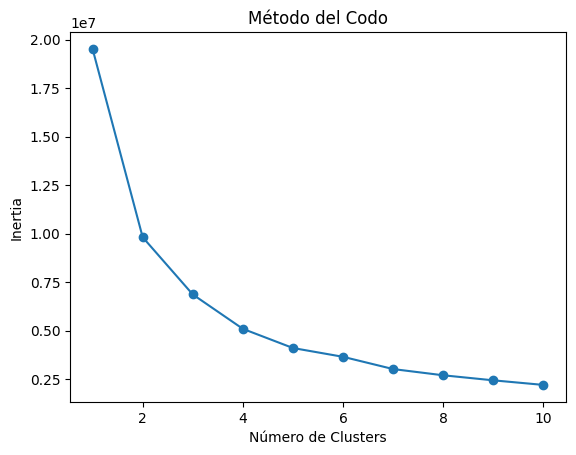

In [205]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

Vamos a elegir 4 clusters para tener variedad y dividir un poco más los tipos de juego de los equipos

In [206]:
kmeans = KMeans(n_clusters=4, random_state=42)
team_stats['style'] = kmeans.fit_predict(team_stats_scaled)

In [207]:
cluster_summary = team_stats.groupby('style').mean(numeric_only=True)
cluster_summary

team_shots_per_game  team_possession  team_pass  team_aerials_won  \
style                                                                      
0                12.805714        52.328571  83.051429         15.174286   
1                 9.416667        45.427778  76.400000         17.138889   
2                10.180645        45.848387  77.719355         17.096774   
3                14.116667        57.316667  86.408333         12.816667   

          goals   assists  yellow_cards  red_cards  progressive_carries  \
style                                                                     
0      1.985926  1.386409      2.953006   0.136450            24.511879   
1      1.095585  0.754991      2.947304   0.190793            16.860066   
2      1.442849  1.034388      2.554011   0.081407            18.750750   
3      3.140209  2.325025      2.302191   0.070949            32.189406   

       progressive_passes  progressive_runs  
style                                        
0               54.011912         53.209626  
1               38.057578         36.984872  
2               41.233096         40.505597  
3               69.685343         69.084445

Visualizando en un dataframe con las medias de las variables vemos que el cluster 3 claramente tiene más posesión del balón, más disparos por partidos, goles, asistencias y estadísiticas progresivas (conducciones, carreras y pases progresivos). Esto muestra que es el gran dominador de las estadísticas de control de balón y ataque organizado, por lo que lo hemos llamado 'Juego ofensivo y dominante'. El cluster 1 es el más bajo en estadísticas como disparos por partido, posesión, pase del equipo y estadisticas progresivas, pero vemos que son el grupo con más duelos aéreos ganados y más tarjetas amarillas y rojas. Esto puede indicar un juego más defensivo, de fuerza y aéreo, por lo que lo hemos llamado 'Juego defensivo'. El cluster 0 tiene medias parecidas a de los jugadores ofensivos y dominantes, pero algo más baja (bastante posesión, pase, goles, etc), por lo que se llamará 'Juego ofensivo'. El cluster 2 se encuentra en estadísticas entre medias en las estadísticas de los cluster 0 y 1. Solo tienen la media más baja en tarjetas, el resto está entre medias, teniendo buena media de goles, asistencias y estadísitcas progresivas. En posesión y pases se parecen más al defensivo que al dominio de balón, por lo que pueden ser equipos que sin tanto control de balón generan bastantes ocasiones, disparos y goles, por lo que lo hemos llamado 'Juego directo'. 

In [208]:
style_map = {0: 'Juego ofensivo', 1: 'Juego defensivo', 2: 'Juego directo', 3: 'Juego ofensivo y dominante'}
team_stats['team_style'] = team_stats['style'].map(style_map)

df_players = df_players.merge(team_stats[['team_style']], left_on='team', right_index=True)
df_players[['player', 'team', 'team_style']]

player                 team                  team_style
0            Max Aarons          Bournemouth              Juego ofensivo
1      Brenden Aaronson         Union Berlin             Juego defensivo
2       Paxten Aaronson  Eintracht Frankfurt               Juego directo
3     Keyliane Abdallah            Marseille              Juego ofensivo
4      Yunis Abdelhamid                Reims               Juego directo
...                 ...                  ...                         ...
2846   Szymon Żurkowski               Empoli               Juego directo
2847     Lovro Zvonarek        Bayern Munich  Juego ofensivo y dominante
2848    Martin Ødegaard              Arsenal  Juego ofensivo y dominante
2850        Milan Đurić                Monza               Juego directo
2851   Mateusz Łęgowski          Salernitana               Juego directo

[2703 rows x 3 columns]

In [209]:
df_players['team_style'].isna().sum()

np.int64(0)

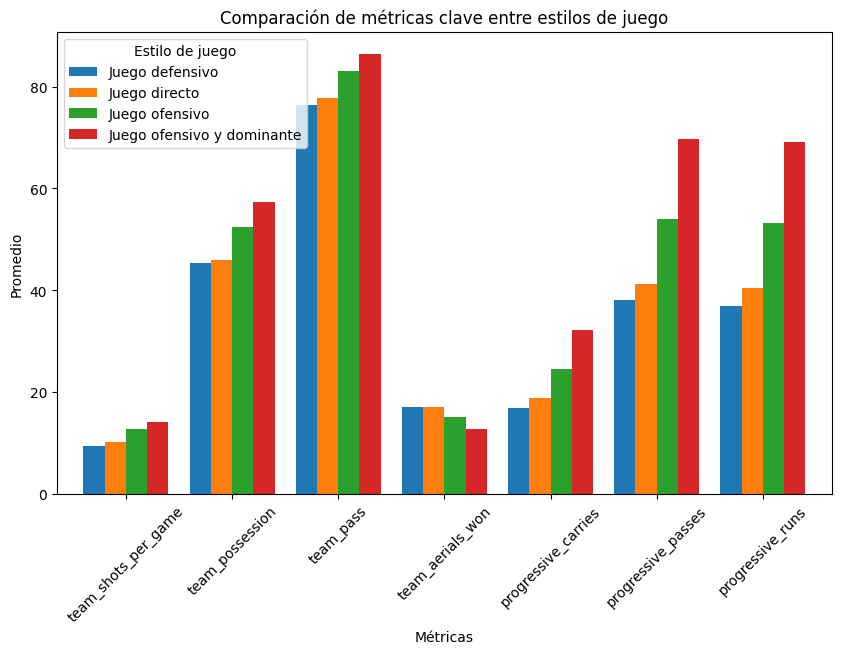

In [210]:
stats_to_plot = team_stats.groupby('team_style')[['team_shots_per_game', 'team_possession', 'team_pass', 'team_aerials_won',
                       'progressive_carries','progressive_passes', 'progressive_runs' ]].mean()
stats_to_plot = stats_to_plot.T

stats_to_plot.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Comparación de métricas clave entre estilos de juego")
plt.ylabel("Promedio")
plt.xlabel("Métricas")
plt.xticks(rotation=45)
plt.legend(title="Estilo de juego")
plt.show()

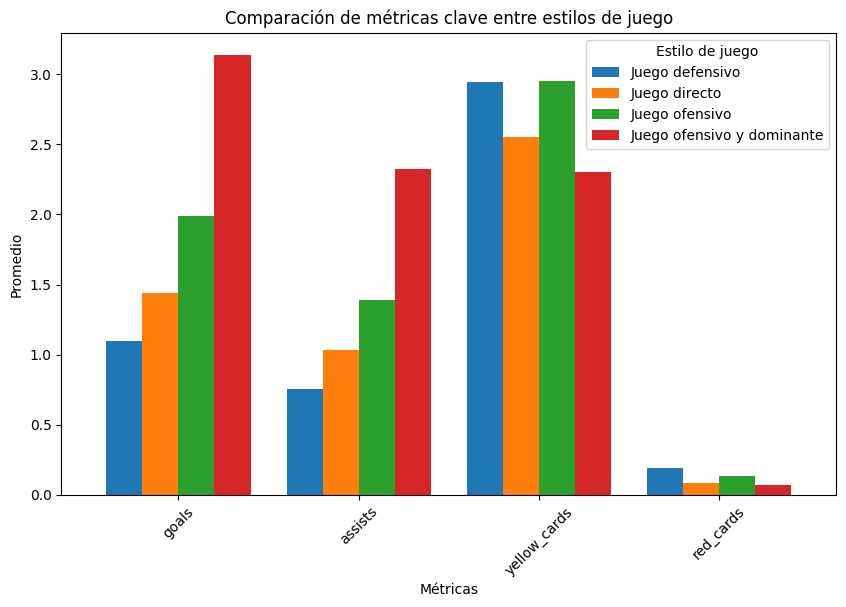

In [211]:
stats_to_plot = team_stats.groupby('team_style')[['goals', 'assists', 'yellow_cards','red_cards']].mean()
stats_to_plot = stats_to_plot.T

stats_to_plot.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Comparación de métricas clave entre estilos de juego")
plt.ylabel("Promedio")
plt.xlabel("Métricas")
plt.xticks(rotation=45)
plt.legend(title="Estilo de juego")
plt.show()

C:\Users\metal\AppData\Local\Temp\ipykernel_10656\3611874933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.index, y=style_counts.values, palette='viridis')


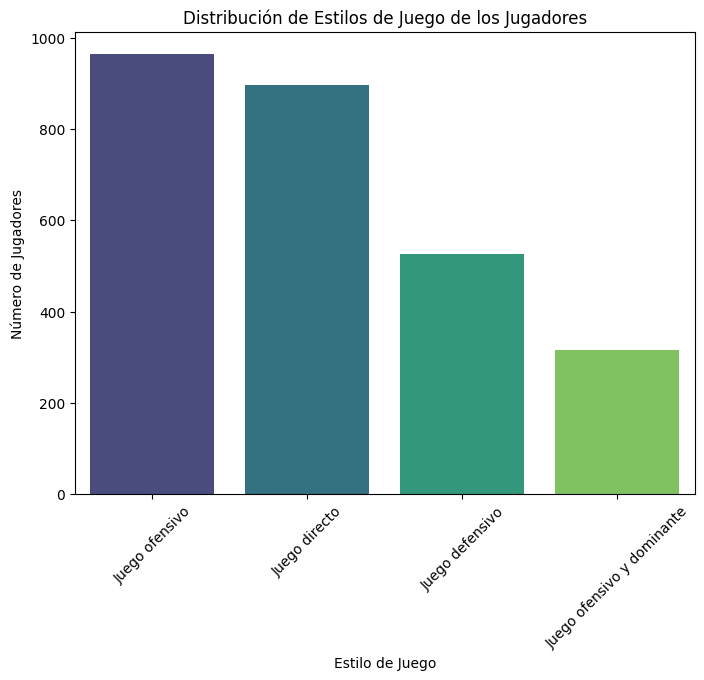

In [212]:
style_counts = df_players['team_style'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=style_counts.index, y=style_counts.values, palette='viridis')
plt.title('Distribución de Estilos de Juego de los Jugadores')
plt.xlabel('Estilo de Juego')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=45)
plt.show()

Vemos que la mayoría de equipos optan por el dominio de balón, control de los partidos y generación de ocasiones ofensivas. Está muy cerca el juego directo, que son equipos que no optan tanto por la posesión de balón pero generan mucho en ataque y acciones ofensivas, por lo que pueden ser equipos contraatacadores. Por último, el grupo de equipos con juego defensivo es el menos representado, lo que coincide con nuestro análisis de que el fútbol parece un deporte con una faceta ofensiva muy marcada, donde marcar goles y generar ocasiones va a ser lo más importante. 

A continuación podemos observar la clusterización realizada: en morado los equipos con dominio de balón, en amarillo los equipos de juego directo y en verde los equipos con juego defensivo

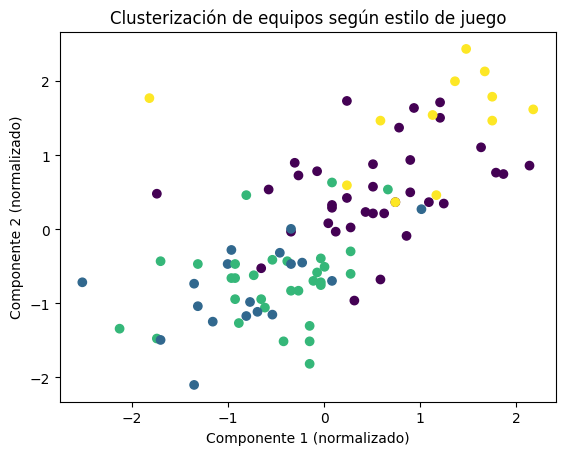

In [213]:
plt.scatter(team_stats_scaled[:, 0], team_stats_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Clusterización de equipos según estilo de juego")
plt.xlabel("Componente 1 (normalizado)")
plt.ylabel("Componente 2 (normalizado)")
plt.show()

Comprobamos varios equipos, para observar su estilo de juego:

In [214]:
team_style = df_players[df_players['team'] == 'Real Madrid']
team_style[['player', 'team', 'team_style']].head()

player         team                  team_style
61         David Alaba  Real Madrid  Juego ofensivo y dominante
142  Kepa Arrizabalaga  Real Madrid  Juego ofensivo y dominante
265    Jude Bellingham  Real Madrid  Juego ofensivo y dominante
435  Eduardo Camavinga  Real Madrid  Juego ofensivo y dominante
471      Dani Carvajal  Real Madrid  Juego ofensivo y dominante

In [215]:
team_style = df_players[df_players['team'] == 'Getafe']
team_style[['player', 'team', 'team_style']].head()

player    team       team_style
6        Nabil Aberdin  Getafe  Juego defensivo
67       Omar Alderete  Getafe  Juego defensivo
69        Carles Aleñá  Getafe  Juego defensivo
86      Gastón Álvarez  Getafe  Juego defensivo
113  Fabrizio Angileri  Getafe  Juego defensivo

In [216]:
team_style = df_players[df_players['team'] == 'Osasuna']
team_style[['player', 'team', 'team_style']].head()

player     team     team_style
131      Jesús Areso  Osasuna  Juego directo
134  Iñigo Arguibide  Osasuna  Juego directo
136      José Arnaiz  Osasuna  Juego directo
218       Kike Barja  Osasuna  Juego directo
371   Darko Brašanac  Osasuna  Juego directo

In [217]:
team_style = df_players[df_players['team'] == 'Manchester City']
team_style[['player', 'team', 'team_style']].head()

player             team                  team_style
48     Manuel Akanji  Manchester City  Juego ofensivo y dominante
50        Nathan Aké  Manchester City  Juego ofensivo y dominante
88    Julián Álvarez  Manchester City  Juego ofensivo y dominante
325       Oscar Bobb  Manchester City  Juego ofensivo y dominante
654  Kevin De Bruyne  Manchester City  Juego ofensivo y dominante

In [218]:
team_style = df_players[df_players['team'] == 'Crystal Palace']
team_style[['player', 'team', 'team_style']].head()

player            team     team_style
40   Naouirou Ahamada  Crystal Palace  Juego directo
105  Joachim Andersen  Crystal Palace  Juego directo
166       Jordan Ayew  Crystal Palace  Juego directo
550   Nathaniel Clyne  Crystal Palace  Juego directo
756   Cheick Doucouré  Crystal Palace  Juego directo

In [219]:
team_style = df_players[df_players['team'] == 'Sheffield United']
team_style[['player', 'team', 'team_style']].head()

player              team       team_style
41   Anel Ahmedhodžić  Sheffield United  Juego defensivo
126  Oliver Arblaster  Sheffield United  Juego defensivo
196    George Baldock  Sheffield United  Juego defensivo
230      Chris Basham  Sheffield United  Juego defensivo
272  Anis Ben Slimane  Sheffield United  Juego defensivo

Vamos a visualizar  comparación entre variables dentro de cada cluster. En amarillo los equipos con dominio de balón, en morado los equipos de jueg ofensivo. En verde los equipos de juego directo y en azul los equipos con juego defensivo. En todas las visualizaciones observamos la prevalencia del cluster de dominio de balón, mientras que entre los otros clusters es un poco más difuso, auqneu están bien diferenciados a nivel general

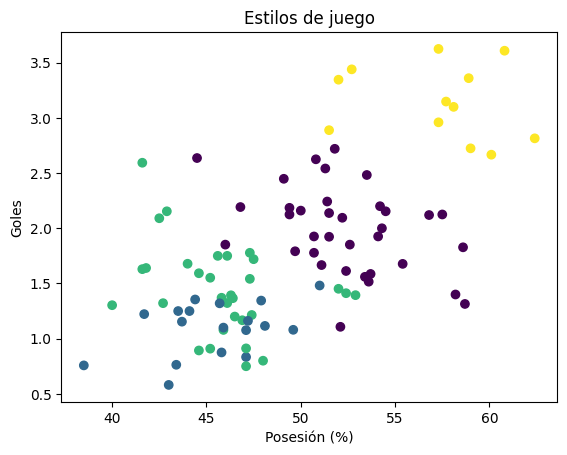

In [220]:
plt.scatter(team_stats['team_possession'], team_stats['goals'], c=team_stats['style'])
plt.xlabel('Posesión (%)')
plt.ylabel('Goles')
plt.title('Estilos de juego')
plt.show()

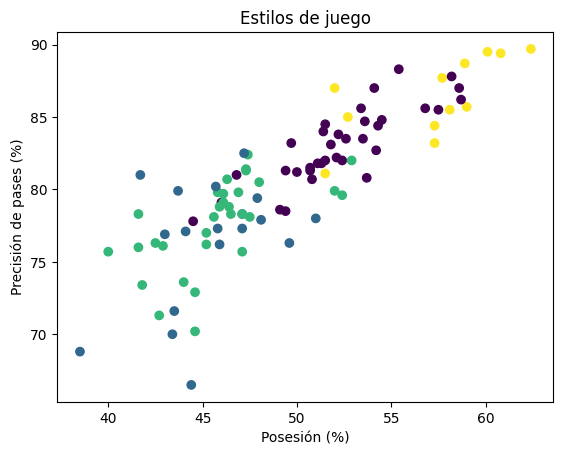

In [221]:
plt.scatter(team_stats['team_possession'], team_stats['team_pass'], c=team_stats['style'])
plt.xlabel('Posesión (%)')
plt.ylabel('Precisión de pases (%)')
plt.title('Estilos de juego')
plt.show()

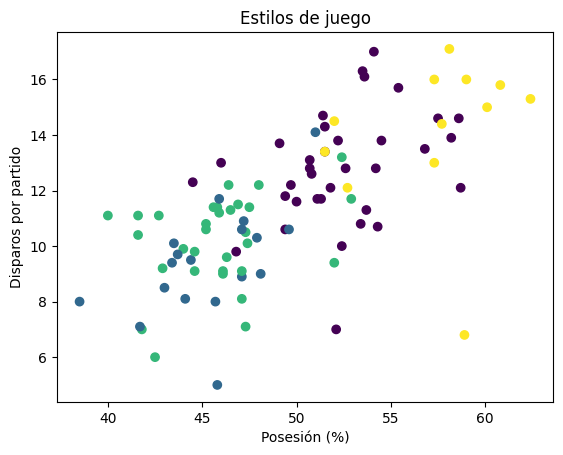

In [222]:
plt.scatter(team_stats['team_possession'], team_stats['team_shots_per_game'], c=team_stats['style'])
plt.xlabel('Posesión (%)')
plt.ylabel('Disparos por partido')
plt.title('Estilos de juego')
plt.show()

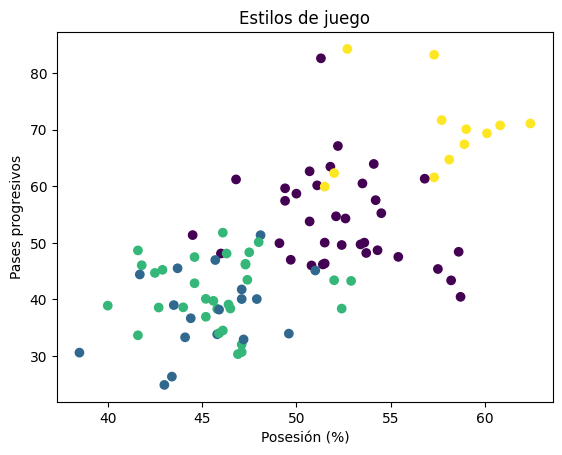

In [223]:
plt.scatter(team_stats['team_possession'], team_stats['progressive_passes'], c=team_stats['style'])
plt.xlabel('Posesión (%)')
plt.ylabel('Pases progresivos')
plt.title('Estilos de juego')
plt.show()

Guardamos el modelo

In [224]:
import joblib

joblib.dump(kmeans, 'kmeans_team_styles.pkl')

joblib.dump(scaler, 'scaler_team_styles.pkl')

['scaler_team_styles.pkl']

____
### MODELO CLASIFICACIÓN DEL ESTILO DEL JUGADOR (CLUSTERING K-MEANS)

In [225]:
df_players.columns

Index(['player', 'nation', 'position', 'team', 'formation',
       'team_shots_per_game', 'team_possession', 'team_pass',
       'team_aerials_won', 'league', 'age', 'age_range', 'matches', 'starts',
       'minutes', 'goals', 'assists', 'goals_assists', 'penalty_goals',
       'yellow_cards', 'red_cards', 'expected_goals', 'expected_assists',
       'progressive_carries', 'progressive_passes', 'progressive_runs',
       'goals_90min', 'assists_90min', 'goals_assists_90min', 'team_style'],
      dtype='object')

Seleccionameos las variables individuales más importantes para analizar el tipo de juego de los futbolistas:

In [226]:
player_stats = ['goals', 'assists', 'goals_assists', 'penalty_goals','goals_90min', 'assists_90min', 'goals_assists_90min', 
    'yellow_cards', 'red_cards', 'expected_goals', 'expected_assists',
    'progressive_carries', 'progressive_passes', 'progressive_runs'
]

df_stats = df_players[player_stats]

In [227]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_stats)

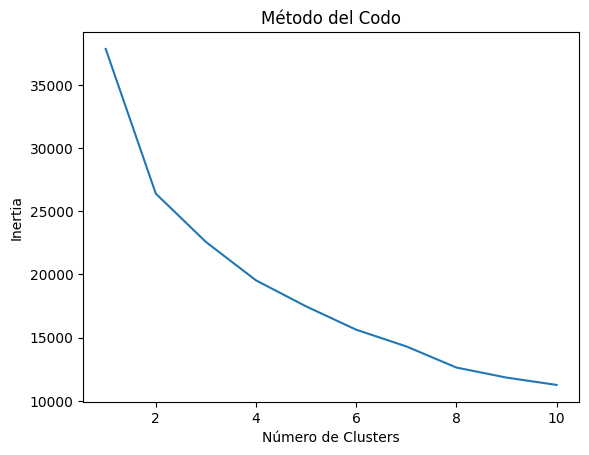

In [228]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()


In [229]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

df_players['players_cluster'] = kmeans.fit_predict(df_scaled)

In [230]:
cluster_means = df_players.groupby('players_cluster')[player_stats].mean()
cluster_means

goals   assists  goals_assists  penalty_goals  \
players_cluster                                                     
0                9.156000  5.316000      14.472000       1.304000   
1                1.967112  1.758479       3.725591       0.085303   
2                0.354730  0.217568       0.572297       0.010811   

                 goals_90min  assists_90min  goals_assists_90min  \
players_cluster                                                    
0                   0.424160       0.304280             0.728480   
1                   0.113916       0.099353             0.212878   
2                   0.074986       0.055378             0.130311   

                 yellow_cards  red_cards  expected_goals  expected_assists  \
players_cluster                                                              
0                    3.932000   0.132000        8.353600          4.836000   
1                    4.694758   0.240493        2.112230          1.807503   
2                    1.205405   0.041216        0.436757          0.282973   

                 progressive_carries  progressive_passes  progressive_runs  
players_cluster                                                             
0                          68.652000           96.196000        171.332000  
1                          33.576567           83.640288         67.646454  
2                           6.154054           16.476351         12.810811

Visualizando en un dataframe con las medias de las variables vemos que el cluster 0 tiene mejor media de goles, asistencias, penaltis marcados, estadísticas por 90 minutos y juego progresivo, por lo que clasificamos este tipo de jugadores como 'Jugador ofensivo'. El cluster 1 promedia más tarjetas amarillas y rojas y menos goles y asistencias, por lo que lo hemos llamado 'Jugador defensivo'. El cluster 2 está en unas métricas de media mucho más bajas, sin poder ser defensivo, ya que incluso el número de tarjetas o pases es mucho más bajo, por lo que lo clasificamos como 'Jugador secundario'.

In [231]:
player_style_labels = {0: 'Jugador ofensivo destacado', 1: 'Jugador defensivo', 2:'Jugador secundario o portero'}

df_players['playing_style'] = df_players['players_cluster'].map(player_style_labels)

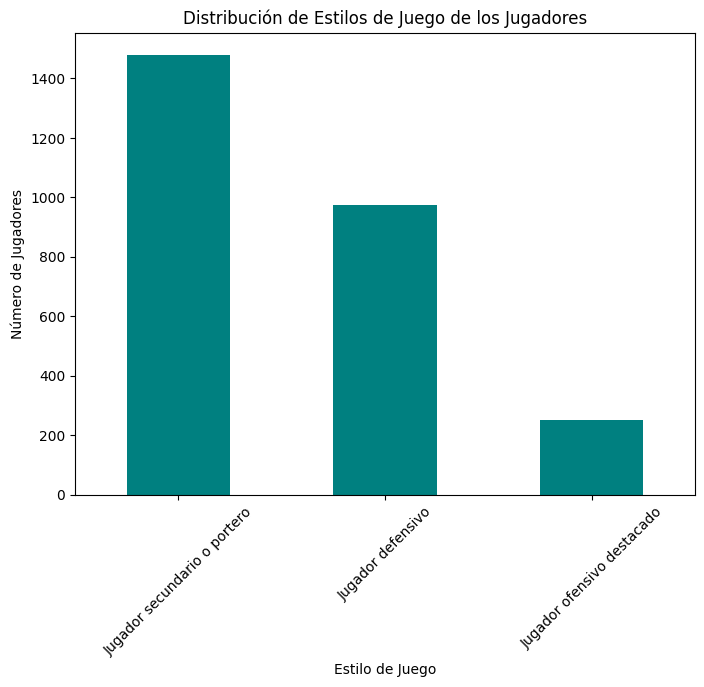

In [232]:
player_style_counts = df_players['playing_style'].value_counts()

plt.figure(figsize=(8, 6))
player_style_counts.plot(kind='bar', color='teal')
plt.title('Distribución de Estilos de Juego de los Jugadores')
plt.xlabel('Estilo de Juego')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=45)
plt.show()

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

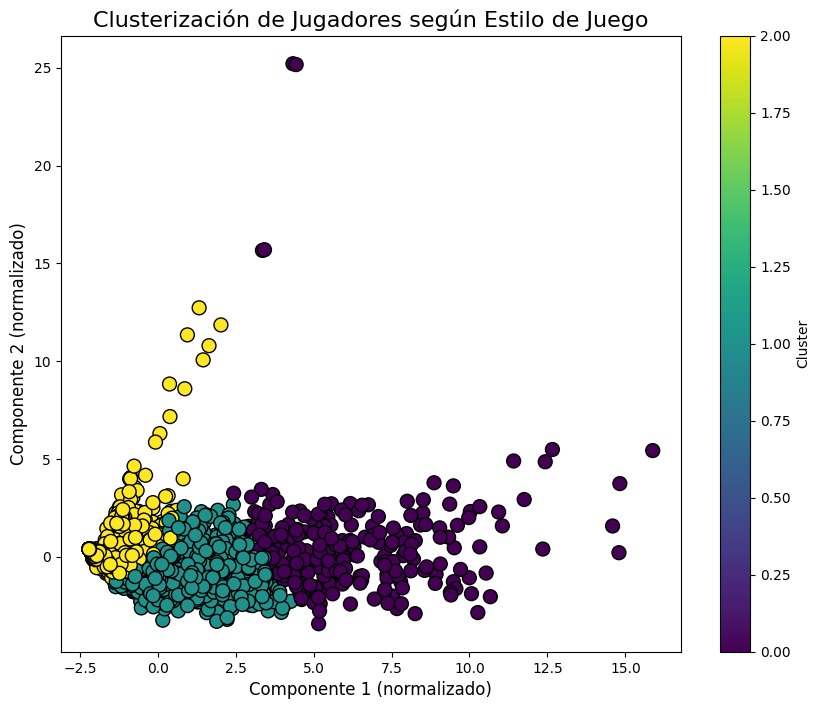

In [234]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_players['players_cluster'], cmap='viridis', s=100, edgecolor='black')

plt.title("Clusterización de Jugadores según Estilo de Juego", fontsize=16)
plt.xlabel("Componente 1 (normalizado)", fontsize=12)
plt.ylabel("Componente 2 (normalizado)", fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

In [235]:
df_players[['player', 'playing_style']].head()

player                 playing_style
0         Max Aarons  Jugador secundario o portero
1   Brenden Aaronson             Jugador defensivo
2    Paxten Aaronson  Jugador secundario o portero
3  Keyliane Abdallah  Jugador secundario o portero
4   Yunis Abdelhamid             Jugador defensivo

In [236]:
player_style = df_players[df_players['player'] == 'Kylian Mbappé']
player_style[['player', 'team', 'team_style', 'playing_style']].head()

player                 team                  team_style  \
1690  Kylian Mbappé  Paris Saint-Germain  Juego ofensivo y dominante   

                   playing_style  
1690  Jugador ofensivo destacado

In [237]:
player_style = df_players[df_players['player'] == 'Harry Kane']
player_style[['player', 'team', 'team_style', 'playing_style']].head()

player           team                  team_style  \
1297  Harry Kane  Bayern Munich  Juego ofensivo y dominante   

                   playing_style  
1297  Jugador ofensivo destacado

In [238]:
player_style = df_players[df_players['player'] == 'Thibaut Courtois']
player_style[['player', 'team', 'team_style', 'playing_style']].head()

player         team                  team_style  \
596  Thibaut Courtois  Real Madrid  Juego ofensivo y dominante   

                    playing_style  
596  Jugador secundario o portero

In [239]:
player_style = df_players[df_players['player'] == 'Eduardo Camavinga']
player_style[['player', 'team', 'team_style', 'playing_style']].head()

player         team                  team_style  \
435  Eduardo Camavinga  Real Madrid  Juego ofensivo y dominante   

         playing_style  
435  Jugador defensivo

In [240]:
player_style = df_players[df_players['player'] == 'Pau Cubarsí']
player_style[['player', 'team', 'team_style', 'playing_style']].head()

player       team                  team_style  \
610  Pau Cubarsí  Barcelona  Juego ofensivo y dominante   

                    playing_style  
610  Jugador secundario o portero

In [241]:
player_style = df_players[df_players['player'] == 'Virgil van Dijk']
player_style[['player', 'team', 'team_style', 'playing_style']].head()

player       team                  team_style  \
2671  Virgil van Dijk  Liverpool  Juego ofensivo y dominante   

          playing_style  
2671  Jugador defensivo

In [242]:
joblib.dump(kmeans, 'kmeans_player_styles.pkl')  
joblib.dump(scaler, 'scaler_player_styles.pkl')

['scaler_player_styles.pkl']

____
### MODELO DE REGRESIÓN PARA PREDECIR LOS GOLES DE LOS JUGADORES

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression

In [244]:
df_players.columns

Index(['player', 'nation', 'position', 'team', 'formation',
       'team_shots_per_game', 'team_possession', 'team_pass',
       'team_aerials_won', 'league', 'age', 'age_range', 'matches', 'starts',
       'minutes', 'goals', 'assists', 'goals_assists', 'penalty_goals',
       'yellow_cards', 'red_cards', 'expected_goals', 'expected_assists',
       'progressive_carries', 'progressive_passes', 'progressive_runs',
       'goals_90min', 'assists_90min', 'goals_assists_90min', 'team_style',
       'players_cluster', 'playing_style'],
      dtype='object')

Seleccionamos las variables más importantes para los modelos, siendo sobre todo las estadísiticas las que más tenemos que aportar. Quitamos además variables que como vimos anteriormente general colinealidad, como progressive runs y progressive carries, y las asistencias, que generan colinealidad con expected goals

In [245]:
features = ['matches', 'age', 'expected_goals', 'team_shots_per_game', 'team_possession', 'team_pass',
             'yellow_cards', 'red_cards', 'progressive_passes']

In [246]:
X = df_players[features]
y = df_players['goals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Cabe remarcar que aquí intentamos escalar las variables, pero los resultados eran mucho peores que sin escalar

In [247]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [248]:
print('La intersección (a) es:',model_lr.intercept_)
print('Las pendientes (b1...bn) son:',model_lr.coef_)

La intersección (a) es: -0.5094983753089741
Las pendientes (b1...bn) son: [-0.00525009 -0.00165241  1.00691709 -0.01123532  0.0302785  -0.01022893
 -0.00386689 -0.10095566  0.00147304]


In [249]:
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

Comprobamos si hay diferencias entre las métricas de train y test para ver si el modelo puede estar sobreajustando. En este caso no está sobreajustando, hay poca diferencia en el mean squared error y casi inapreciable en R2

In [250]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MSE: {train_mse}, R²: {train_r2}")
print(f"Prueba - MSE: {test_mse}, R²: {test_r2}")

Entrenamiento - MSE: 1.260878550068215, R²: 0.8656126666773442
Prueba - MSE: 1.6833989986174707, R²: 0.869210532081413


In [251]:
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model_lr.coef_})
print("\nCoeficientes del modelo:")
print(coef_df)


Coeficientes del modelo:
               Feature  Coefficient
0              matches    -0.005250
1                  age    -0.001652
2       expected_goals     1.006917
3  team_shots_per_game    -0.011235
4      team_possession     0.030278
5            team_pass    -0.010229
6         yellow_cards    -0.003867
7            red_cards    -0.100956
8   progressive_passes     0.001473


Este modelo da bastante importancia a las tarjetas rojas, las asistencias, las variables en cuanto a equipo y los partidos jugados. Tienen muy poca importancia la edad, las tarjetas amarillas y los pases progresivos

C:\Users\metal\AppData\Local\Temp\ipykernel_10656\3321830792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Abs_Coefficient", y="Feature", palette="viridis")


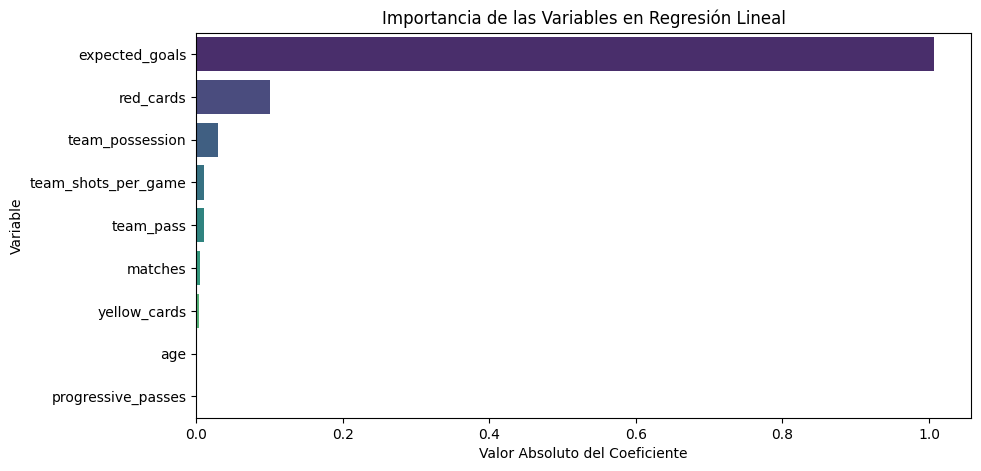

In [252]:
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=coef_df, x="Abs_Coefficient", y="Feature", palette="viridis")
plt.title("Importancia de las Variables en Regresión Lineal")
plt.xlabel("Valor Absoluto del Coeficiente")
plt.ylabel("Variable")
plt.show()

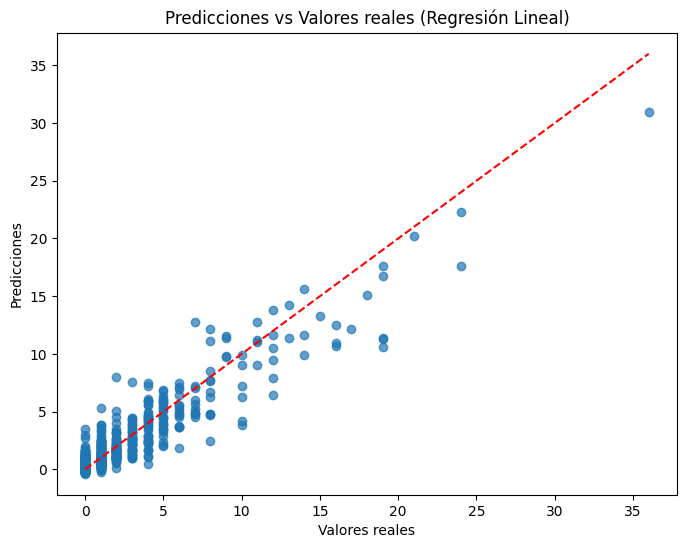

In [253]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales (Regresión Lineal)')
plt.show()

En general los errores son bajos, pero podemos observar que el RMSE es mayor que el MAE, por lo que es probable que haya algunos errores en la predicción que son más grandes. Entre RMSE y MSE no hay tanta diferencia. El MAE indica que los errores promedio son pequeños y el RMSE que el valor del error de predicción en valor real aplicable a los goles es de 1.29 goles


In [254]:
MAE = mean_absolute_error(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred)**0.5
print('MAE:',MAE)
print('MSE:',MSE)
print('RMSE:',RMSE)

MAE: 0.7546268858919316
MSE: 1.6833989986174707
RMSE: 1.2974586693291894


Vamos a probar si se puede mejorar con Ridge o Lasso

In [255]:
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [256]:
alphas = [0.01, 0.1, 1, 10, 100]

ridge_results = []
lasso_results = []

for alpha in alphas:

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_train_ridge = ridge.predict(X_train)
    y_pred_test_ridge = ridge.predict(X_test)
    ridge_results.append((alpha, mean_squared_error(y_test, y_pred_test_ridge), r2_score(y_test, y_pred_test_ridge)))
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_train_lasso = lasso.predict(X_train)
    y_pred_test_lasso = lasso.predict(X_test)
    lasso_results.append((alpha, mean_squared_error(y_test, y_pred_test_lasso), r2_score(y_test, y_pred_test_lasso)))

print("Ridge:")
for alpha, mse, r2 in ridge_results:
    print(f"Alpha: {alpha} - MSE: {mse:.4f}, R²: {r2:.4f}")

print("Lasso:")
for alpha, mse, r2 in lasso_results:
    print(f"Alpha: {alpha} - MSE: {mse:.4f}, R²: {r2:.4f}")

Ridge:
Alpha: 0.01 - MSE: 95.1177, R²: 0.9943
Alpha: 0.1 - MSE: 95.1054, R²: 0.9943
Alpha: 1 - MSE: 95.0077, R²: 0.9943
Alpha: 10 - MSE: 96.5612, R²: 0.9942
Alpha: 100 - MSE: 309.4461, R²: 0.9815
Lasso:
Alpha: 0.01 - MSE: 95.1502, R²: 0.9943
Alpha: 0.1 - MSE: 95.5174, R²: 0.9943
Alpha: 1 - MSE: 107.9198, R²: 0.9936
Alpha: 10 - MSE: 973.9343, R²: 0.9419
Alpha: 100 - MSE: 17109.5225, R²: -0.0207


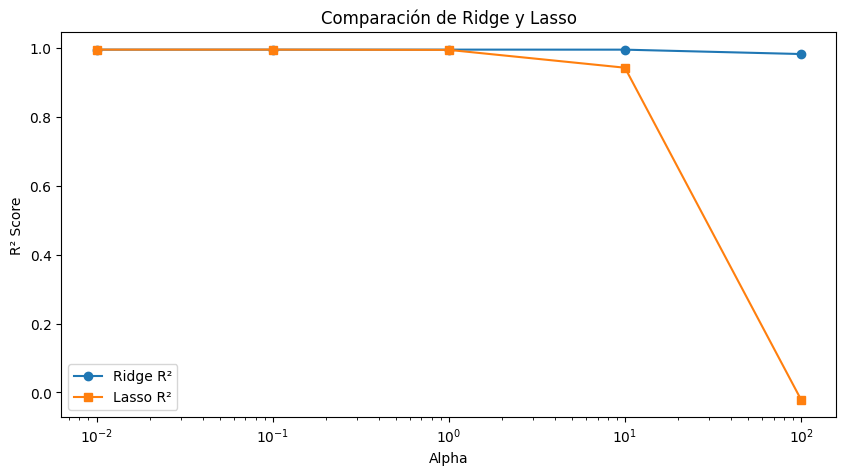

In [257]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, [r[2] for r in ridge_results], label='Ridge R²', marker='o')
plt.plot(alphas, [r[2] for r in lasso_results], label='Lasso R²', marker='s')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Comparación de Ridge y Lasso')
plt.legend()
plt.show()

Ridge y Lasso están mejorando nuestro R cuadrado (acierto), pero han hecho que el error promedio sea una barbaridad, por lo que no está ayudando al modelo y preferimos quedarnos con el modelo original de Linear Regression.

In [258]:
import joblib

joblib.dump(model_lr, 'modelo_goles_lr.pkl')

['modelo_goles_lr.pkl']

CONCLUSIONES LINEAR REGRESSION PARA PREDICCIÓN DE GOLES:

Hemos conseguido un modelo bastante bueno, que hace una buena predecicción de los goles, ya que explica bien los datos (como comprobamos con la metrica R2) y un bajo error en los en train y en test. Además, no hay signos importantes de sobreajuste, aunque haya una pequeña diferencia entre los valores de error de train y test, pero parece aceptable. Aún así con los errores vemos, que falla en algún dato con mayor error.

Aplicaciones:
Conforme a nuestro proyecto, el modelo es, por el momento, el mejor y una herramienta muy buena para considerar los goles que marcará un jugador en una nueva temporada. Esto es de utilidad para los propios equipos y su cuerpo técnico, para posibles equipos que quieran fichar ciertos jugadores e incluso para agentes de futbolistas que busquen jugadores con cierta predicción de goles para sacar beneficios por su contratación y posibles futuras ventas en el mercado.

___

### RANDOM FOREST PARA PREDICCIÓN DE GOLES 

In [259]:
X = df_players[features]
y = df_players['goals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [260]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Vemos que las importancias de las variables serían en orden descendente: los goles esperados, los disparos por partido del equipo, los pases progresivos, la posesión del equipo, la edad, el porcentaje de acierto de pase del equipo y los partidos jugados.

<Axes: xlabel='Importancia', ylabel='Variable'>

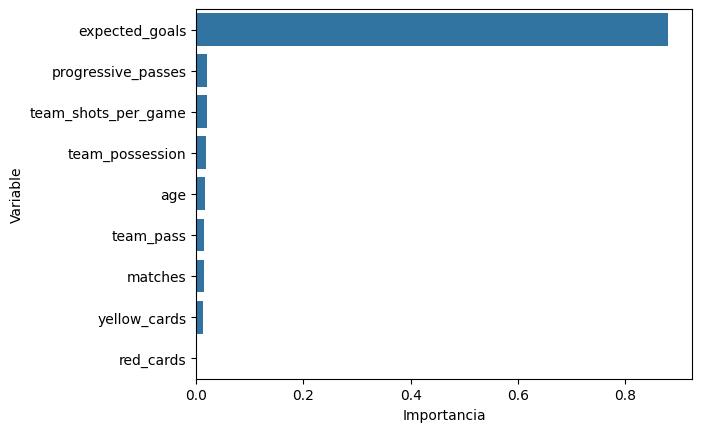

In [261]:
importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importances})
importance_df = importance_df.sort_values('Importancia', ascending=False)
sns.barplot(data = importance_df, x='Importancia', y ='Variable')


In [262]:
y_pred = rf_model.predict(X_test)

In [263]:
df_evaluacion = pd.DataFrame()
df_evaluacion['y'] = y_test
df_evaluacion['y_pred'] = y_pred
df_evaluacion['error'] = df_evaluacion['y']-df_evaluacion['y_pred']

df_evaluacion

y  y_pred  error
1002  1    0.13   0.87
1668  0    0.06  -0.06
1484  2    1.03   0.97
1334  0    0.33  -0.33
2422  0    0.16  -0.16
...  ..     ...    ...
924   1    0.54   0.46
2369  1    0.27   0.73
1782  0    0.94  -0.94
2619  1    1.07  -0.07
394   4    1.39   2.61

[811 rows x 3 columns]

Medimos los errores y graficamos la evaluación que hemos realizado, donde vemos un modelo decente, sin mucho error, aunque hay valores atípicos bastante alejados y que pueden cambiar nuestros resutados, pero son muy valiosos para el proyecto.

Aunque el MAE nos muestra un modelo preciso en la predicción, el MSE de 2.16, puede darnos a entender que hay casos en los que el error es más grande y el modelo puede tener desviaciones más grandes. El RMSE de 1.47 predice mejor en general y es un buen error real para comparar en la misma medida que los goles de nuestro dataset

In [264]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5

print('MAE:',MAE)
print('MSE:',MSE)
print('RMSE:',RMSE)

MAE: 0.8039087546239211
MSE: 2.1612533908754625
RMSE: 1.470120196064071


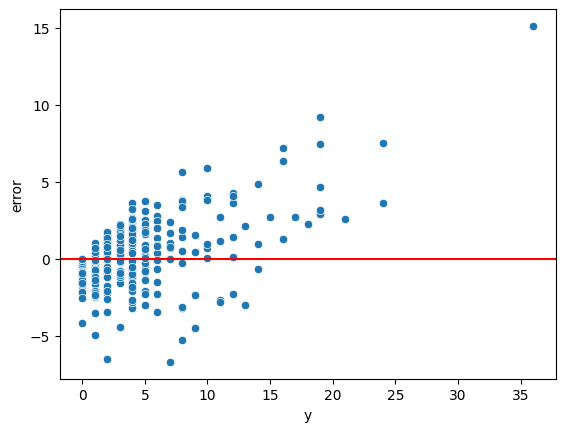

In [265]:
sns.scatterplot(data = df_evaluacion, x = 'y',y='error')
plt.axhline(0,color='red')

Vemos que en train lo hace muy bien prediciendo, aprendiendo y ajustandose muy bien a los datos y generando muy poco error. En test sigue prediciendo bien, aunque con valores de R un poco alejados de train, por lo que intentaremos mejorarlo.

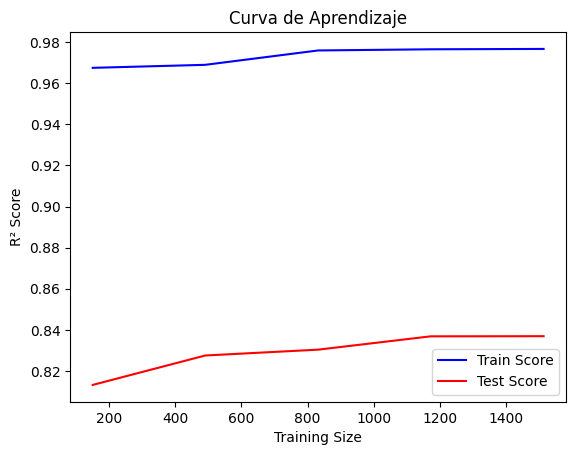

In [266]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='r2')
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score", color="blue")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score", color="red")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Curva de Aprendizaje")
plt.show()

In [267]:
y_train_pred = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Entrenamiento MSE: {train_mse}, R²: {train_r2}")
print(f"Prueba MSE: {test_mse}, R²: {test_r2}")

Entrenamiento MSE: 0.20584413319238898, R²: 0.9780606592614791
Prueba MSE: 2.1612533908754625, R²: 0.8320842644780042


Vamos a ver qué ajustes podemos hacer para optimizar el modelo. Sobre todo queremos ajustar un poco el acierto entre train y test, bajar el error proemdio entre ambos y que el árbol tampoco crezca ilimitadamente o el numero de hojas sea solo 1

In [268]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 4],
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=100, random_state=42, n_jobs=-1, cv=5)


random_search.fit(X_train, y_train)

print(f"Mejores parámetros: {random_search.best_params_}")

Mejores parámetros: {'n_estimators': np.int64(160), 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 30}


In [269]:
y_pred = random_search.predict(X_test)

In [270]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 2.060390871678906
R²: 0.8399206450565122


In [271]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_estimators': [150,160,170],
    'max_depth': [6,8,10,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [2,3,5]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\metal\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 160}


In [272]:
best_rf = grid_search.best_estimator_
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Entrenamiento - MSE: {mse_train}, R²: {r2_train}")
print(f"Prueba - MSE: {mse_test}, R²: {r2_test}")

Entrenamiento - MSE: 0.8032801476336028, R²: 0.9143845559545216
Prueba - MSE: 2.0654550438437016, R²: 0.8395271908704127


In [273]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [274]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

Mean Squared Error: 2.0654550438437016
R²: 0.8395271908704127


In [275]:
y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MSE: {train_mse}, R²: {train_r2}")
print(f"Prueba - MSE: {test_mse}, R²: {test_r2}")

Entrenamiento - MSE: 0.8032801476336028, R²: 0.9143845559545216
Prueba - MSE: 2.0654550438437016, R²: 0.8395271908704127


In [276]:
import joblib

joblib.dump(best_model, 'modelo_goles_rf.pkl')

['modelo_goles_rf.pkl']

CONCLUSIONES

Hemos logrado un buen modelo, aunque ahora predice un pelín peor en train, pero porque no queremos que el maximo de hojas sea solo una y no se crezca tanto. Es decir, queremos evitar un sobreajuste. La diferencia de predicción entre train y test es buena, el modelo generaliza bien, aunque haya algo de diferencia entre train y test. El error lo podemos considerar bajo y parece un modelo equilibrado, no está tan sobreentrenado, predice bien, aunque hay que tener en cuanta que tendría espacia de mejora debido a que puede haber influencia de los outliers sobre los datos. En este caso hay bastantes valores de goles superiores al limite superior donde se considera outlier, y son outliers de los futbolistas que marcan más de 5 goles, por lo que es un valor importante para el proyecto.

Con respecto a la regresión lineal, el Random Forest empeora un poco el modelo, aunque en realidad no tanto. Sobre todo la diferencia está en la subida del MSE, que nos hace ver que hay un mayor error y varianza del error. Los demás errores son bastante parecidos y en train predice peor que la regresión lineal, aunque en este lo hicera mejor.


____
### XGBOOST PARA PREDICCIÓN DE GOLES

In [277]:
import xgboost as xgb

In [278]:
X = df_players[features]
y = df_players['goals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [279]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [280]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

Las importancias en XGBoost son bastante parecidas al modelo de Random Forest, aunque alguna variable como las tarjetas amarillas gana importancia en este modelo y los partidos jugados pierden algo de importancia con respecto al resto de variables

<Axes: xlabel='Importancia', ylabel='Variable'>

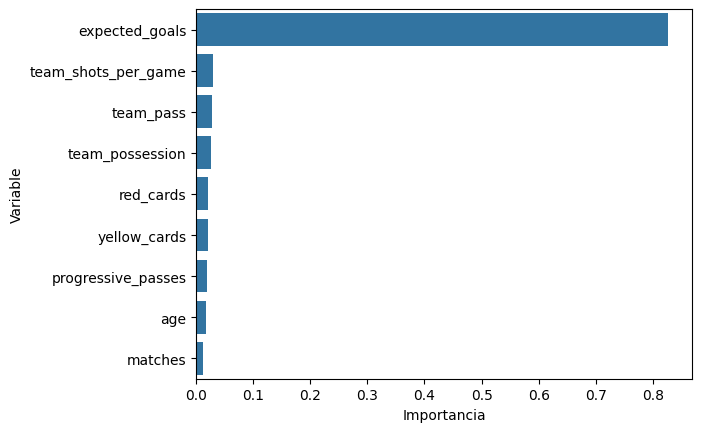

In [281]:
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importances})
importance_df = importance_df.sort_values('Importancia', ascending=False)
sns.barplot(data=importance_df, x='Importancia', y='Variable')

In [282]:
y_pred = xgb_model.predict(X_test)

In [283]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MSE: {mse_train}, R²: {r2_train}")
print(f"Prueba - MSE: {mse_test}, R²: {r2_test}")

Entrenamiento - MSE: 0.022112548411697693, R²: 0.9976431727409363
Prueba - MSE: 2.487583446425098, R²: 0.8067305088043213


In [284]:
df_evaluacion = pd.DataFrame()
df_evaluacion['y'] = y_test
df_evaluacion['y_pred'] = y_pred
df_evaluacion['error'] = df_evaluacion['y'] - df_evaluacion['y_pred']
df_evaluacion

y    y_pred     error
1002  1 -0.027300  1.027300
1668  0  0.125151 -0.125151
1484  2  1.023432  0.976568
1334  0  0.006108 -0.006108
2422  0 -0.086779  0.086779
...  ..       ...       ...
924   1  1.116923 -0.116923
2369  1  0.161491  0.838509
1782  0  0.694956 -0.694956
2619  1  1.189753 -0.189753
394   4  1.784799  2.215201

[811 rows x 3 columns]

In [285]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 0.8677273116268253
MSE: 2.487583446425098
RMSE: 1.577207483632099


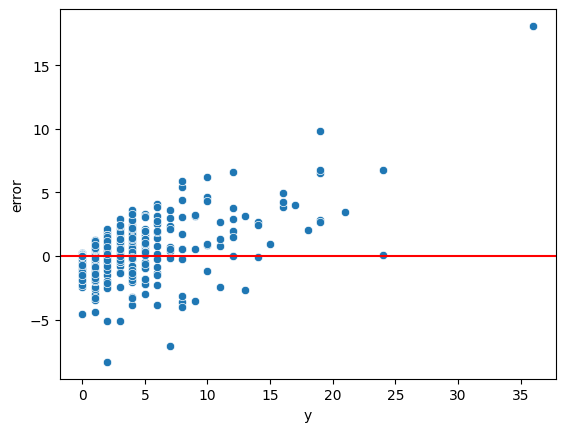

In [286]:
sns.scatterplot(data=df_evaluacion, x='y', y='error')
plt.axhline(0, color='red')

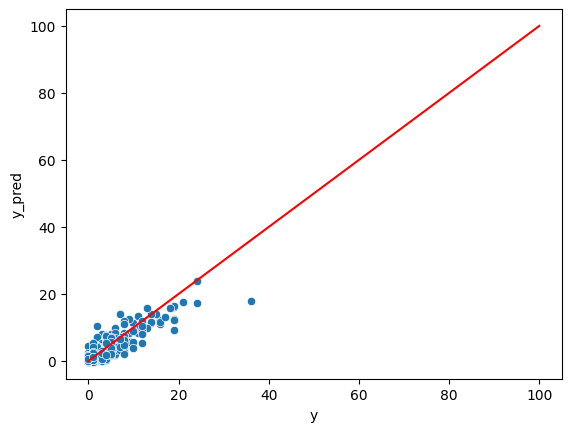

In [287]:
sns.scatterplot(data=df_evaluacion, x='y', y='y_pred')
plt.plot([0, 100], [0, 100], color='red')
plt.show()

Según aumentan los valores, vemos que el modelo XGboost predice peor, en train lo hace bastante bien, tanto en accuracy como en error, pero en test hay diferencia entre train y test, baja el accuracy y sube el error promedio. Por ello, parece que el modelo puede estar sobreajustado, asi que vamos a intentar ajustar con hiperparámetros y asi optimizar el modelo

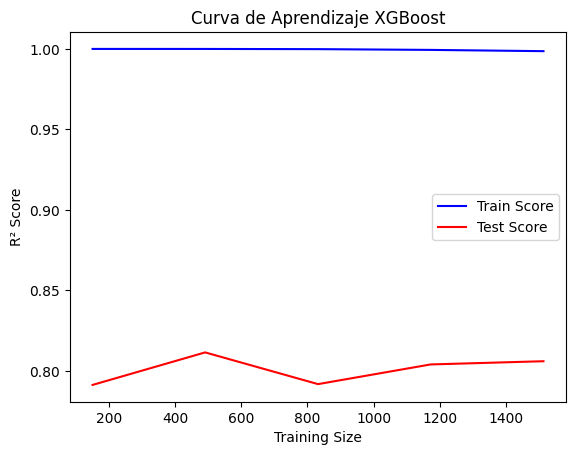

In [288]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, scoring='r2')
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score", color="blue")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score", color="red")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Curva de Aprendizaje XGBoost")
plt.show()

Como podemos observar , tanto con los parámetros como con la visualización, el modelo XGboost está sobreajustando demasiado. Vemos que en train está memorizando los datos mucho, ya que en test nos da bastante menos acierto y error

In [289]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
#                            scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print("Mejores parámetros:", grid_search.best_params_)


In [290]:
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [291]:
best_xgb_model = grid_search.best_estimator_

In [292]:
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

In [293]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MSE: {mse_train}, R²: {r2_train}")
print(f"Prueba - MSE: {mse_test}, R²: {r2_test}")

Entrenamiento - MSE: 0.7909437997794326, R²: 0.9156993627548218
Prueba - MSE: 2.1084145542046997, R²: 0.8361895084381104


Hemos logrado bajar la diferencia de error entre train y test, aunque haya subido algo en train. Y sobre todo hemos hecho que la distancia entre R2 en train y test no sea tan grande, auqnue también haya bajado algo en train. Sigue habiedno buen ajuste a los datos de entrenamiento y hemos mejorado en test. Aún así puede haber margen de mejora, asi que vamos a probarlo con Grid Search, introduciendo los parámetros alpha y lambda, que al ser parámetros de regularización pueden ayudarnos con valores más pequeños a reducir el posible sobreajuste.

In [294]:
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'alpha': [0, 0.1, 0.5],
#     'lambda': [0, 0.1, 0.5]
# }

# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
#                            scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print("Mejores parámetros:", grid_search.best_params_)

Vamos a comentar el código y así facilitamos la rapidez de ejecución del mismo, poniendo los mejores valores de hiperparámetros encontrados en el paso anterior

In [295]:
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.05],
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'alpha': [0.5],
    'lambda': [0]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Mejores parámetros: {'alpha': 0.5, 'colsample_bytree': 1.0, 'lambda': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [296]:
best_xgb_model = grid_search.best_estimator_

In [297]:
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

XGBoost nos da unos errores más altos que los otros dos modelos y pareciendose al Random Forest también tiene peor desempeño que este. El MAE nos vuelve a mostrar un modelo preciso en la predicción, pero el MSE de 2.48, nos sigue mostrando (y en mayor medida) que el error es más grande y el modelo puede tener desviaciones más grandes que con la regresión lineal. El RMSE de 1.57 predice mejor en general y es un buen error real para comparar en la misma medida que los goles de nuestro dataset, pero es peor que con el random forest y la regresión

In [298]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 0.8677273116268253
MSE: 2.487583446425098
RMSE: 1.577207483632099


In [299]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MSE: {mse_train}, R²: {r2_train}")
print(f"Prueba - MSE: {mse_test}, R²: {r2_test}")

Entrenamiento - MSE: 0.8956227732911919, R²: 0.9045424461364746
Prueba - MSE: 2.070974912201383, R²: 0.839098334312439


CONCLUSIONES XGBOOST

Tenemos otro buen modelo, que ha sido mejorado mediante los ajustes con GridSearch (y cross-validation de 3) para evitar tanto sobreajuste. Esta última combinación de parámetros mejora el rendimiento en comparación con el modelo inicial, pero creemos que puede haber todavía un pelín de diferencia entre las métricas, por lo que este modelo quizá tienda más al sobreajuste que los otros modelos de regresión. Aún así la diferencia de error entre train y test no es exagerada y da un error promedio bastante razonable. En la métrica de R2 hemos conseguido acercar los valores en train y test y que así no sea tan grande, de manera que genralice bien, aunque tenga espacio de mejora

Es un modelo muy parecido en las métricas de train y test al Random Forest, teneindo también un mejor rendimiento en train que la regresión lineal, pero que no logra mejorarla en test. Por lo que, en conjunto, nos quedamos con la regresión lineal

In [300]:
import joblib

joblib.dump(best_model, 'modelo_goles_xgb.pkl')

['modelo_goles_xgb.pkl']

### CONCLUSIONES GENERALES DE LA REGRESIÓN

En definitiva, hemos conseguido tres buenos modelos para la predicción de goles, sobre todo teniendo en cuenta que es una variable estadística de los jugadores con bastante outlier debido a los jugadores que tienen una mayor capacidad goleadora y que muchas otras posiciones promedian una cantidad de goles muy baja o incluso nula. De estos modelos, nos podemos quedar con la regresión lineal como modelo bien balanceado y con poco error en la predicción de goles que marcarán los jugadores. Hemos observado como este modelo lineal ha podido dar mejores resultados que los otros modelos de regresión no lineales, aunque estos tampoco han tenido un mal desempeño. Son buenos modelos y que guardamos por si se utilizasen o para futuras aplicaciones.

Aplicaciones:
Conforme a nuestro proyecto, el modelo es, por el momento, el mejor y una herramienta muy buena para considerar los goles que marcará un jugador en una nueva temporada. Esto es de utilidad para los propios equipos y su cuerpo técnico, para posibles equipos que quieran fichar ciertos jugadores e incluso para agentes de futbolistas que busquen jugadores con cierta predicción de goles para sacar beneficios por su contratación y posibles futuras ventas en el mercado.